In [1]:


%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pencil as pc
import pencil.read as pcr

from matplotlib import animation, rc
from IPython.display import HTML

         pencil has moved to pencil_old.
To change your scripts accordingly:
import pencilnew as pc -> import pencil as pc
import pencil as pc -> import pencil_old as pc
grav_profile not defined: setting to zero


You may need to compile and run simlation object from below first!




In [2]:
sim = pc.get_sim('.')

Reading simulation parameters the easy way
Use typ what quantitiy you need, parser does the rest!

In [3]:
sim.get_value('beta_glnrho_global')

[0.0, 0.0, 0.0]

## Getting an overview of VAR files and PVAR files

In [4]:
sim = pc.get_sim('.')
varlist = sim.get_varlist()
pvarlist = sim.get_varlist(particle=True)
print(varlist)
print(pvarlist)

[]
[]


In [5]:
# Read the entire file as a single byte string

with open('data/param.nml', 'rb') as fh:

    content = fh.read()

print("Print the full content of the binary file:")

print(content)

Print the full content of the binary file:
b"&INIT_PARS\n CVSID='$Id$                                                                                                                                                                                                                                                            ',\n IP=14         ,\n XYZ0= 2*-0.500000000    ,-0.680000007    ,\n XYZ1= 2*0.500000000     ,  1.31999993    ,\n LXYZ= 2*1.00000000      ,  2.00000000    ,\n LPERI= 2*T,F,\n LSHIFT_ORIGIN= 3*F,\n LSHIFT_ORIGIN_LOWER= 3*F,\n XYZ_UNITS= 3*'one                                     ',\n WAV1=  3.90849994E+37,\n WAV1Z=  3.90849994E+37,\n COORD_SYSTEM='cartesian',\n LPOLE= 3*F,\n NCOARSE=1          ,\n LFIX_UNIT_STD=F,\n LEQUIDIST= 3*T,\n COEFF_GRID= 3*1.00000000      ,\n ZETA_GRID0=  0.00000000E+00,\n GRID_FUNC= 3*'linear                                  ',\n XYZ_STAR= 3*0.00000000E+00  ,\n LWRITE_IC=T,\n LWRITE_AVG1D_BINARY=F,\n LNOWRITE=F,\n LUNIFORM_Z_MESH_ASPECT_RATIO=F,\n

In [6]:
# Open the binary file for reading

#file_handler = open("data/param.nml", "rb")
file_handler = open("data/var.dat", "rb")

# Read the first three bytes from the binary file

data_byte = file_handler.read(64)

print("Print three characters in each iteration:")

# Iterate the loop to read the remaining part of the file

while data_byte:

    print(data_byte)

    data_byte = file_handler.read(7)

Print three characters in each iteration:
b'\xedC\xaa9\x04\xe5w9\xdd\xca/9\x9a[\xdf8\xbf\xde#8\x98&I\xb8\xa1\x89-\xb97\xde\xa5\xb91\xc5\x01\xba\x8c14\xbaE\xf3d\xba\xf7 \x87\xba\xde\\\x95\xba\x1c\x00\x9b\xba}\xd8\x96\xbaW\xc6\x88\xba'
b'\xd6\x03c\xba\xff\xfd$'
b'\xbas\xb3\xb7\xb9\xec\xb8'
b'H\xb8\xddk\x869\xf1'
b'\xb3\r:\xf8\xa6M:'
b'*\x91~:Y\xb6\x8e'
b':ZX\x94:?\xa9'
b'\x90:\xd7\x17\x85:\xa8'
b'\xe8g:\xb3\xf2?:'
b'{\xa3\x17:`M\xe6'
b'9\xedC\xaa9\x04\xe5'
b'w9\xdd\xca/9\x9a'
b'[\xdf8\xbf\xde#8'
b'\x98&I\xb8\x18\x88\xa7'
b'9#N\x899\x1d\x81'
b'j9R\x00J9\x18'
b'\'"9\xf1\x98\xc68'
b'Q\xb5G5w\t\n'
b'\xb9\xf3\xfd\x9c\xb9\xa0\xa7'
b'\x00\xbaT\xf53\xba\xab'
b'\x9cb\xbajf\x83\xba'
b'n\xea\x8d\xba\x85<\x8f'
b'\xba\x1b\xb0\x86\xbaiJ'
b'i\xba9\xba4\xba\x18'
b'\xa8\xe6\xb9@\xb3(\xb9'
b'\xc2\xe3\x039\x97`\xd0'
b'9,\xce%:\xe6\x8e'
b'U:\xa9&t:\xab'
b'!\x80:\x94\x04{:'
b'\xfarg:c\xf4I'
b':\xfe\x03(:\x18\xbb'
b'\x06:\xff\xb0\xd39\x18'
b'\x88\xa79#N\x899'
b'\x1d\x81j9R\x00J'
b'9\x18\'"9\xf1\x98'
b'\xc68\x

b'n\xb8\x83O\x0c\xb8L'
b'7\x7f\xb7l\xab\x96\xb5'
b'D\x99\\7;d\x01'
b'84\xa3a8\x81\xfd'
b'\xae8XZ\xfe8\xef'
b'\xd6-9\x82\xb8_9'
b'\x94\xfa\x879Q\xc6\x9b'
b'9\x10\x91\xa58q\xff'
b'\xf08\xa3\xe5$9D'
b'ZT985\x819'
b'\xd8\x07\x949\xc9\xac\x9f'
b'9\xbc5\xa19}\x88'
b'\x969\xf1\xb0~9\x84'
b'\xc899\\\xc6\xc68'
b'\x16WY6\xbd\x97\xba'
b'\xb8\x83\x815\xb9\xa3r'
b'|\xb9\xf4\xb2\x96\xb9\xed'
b'\xbb\xa2\xb9Tf\xa2\xb9'
b'\x9ap\x97\xb9\x03u\x84'
b'\xb9\x01\x1dZ\xb9\xc2r'
b')\xb9\xb3O\xf8\xb8B'
b'!\xaa\xb8\xdc\x89X\xb8'
b'\xe8\xa3\xf8\xb7\xc7>\\'
b'\xb7\x9f\xd7\xa44\x8d\xf2'
b'a7\x1bC\xf87>'
b'DV8\x10\x91\xa58'
b'q\xff\xf08\xa3\xe5$'
b'9DZT985'
b'\x819\xd8\x07\x949\x17'
b'!\x978\xdc\xc6\xdb8'
b'\x1et\x169p\x1aB'
b'9\xf5\x8bl9a\xd8'
b'\x8797u\x929\x8f'
b'\xcf\x939\x10\xfa\x899'
b'h\xfah9T\x8f('
b'9q\x17\xaf8\xa4\xe6'
b'\xcf\xb5Dj\xb7\xb8\x8d'
b'\x1a-\xb9\x1c-n\xb9'
b'\xa3M\x8d\xb9\x12]\x97'
b'\xb9\xcf(\x96\xb9w\xf7'
b'\x8a\xb9\x9fVq\xb9\xa6'
b'\xecD\xb9\xd4\xf7\x16\xb9'
b'\xe9\xac\xd9\xb8\xf3\xf3\x91'
b'

b'\x867\xd2\xe2\x997\x9d'
b'\xf5\xbb7\x98\x16\x018'
b'\x81\xfc48\xf6\xc2~'
b'8\xbd\x1d\xae8\xfb\x0c'
b'\xe28\x9e\xc2\n9\xc2'
b'\xef\x1f9w\x19[8'
b'\x7f\xec\x9d8\x86\x83\xd7'
b'8K\xf0\x0b9\x8f\xf0'
b'+99rF91'
b'\x1eW9{YY9'
b'\x17\x8dJ9$\xc3)'
b'9\xa6&\xf18\x92\x18'
b'i8\x13:&\xb7\xbb'
b'\xdc\x9c\xb8|\xf6\x0b\xb9'
b'\xfd\xd0:\xb9\xdc\xd0X'
b'\xb9t\xb9c\xb9g2'
b'\\\xb9=\xe5E\xb9\x9a'
b'\x83%\xb9\xa4\xc1\x00\xb9'
b'4\xa3\xb8\xb8B*s'
b'\xb8d\xdd\r\xb84z'
b'\x88\xb7\xb8i\x91\xb6z'
b'\x13P6P\x1b\x197'
b'\xd8\x8a\x7f70\x85\xc0'
b'7\xcc\xa9\x128w\x19'
b'[8\x7f\xec\x9d8\x86'
b'\x83\xd78K\xf0\x0b9'
b'\x8f\xf0+99rF'
b'9P\x18\x818pK'
b'\xbb8\xc6\xb6\x009\xc5'
b'\xa9&9\xc9\x00L9'
b'y{k9l\t\x7f'
b'9\xcd\xeb\x809\xdfU'
b'q9G\xe6K9u'
b'\xf5\x139k\xa4\x9a8'
b'\xa4\x8b\x88\xb5O\xa9\x9e'
b'\xb8\xeb\x88\x16\xb9$x'
b'O\xb9{\x17u\xb95'
b'\x9f\x82\xb9 \x90\x80\xb9'
b'\xb7\x18l\xb9 \x19K'
b'\xb9H_#\xb9\x18\x01'
b'\xf6\xb8V\xbc\xac\xb8\xfa'
b'\x01a\xb8{l\x04\xb8'
b'\xcbe\x83\xb7\xb7G\x9c'
b'\xb6\x7fT\x956\x12('

b'82\x92\xd68x\x16'
b'\xf68\x83\x83\x189\xeb'
b'+D9\x1b\xd1y9'
b'\xdd7\x999U\x08\xb3'
b'9RW\xc59\xedC'
b'\xaa9\x04\xe5w9\xdd'
b'\xca/9\x9a[\xdf8'
b'\xbf\xde#8\x98&I'
b'\xb8\xa1\x89-\xb97\xde'
b'\xa5\xb91\xc5\x01\xba\x8c'
b'14\xbaE\xf3d\xba'
b'\xf7 \x87\xba\xde\\\x95'
b'\xba\x1c\x00\x9b\xba}\xd8'
b'\x96\xbaW\xc6\x88\xba\xd6'
b'\x03c\xba\xff\xfd$\xba'
b's\xb3\xb7\xb9\xec\xb8H'
b'\xb8\xddk\x869\xf1\xb3'
b'\r:\xf8\xa6M:*'
b'\x91~:Y\xb6\x8e:'
b'ZX\x94:?\xa9\x90'
b':\xd7\x17\x85:\xa8\xe8'
b'g:\xb3\xf2?:{'
b'\xa3\x17:`M\xe69'
b'\xedC\xaa9\x04\xe5w'
b'9\xdd\xca/9\x9a['
b'\xdf8\xbf\xde#8\x98'
b'&I\xb8\x18\x88\xa79'
b'#N\x899\x1d\x81j'
b"9R\x00J9\x18'"
b'"9\xf1\x98\xc68Q'
b'\xb5G5w\t\n\xb9'
b'\xf3\xfd\x9c\xb9\xa0\xa7\x00'
b'\xbaT\xf53\xba\xab\x9c'
b'b\xbajf\x83\xban'
b'\xea\x8d\xba\x85<\x8f\xba'
b'\x1b\xb0\x86\xbaiJi'
b'\xba9\xba4\xba\x18\xa8'
b'\xe6\xb9@\xb3(\xb9\xc2'
b'\xe3\x039\x97`\xd09'
b',\xce%:\xe6\x8eU'
b':\xa9&t:\xab!'
b'\x80:\x94\x04{:\xfa'
b'rg:c\xf4I:'
b'\xfe\x03(:\x18\xbb\x06'
b':\x

b':d\x0e\x06:\x94\x0b'
b'\x899\x16\x1a\xbd7\xf1'
b'Yl\xb95\xd8\x02\xba'
b'$\xf5I:\xbcA\x0b'
b':\xd6l\xa793\xb2'
b'\xf88\x07\xe1\xc2\xb8\xda'
b'\x01\xaf\xb9\x80\xdd \xba'
b'\xb5\xfdr\xbal?\xa4'
b'\xba\xdd\xc1\xcc\xbaY\xb8'
b'\xee\xba\x11-\x03\xbb\x15'
b'\x7f\x08\xbb\x01\xc3\x06\xbb'
b'P\x03\xfc\xbaWw\xdd'
b'\xba\xaav\xb3\xba\x91!'
b'\x80\xba\xc0\xf2\x0b\xbaZ'
b'mw\xb8\x1e|\xdd9'
b'\x998h:3$\xab'
b':\xeaE\xd9:\xf3\xa9'
b'\xfb:\x1c\x03\x08;#'
b'\x9d\n;\xa6\xae\x05;'
b"\xe7\x8d\xf4:\x92'\xd4"
b':\x88\xa2\xae:\xcd\x83'
b'\x88:$\xf5I:\xbc'
b'A\x0b:\xd6l\xa79'
b'3\xb2\xf88\x07\xe1\xc2'
b'\xb8\xda\x01\xaf\xb9\xab\xab'
b'F:)\xf9\x14:4'
b'!\xd69\xb3v\x879'
b'\x03\x86\xc68\x9a\xdc\xd9'
b'\xb8\x9d\xf3\xb7\xb9\xf4\xaa'
b'(\xba\xc7\xbe|\xba\t'
b'd\xa8\xba\x9c\x06\xce\xba'
b'\x16?\xeb\xba5\xe2\xfc'
b'\xba\x99\x88\x00\xbbh;'
b'\xf7\xbaJ\xe5\xdf\xba6'
b'@\xbc\xbaf\x12\x8e\xba'
b'\xbb\xaa/\xba\x9c0b'
b'\xb9\xa7\r\x859\x1eh'
b'::\xd7\xfa\x93:}'
b'\xff\xc1:%P\xe4:'
b'\x7f\xb0\xf8:s&\xfe'
b':\xdd<\xf5:\xad

b'_\x06\xd0:J\xf5\xa2'
b':\xc9\xf6[:4\xc4'
b'\xbb9Q\n\x0b;\t'
b'\n\xdf:c\x14\xa6:'
b'\x0f\x8aT:\xff\x85\xa6'
b'99\x17g\xb9\xd2.'
b'O\xba\x9eH\xb2\xbaV'
b'\x8f\xf7\xba<G\x19\xbb'
b'\x1cg0\xbb\xae\rA'
b'\xbb\xbd\xacK\xbb\x00\xa5'
b'P\xbb(\x99O\xbb\xc7'
b'oG\xbbp\xfc6\xbb'
b'n\x9b\x1d\xbb\xe5\x9a\xf7'
b'\xba\xb8\xc9\xa6\xba\x87\x04'
b'\x1c\xbaX"\xd48\x18'
b'NL:\xc6\x0e\xb9:'
b'\xc5\xaf\x01;)6!'
b';\xae\x849;\xc4\xf5'
b'H; +N;\x17'
b'\xe0H;\xdd8:;'
b'\x8f\xa9$;Q\n\x0b'
b';\t\n\xdf:c\x14'
b'\xa6:\x0f\x8aT:\xff'
b'\x85\xa699\x17g\xb9'
b'\x93\x17\x08;O\xc6\xcb'
b':Q\xc4\x84:VG'
b'\xef9,\x96\xf6\xb8\xf0'
b'\x8e9\xbaj\xcc\xa9\xba'
b'\xe5\xe2\xf1\xba\xd8\x16\x18'
b'\xbb\x88w0\xbb5\x98'
b'A\xbbY#L\xbb\x05'
b'\x16Q\xbb\xe0\xf5P\xbb'
b'\xb00K\xbb\xf6k>'
b'\xbb"3)\xbb`\xf3'
b'\n\xbb\xf2\x16\xc9\xba\t'
b'\x81a\xbac\x98\x1c\xb9'
b'lf\x10:\xeb\xce\x9d'
b':\x02\xa2\xea:\x9f\xd3'
b'\x16;\x10\xe72;\x90'
b'\x88H;&\x12V;'
b'\xd8\xc7Y;\x02\xaeR'
b';]6A;^j'
b"';\x93\x17\x08;O"
b'\xc6\xcb:Q\xc4\x84:'
b'VG\xef9

b' \xaac;\x8f\xf9h'
b';v\xe4w;\x07%'
b'z;o\xfcp;\n'
b'6_;$\x03H;'
b'g\xa7-;\x0c"\x10'
b';\x0fa\xda: \xed'
b'\x83:\x0b\xe0O9C'
b'\xcb?\xbah\x92\xdf\xba'
b'\x08/+\xbbh\xf6Z'
b'\xbb\x9bzz\xbb\x95\x9f'
b'\x84\xbb\x8dK\x85\xbb\xc3'
b'\xe7\x81\xbb\xe0\x8ey\xbb'
b'\xc5\xfbm\xbb\xe7*`'
b'\xbb\x11!M\xbb\xa3\xd3'
b'1\xbb%\xa5\x0c\xbb~'
b'\x9b\xbc\xba\xbb\xc6%\xba'
b'\xaa\xf9f9\xa9\xee\x8b'
b':\xc5%\xf4:\xdf2'
b'(;;\xe2M;\x8f'
b'\xf9h;v\xe4w;'
b'\x07%z;o\xfcp'
b';\n6_;$\x03'
b'H;C\x88a;\x95'
b'Ul;_|k;'
b'\x176_;Z3I'
b';r\x0b,;}l'
b'\n;q\xee\xcb:\x19'
b'\xeaz:\x13\x8f\x9f9'
b'\x10\xa8\xd6\xb9\x1f\xf0\x98'
b'\xba\xa9\xee\xfb\xba6\xdf'
b'*\xbb\x8f\xccN\xbb\xec'
b'\xecf\xbb\x1e\x15s\xbb'
b'(yu\xbb\x1f^q'
b'\xbbFPi\xbb\x0f\x12'
b'^\xbb\xdbVN\xbb\xcc'
b'\xd87\xbb\xf0\xa2\x18\xbb'
b'\x1b\xc1\xe0\xba\xb4\x8e\x81'
b'\xba\xa1EO\xb9*\xcd'
b'\x1d:\xff\xc0\xb2:2'
b'{\x06;\xa8(-;'
b'$\xfcK;C\x88a'
b';\x95Ul;_|'
b'k;\x176_;Z'
b'3I;r\x0b,;'
b'y\xa5X;{\x9b^'
b';,\x12Z;\xd5\xad'
b'J;\x94A1;\xb8'
b'\xe6\x0f;b\x03\x

b'\x19,\xbaI\x94\x1b\xba'
b'l;\x1b\xbaL\xdf\x1d'
b'\xba\xd5\x05\x17\xba\xe5\x88'
b'\xfe\xb9\xd3E\xa9\xb9\x9b'
b'\xcf\xd5\xb84\x9c\x1c9'
b'\xe0v\xcf9\x00P\x1d'
b':\xc1\x86@:\xf8}'
b'N:\x95\xa5H:\x08'
b'\xb85:~^!:'
b'?=\x18:\xa2\x9f#'
b':~\x00S:\xb4 '
b'L:<\xe26:\x0c'
b'_\x1c:2\x9c\x07:'
b"XA\x01:'<\x0b"
b":E\xe1\x1d:'\xf7"
b'(:r\x85\x1a:\xaa'
b'\x82\xcd9H\x82e8'
b'}\x1c\xc0\xb9\xdcvL'
b'\xba:6\x8f\xbaQ\xf8'
b'\xa2\xba\x9a\x8b\xa0\xba\xf7'
b'\xf5\x8d\xba+rj\xba'
b'\xc8x?\xba[\xe7%'
b'\xba\xb7\xf9\x1d\xba \x93'
b'\x1f\xba5s\x1f\xba\xb0'
b'i\x13\xba\x01\x90\xec\xb9'
b'\xe5\xe4\x8f\xb9\xcd\x94K'
b'\xb8JDQ9\x1f\xd4'
b'\xe49\xe7#%:"'
b'^F:~\x00S:'
b'\xb4 L:<\xe26'
b':\x0c_\x1c:2\x9c'
b'\x07:XA\x01:\xd3'
b'\xf9V:3rO:'
b'\xe8K8:\xa2\xd4\x18'
b':_\xc7\xf39\xe2\xa3'
b'\xc69\xd4B\xb29I'
b'\x8f\xb095\x89\xad9'
b'\xf3`\x909\xfb.\x0f'
b'9\xd5\xa9\xbd\xb8"\x11'
b'\xc3\xb9\xca\xf8)\xba\xd4'
b'\xd2`\xbab^{\xba'
b'\n\xe5x\xba\xc6\xfaa'
b'\xba\x0f\xdcD\xba\xdf\xfb'
b'-\xba\xea\x8c#\xbay'
b'\xa1#\xbaT\x96&

b'\x87\x0e\xbbu\x10\xfc\xba'
b'\x9c\x9d\xcd\xba\x0b\xe8\x93'
b'\xbac\x9c%\xbaj\x12'
b'\xe1\xb80\xa0\xdc9P'
b';u:\xa9\xb1\xba:'
b'\x14%\xf5:\xf65\x13'
b';j\xfa$;u\x97'
b'-;\xe4\x99+;\x18'
b'\x05\x1f;\xc2]\t;'
b'-C\xda:\xb0\xf7\x99'
b':o\xee+:,\x0e'
b'\x079\xad\xe2\xcd\xb9_'
b'\x1bj\xba\x00\xd8\xb0\xba'
b'\xb9Y\xe3\xba\xa2\xf1\x04'
b'\xbb"\xdc\x11\xbb*@'
b'\x19\xbb\xa3\xd7\x1c\xbb\xbc'
b'P\x1e\xbb5\x8e\x1e\xbb'
b'\xa1\x1b\x1d\xbbvl\x18'
b'\xbb)\x87\x0e\xbbu\x10'
b'\xfc\xba\x9c\x9d\xcd\xbai'
b'\xe4)\xbb\xdd\xf9/\xbb'
b'\x84\x891\xbb\xa5\xb2,'
b'\xbb\x1av \xbb_#'
b'\r\xbbJ\xc6\xe7\xba\xe0'
b'#\xac\xbaj\x16S\xba'
b'4\x18\x86\xb9\x1ae\xa9'
b'9p.o:2\xf1'
b'\xc1:\x95\xda\x01;\x9f'
b'y\x1b;\xa7l+;'
b'\x9e\xc20;\xb3\x17,'
b';\xf72\x1f;\x046'
b'\x0c;\xafi\xe9:y'
b'\xda\xb2:THj:'
b'\xc7\x88\xc49\xc1k3'
b'\xb9\x87%9\xbaZ\xce'
b'\x9b\xbam!\xd0\xba\xae'
b'd\xf8\xba\xdcK\x0b\xbb'
b'\xdb*\x17\xbb\xe6@!'
b'\xbbi\xe4)\xbb\xdd\xf9'
b'/\xbb\x84\x891\xbb\xa5'
b'\xb2,\xbb\x1av \xbb'
b'_#\r\xbb\xaa\xba5'
b'\x

b'\x07\xbb\xadT\xcf\xba<'
b'\x11z\xba\x91\xbdb\xb9'
b'\x06!\x16:p-\xb1'
b':\xc9\xcf\x07;\x13\x12'
b'1;\xc6\x1cS;\x0e'
b'\xc6l;\xc8o|;'
b'\xff\r\x80;$\xe0u'
b';\xe7\x06];zu'
b'6;h\xd6\x04;\x88'
b'\x11\x98:\x8e\xe1\x809'
b'\xa64,\xba\xd3\x97\xc4'
b'\xba\xda\xdf\x12\xbb\x01U'
b':\xbb\xc6\xb0V\xbb\x98'
b'\xd1f\xbb\x1c(k\xbb'
b'\xc1\xede\xbb\x17\xb6Z'
b'\xbb\xffwM\xbb\xbe#'
b'A\xbb\x1fk6\xbb\xce'
b'\x92+\xbbh\x13\x1d\xbb'
b'o4\x07\xbb\xadT\xcf'
b'\xba\xe9\x81O\xbb^\x07'
b'R\xbbM\xf7R\xbb\x88'
b'\xe3M\xbb\x11\xac>\xbb'
b'\xbd(#\xbb\x13\x7f\xf7'
b"\xba\xba\x1d\x96\xba'\x05"
b'\xa8\xb9!\xb6\t:\x1e'
b'\xa4\xaf:\xa8\x84\x08;'
b'\n\x962;\xa8ZT'
b';zRl;*\x14'
b'y;\x08\x99y;\xbe'
b'\x9bm;=\x97U;'
b'|\xac2;Uf\x06'
b';\xc3\xa5\xa5:{%'
b'\xd59\xcd\xff\xf5\xb9\x19'
b'F\xaa\xba%0\x04\xbb'
b'%{(\xbb(_@'
b'\xbb\\\x98L\xbb\x988'
b'P\xbb^\x87O\xbb\x82'
b'\x7fN\xbb\xe9\x81O\xbb'
b'^\x07R\xbbM\xf7R'
b'\xbb\x88\xe3M\xbb\x11\xac'
b'>\xbb\xbd(#\xbb\xc0'
b'Ta\xbbPjp\xbb'
b'\x9a\xb4{\xbb\x1aD~'
b'\xbb\xc9Rt\xbb\ti

b'M;\x00\x13\x83;\xd6'
b'\xc1\x9c;\xef\x19\xb1;'
b'\x96\xf1\xbd;r\xf0\xc1'
b';\xf9\x94\xbc;_\xfb'
b'\xad;\xce\x9b\x96;-'
b'\x93n;x\xa1";'
b'\x17^\x9a:\xe6\xdfL'
b'\xb9i\xac\xcb\xba\x9f\xae'
b'8\xbb\xdb}\x80\xbb\xcc'
b'\xa9\x9d\xbbt\x8b\xb2\xbb'
b'\xfb(\xbe\xbb\x9e\xf1\xbf'
b'\xbb\xe0\x05\xb8\xbb\xbdm'
b'\xa7\xbb\xf3?\x90\xbbZ'
b'}j\xbbK\x9d2\xbb'
b'\xa7\x19\xfb\xba0=\x9b'
b'\xba\x88\xc7\t\xba\x08\xa9'
b'\xd28\t\x82D:{'
b'g\xc0:\xa0\xe9\xfc\xba'
b'h1\x9a\xba\xa3\xba\x01'
b'\xba\x830"9~\x8e'
b'X:\x15\xe3\xcc:]'
b'\xf6\x1b;t\xfcT;'
b'\xa8\xb3\x86;[\xef\x9f'
b';^\x87\xb3;\r_'
b'\xbf;y>\xc2;\x88'
b'\xbb\xbb;\xe4\x04\xac;'
b'\xdb\xa6\x93;/\xfbf'
b';\x8d\xb6\x19;\xe7\xc3'
b'\x86:\xea\xfd\xb7\xb9\x98'
b'\xe8\xdf\xba;MB\xbb'
b'\x9d\xe3\x84\xbb\xec\x95\xa1'
b'\xbb\xb8\x08\xb6\xbb\xaeH'
b'\xc1\xbbe\xc9\xc2\xbb\x0c'
b'\x9e\xba\xbb\xf1\xc4\xa9\xbb'
b'\x10E\x92\xbb\xac\xb2m'
b'\xbb\xf4\xcb4\xbb\xa0\xe9'
b'\xfc\xbah1\x9a\xba\xa3'
b'\xba\x01\xba\x830"9'
b'~\x8eX:\x15\xe3\xcc'
b':x\xc7\xfa\xba\x96`'
b'

b'\xba\xa9\xf25\xba\xfcu'
b'T\xb9\xed1\xbf9\xcd'
b'Ex:\x1d\xab\xc1:'
b'_<\xf8:\xba\xbc\x0c'
b';l\xe8\x10;(z'
b'\x08;\x15\xf8\xe9:\x9c'
b'\xea\xb2:\x812g:'
b'ab\xd19\x8d\xb1\xe1'
b'\xb7\x82d\xbb\xb9\xe7\xfa'
b'\x15\xba\x85\x8f0\xba\xfd'
b'c2\xba$W#\xba'
b'Av\x0c\xba2\xca\xec'
b'\xb9\x83\xc6\xd0\xb98Q'
b'\xcf\xb9\x04`\xee\xb9*'
b"'\x17\xbaW\xa6D\xba"
b'\xff\xb6y\xbaK\xb7\x96'
b'\xbag8\xaa\xba\xd8\x0f'
b'\xce\xb9\x8c\xcf\xe8\xb9\x02'
b'A\x0e\xba\x99\xea.\xba'
b'\x87\x8aN\xba~\x99c'
b'\xbaZDd\xba\xaf\xa7'
b'H\xba\xb0\x9b\x0c\xba\xeb'
b'\x18D\xb9\xe6\xbc\x869'
b'\xca\xc2D:\x0c\x01\xa2'
b':\xfdy\xd8:\x04\xaa'
b'\xfe:\x99\xac\x07;\x8b'
b'\x08\x04;N\xb3\xe9:'
b'\x98\x1b\xb8:\xc7|s'
b':\x81\xe4\xd99O]'
b'\x9d\xb8\xa7\xa0\x00\xba\xa4'
b'\x92P\xba\x04d\x7f\xba'
b'\x03\x0b\x87\xba\x17"\x81'
b'\xba\xa1vd\xba\xc0\x06'
b'>\xba5\x12\x18\xba\xd2'
b'\xcf\xf3\xb9\x00\x80\xd1\xb9'
b'\xd8\x0f\xce\xb9\x8c\xcf\xe8'
b'\xb9\x02A\x0e\xba\x99\xea'
b'.\xba\x87\x8aN\xba~'
b'\x99c\xba\x81\xba\xbd\xb9'
b'}l\xb7\xb9\

b'L\xca\x839/\xc4:'
b'9d\xce\xf68\xb8\x11'
b'\x988\x15\xea.8\xa2'
b'\xdf\xb67\x109\x1e7'
b'\xc0@Q5\xe2\xfc\x01'
b'\xb7;5\xa5\xb7\xfa\n'
b'!\xb8k\xa5\x8d\xb8\t'
b'\x1e\xe7\xb85~/\xb9'
b'\xb4\xfey\xb9\xeb\\\xa6'
b'\xb9@\xf2\xce\xb9\x829'
b'|\xb8\xbds\xcd\xb8"'
b'p\x1c\xb9\x91\xf2^\xb9'
b't\xa3\x94\xb9\x0f\n\xb9'
b'\xb9*\xca\xd6\xb9K\xb0'
b'\xe6\xb9\x06\xe4\xe2\xb9\x8a'
b'\x1c\xc8\xb9o8\x96\xb9'
b'.\xdc#\xb9\xeeb\xc5'
b'\xb6\xf0;\x199O\x0c'
b'\x939\x9a\xb6\xc79\x97'
b'\xb1\xe59T\xf9\xeb9'
b'\xd6\xa1\xdd9XD\xc0'
b'9\xa1\xf5\x9a9\xbf\xc8'
b'h9u\x0b#9\xd0'
b'\xb6\xd48\x8fd\x808'
b'=H\x0f8\x04\x84\x8e'
b'7\xe6\xf3\xda6\x8eO'
b'\x05\xb5\xc2\x1b\x02\xb77'
b'\x87\x95\xb7&S\x0f\xb8'
b'\x829|\xb8\xbds\xcd'
b'\xb8"p\x1c\xb9\x91\xf2'
b'^\xb9t\xa3\x94\xb9\x0f'
b'\n\xb9\xb9\xe5\xbeU\xb8'
b'9\x8a\xae\xb86\xda\x04'
b'\xb9Wx=\xb9\x00\x12'
b'}\xb9\xb1\xdc\x9d\xb9B'
b'h\xb7\xb9\x0c\x1b\xc5\xb9'
b'u\xe1\xc1\xb9\x9c\x89\xaa'
b'\xb9\xfdg~\xb9.\xc1'
b'\x07\xb9\xb8\x0b\xda5\xaa'
b'\x1d\x0c9\xeb\xca\x829'
b'\x00

b'\xd2\xb4=\xda\x03\xb5u'
b'\x1bN\xb5\xd4p{\xb5'
b'4\xea\x89\xb4\xcdS\xb8'
b'\xb4q\x81\xe6\xb4\xb0['
b'8\xb5\x83\x9cy\xb5B'
b'n\x99\xb5 \xf6\xa2\xb5'
b'Z\xda\xa0\xb5`\\\x8e'
b'\xb5H\xa8g\xb5\xb1\x06'
b"'\xb5\xf4s\xcc\xb4\xea"
b'\xc0\x8f2\xeaf\xeb4'
b'\xfd\x0fA5\xfa\xd3t'
b'5\xb0\xa9s5\\\x18'
b'\x935\xfe\n\x9d5\x00'
b'\xb1\x95569{5'
b'i\x1dN5\xaea\xf6'
b'4\n\xe9~4q\x00'
b'\x174c\xb6\xdb3G'
b"\xd6`3'fi\xb3"
b'\xab\r\x85\xb36kY'
b'\xb3\xde\xcb\xa1\xb3\xe4\x8d'
b'R\xb44\xea\x89\xb4\xcd'
b'S\xb8\xb4q\x81\xe6\xb4'
b'\xb0[8\xb5\x83\x9cy'
b'\xb5Bn\x99\xb5\xb3\x1c'
b'\x97\xb4\xe4\x89\xb4\xb4\x88'
b'\xf1\t\xb5\x14Na\xb5'
b'\xc6J\x8f\xb5\xfb\xb7\xb8'
b'\xb5Z\xc3\xb7\xb5\r.'
b'\x9e\xb5\x8f\xcf\x9d\xb5A'
b'\x14\x87\xb5 *j\xb5'
b'\x1bn\x19\xb5#\xf9\x85'
b'\xb3\xcc\xce\xf04\xfe\x07'
b'y5\xcb;\xa55\xba'
b'\xad\x875D\xac\x8c5'
b'\x8b\x93\xb35\x9a\xf2\xaa'
b'5\x8a\x19\x9f5|+'
b'i5_\xd3\x165\xa3'
b'\xf0\xbf4}\xb3<4'
b'\xe2v\xf23\x8bs\xb0'
b'3\x88\x83\x1d2\xf4\x8e'
b'\xcc\xb2\x89\xa5a\xb3\x10'
b'\x07\t\xb

b"\xd0'P5\xfaj4"
b'5\xae\xff"5^A'
b'\t5H\xa5\xaf4U'
b'\x89\x0c4\xb7\xd0\xae3'
b'\xb6\x07\xe92\\0\xbe'
b'\xb3\xd1\x06\xd9\xb3\x13\xf8'
b'\x06\xb4v\xfe\xe3\xb30'
b't\xb9\xb2\xcf\x9b\x98\xb2'
b'Z\x1d<\xb2p\xecs'
b'\xb2\xe5\xc1U\xb3\xb5\xf3'
b'g\xb4M\xd6\x93\xb4\xd9'
b'\x18\xcf\xb4\x91)\x0c\xb5'
b'\x7f\x91\x00\xb5\xe9\x1fZ'
b'\xb1\x92\xc2\xd8\xb0\xb0?'
b'_\xb0\xf3\xcd:\xb0\xea'
b'\xaeZ\xb0|Dc/'
b'\xddsE1\x1f*\x1d'
b'2R`j2O\xc0'
b'\xec3J\xdd\x9b4D'
b'\xa2\xdb4\xbd\xcf\x085'
b'\x0fL\x1d5\xd4\xc9\x18'
b'5\x88\xf7\x0654\xc1'
b'\xd54L=N4j'
b'&\xd73\x0f\xb662'
b'u"{\xb4h$\xec'
b'\xb4Q\x1d\x18\xb5\xd4k'
b'\x11\xb5\xd7j\xf7\xb4K'
b'\xb0\xfb\xb4\x0c\xa4\xfa\xb4'
b'\xc7\xa7\xb0\xb4\x85\xe5H'
b'\xb4\xf2\x84\xa8\xb3H"'
b'9\xb2\x98\x1c\xf2\xb1\xe9'
b'\x1fZ\xb1\x92\xc2\xd8\xb0'
b'\xb0?_\xb0\xf3\xcd:'
b'\xb0\xea\xaeZ\xb0|D'
b'c/\x03-1\xb19'
b'\x85\xd0\xb0\x03\xaa\xde\xb0'
b'\xcd`z\xb1\xa8\x1c\n'
b'\xb2@\xac\xb6\xb1\x8a\x0b'
b'\xca\xb0GE\xb20~'
b' \xa41\xf8\x10\x882'
b'\xd7\xe8\xd73\x89\xfb\x88'
b'4\xf6\x

b'%\x8e3\xc8\x08\xcf2'
b'I(\xd9\xb2/,\x8f'
b'\xb3%\x9d\xf3\xb34\xf4'
b'\xc1\xb3tn\xf0\xb3('
b'@\xef\xb35+\x9a\xb3'
b',\xe4\xa1\xb3\xdaG='
b'\xb3\xd21\xc5\xb2\xc4n'
b'L\xb1\xae\xee\x13\xb1\xe3'
b'B\x19\xb1\x87?W\xb1'
b'Vzn\xb0@\x8db'
b'\xaf\xf2{s/\xb0M'
b'm0\xe8\xecX1-'
b'[U\xb1\xf0\x94o\xb0'
b"\x81\xc85\xaf'V\x9a"
b'/z\x12o0\xc6\x1c'
b'H10 @1\xd3'
b'R\xa10\x04\xf8\xf6\xaf'
b'\xc6\xfa\xaf2p5-'
b'3\xa0[;3\t~'
b'\x993\xc3\x0e\xf93\xa2'
b'\xee\xe23\x99j\x8c3'
b'&%\x843\t\x18m'
b'3\xfb\xd7\xc12&\xd4'
b'\xc8\xb2\xb8\x94p\xb3\xa4'
b'<\x86\xb3\x8c\x15\x90\xb3'
b'\xc1\xb2\xe4\xb3)?\xf4'
b'\xb3\xf7\xea\x92\xb3\x85\xcd'
b'@\xb3\xfc\x00;\xb3\x9e'
b'\xfe\xbd\xb2n\xefM\xb0'
b'\xea\x18\x82\xb0\x99\x91\x1f'
b'\xb1-[U\xb1\xf0\x94'
b"o\xb0\x81\xc85\xaf'"
b'V\x9a/z\x12o0'
b'\xc6\x1cH1*\x94F'
b'\xb1\xef\x82\x1c\xb0?\x04'
b'\x01/\x18\xda\xd4/f'
b'\xea70\x9e\x9f\xd60'
b'VO\x181\r\xd4\xbc'
b'0\x18\xffN0R\x1c'
b'\n1\x9aB\xc92\x8a'
b'\xd143a\xf8\x9f3'
b's\xa7\xf53B\xf4\xa4'
b'3\xcf\xd3h3Q\x8d'
b'I3\x0b\xa5\x8c

b'<1w/^1#'
b'2\xec0\xcf\xec\x8c/'
b'BF\xb9\xaf\xfa\xe9\x1f'
b'\xb1S\xadc\xb1\xee\x0c'
b'7\xb1/\xcd\xf7\xb0\xe0'
b'd\xd4\xb0\xae\xac\xeb\xb0'
b'\x93L8\xb0\xf6w\xa2'
b'/0a[0\x89_'
b'\x15\xb0\xde\n\x18\xaf\x7f'
b']\x010\x80u\xe8-'
b'\xb8\x80-0\xb9\xf4\x1e'
b'1\x91\xf6|1\x02\xcd'
b'\x8d1\xf9\xdd"1\x99'
b':\\0\xc8\xc5\xb7\xae'
b'gD\x93\xb0o\xacq'
b'\xb16T\x8e\xb1,m'
b'\x80\xb0V<Y.\x1c'
b'\xfe\xed/\xec\x1b\x920'
b'\xe6\x8e<1\x8b\x9dT'
b'\xb1/\xc4\xae\xaf\xdc&'
b'Y0\x06;\xd30\x83'
b'\xc5 1%\x1131'
b'!\xbc\xc107\xc3\x1b'
b'0\x104\x030\x83X'
b'8\xb0\x00x\xa3\xb0\xa5'
b'n\x07\xb1\xd3\xf4.\xb1'
b'\xa7j\xf3\xb0\xf9\x8b\xc7'
b'\xb0\xed\xe4\x99\xb0J\xfb'
b'\xe3\xb0 U\xa6\xb0\xdf'
b'UQ\xae\x17\xfd\x19\xaf'
b'\x0b\x9b\xf9.\xd1\xf5\xaa'
b'/9\x16\xd7/D"'
b'\xe40\xe9\x86R1\xca'
b'C\x9410\x90H1'
b'~~\x9b00:i'
b'.\xe4\x86F\xb0\xb6\xb7'
b'\xb5\xb0\xd0\x95\x88\xb1\x8b'
b'\x9dT\xb1/\xc4\xae\xaf'
b'\xdc&Y0\x06;\xd3'
b'0\x83\xc5 1%\x11'
b'31VU\xc6\xb0\xc8'
b'F\xae0\xe4\x0551'
b'\x04,41\xf6X\xd2'
b'0\x96\xd8\x86

b'\x8e,\x1bcd-\x8f'
b'\xd3|-\x86\xc8\xba-'
b'\x1f\xfeV-\xd3\\\xda'
b'\xab\xb8\xa8v*\xe6\xfa'
b'l,\x0cIY,\xff'
b'\xadm\xad\x80\xfa\x91\xad'
b'\x96\x81\x93\xac\x896\x9e'
b',$5\xf8,\xd1M'
b'\x82-GlY-\xc1'
b'\x0e\x9b\xac~\x8a\x82,'
b'o\xbe\x8c-\x86\x90X'
b'-\x14\x86\xd0*Sc'
b',\xad\xd6\xb6\x0f/\xb3'
b'\xa0\xb20 \xc8z1'
b'P\xf4\x841\x08\xb1\xdd'
b'0`%p\xb0\xa1\xcc'
b'\xdd0m{p1\xec'
b'\x92b0\xcfq\xa6.'
b'\xdf\xb5i\xb0F\xd78'
b'\xb1^\xf9\xaa\xb1>H'
b'\x98\xb1\xe9\xd7\xd2\xb0l'
b'u\xa5\xafVt\xa3\xad'
b'e\xbb4-Y+\x8e'
b'-\x9do\x86-\x87Q'
b'g+x]7\xacG'
b'\xab&+(\x10\x9d,'
b'\xdf\xbb\x02\xad\xd9\x93\x88'
b'\xad\xc1\x0e\x9b\xac~\x8a'
b'\x82,o\xbe\x8c-\x86'
b'\x90X-\x14\x86\xd0*'
b'Sc,\xad\t\xe8\xb9'
b'+\xa5y\x7f-\xaf='
b'&-\x93K\xd7\xac\x0e'
b'\xb0\x8d\xac\xb0i\xe7\xab'
b' \xba>0\xba\xc2\x92'
b'1\xb4\xe1\xc11\x11\xac'
b'\x991\xe8")1_'
b'\x0f\x9e0\xf15\x171'
b'\x17\xbc\xbd0\xb0\\\x81'
b'/.\xda\x11/\xf5\xbb'
b'\x05\xaf{\xc68\xb1\xd2'
b'>\xc3\xb1\x8f\x8b\xe0\xb1'
b'\xf2T\x9d\xb1e\xef\xdb'
b'\xb0\xd2d

b'\xaf\xab\x11\xa4\xaf\x11\xaf'
b'\xb5\xafn\xc3\x06\xaf\xfe'
b'\xc1w\xaev-\xa8-'
b'\xcd]\xc3-\xcf\x01\xbf'
b'\xad\xf5\xd7\xd4\xad`a'
b'\xcd-\xed*\x81,\xcb'
b'\xe4\xc8\xad\x04\x1b"\xac'
b'\xa9)\x9c-}\xa4\xbd'
b'-\xac\xa5\xb3\xad\xda\xa4'
b'\xba\xad\xf7\x8bP,\x17'
b'\x92\xad+\x82\xcb\x01\xac'
b'_\xca\xac-\xe0\x80\xa3'
b"-\xe6\x00\xeb+\x97'"
b'\xbb\xab\x7f"\xb9-\xe3'
b'\x9b\x9c-\x03\x93\x89\xac'
b'p3%\xaeq>\x8e'
b'\xac\x99\xf7W/\x82\xbd'
b'\x070\xb8c\xf4/\xdd'
b'\x80\x17/\xf7\x0c\xc6\xad'
b'\x95kL/\x9aO\xb1'
b'/\xbe\x0e\x8c/\xb6\xa3'
b'\xa8,\xcck\x9a\xaf\x8d'
b'\xac\x07\xb0\x03{\x1e\xb0'
b'\x14\x05\xc8\xaf\x88\xfdF'
b'\xaf\xf7\xf9Z\xae\xc1w'
b'\xdb\xad\xd4l6*\x11'
b'\x9f\xa2-\xb1X\xa9-'
b'"\xca\xb9\xadZ\x02\x99'
b'\xad\xd1\xe5*,\x95\xf9'
b'\xc6-\x89,\x87\xac\xd0'
b'x\xc7\xad\xe6\x00\xeb+'
b'\x97\'\xbb\xab\x7f"\xb9'
b'-\xe3\x9b\x9c-\x03\x93'
b'\x89\xacp3%\xaeh'
b'\x86\xbb+_\xf1\xb8-'
b"\x93\xd7\xa6-'o\xa5"
b'\xad\xe8\xec~\xad\xa7x'
b'\x9b\xad\xd0\x08\xfc./'
b'W\x0b0\\9R0'
b'E;\x150\xc4\x8f

b'\x94\xe4\xe5\xa9\x19D\x80'
b'\xa9w\x0e\x1b-\xc4{'
b'6-\x19.Y+_'
b'^\x1e\xab\xf4M\xcb*'
b'p\xdd.\xad.\xce>'
b'\xad\xf3\xed\x05\xab\x9fj'
b'Y)\xf4E\x9a\xa9\xa2'
b'T\xea*rQ=-'
b'S\xa5>\xad\\h\xfc'
b'\xaa\xe61\x9a)`\xf3'
b'\x0b\xa8>_u*\x02'
b'\x10)-4\xa86-'
b'\xbe\xf3\x85\xa9 "\xc8'
b'+\x88T3-\x024'
b'\xbd\xabC\x91\x8a\xad\xef'
b'\x9b\x98,\x90\\\xbb-'
b'\xc4dj.\x02d>'
b',K\xc8`\xae \xbf'
b'\xa0\xadz\xc7A\xadc'
b'\xaa\xe5\xabd\x8bD\xac'
b'\xf0#f\xactl/'
b'+\x10v^\xaa\x14x'
b'\xfc\xaa\x86<Z+\x96'
b'\xb97-\xb9\xa4\x1d-'
b'\xd7u\xed\xaa\xd1D\x0b'
b'\xaa`x\xd5)\xb1\xe9'
b'0\xadS\xa5>\xad\\'
b'h\xfc\xaa\xe61\x9a)'
b'`\xf3\x0b\xa8>_u'
b'*\x02\x10)-;\r'
b'=\xad\x9f\x04\x89\xaa\xe1'
b'\x1aH*l\x91\xd4)'
b'\xc6\x03\xa8+m\xcb2'
b',y\x05"-\xe3\\'
b'\xaa,N|\xc3-:'
b'8\xaf.w:j.'
b'\xa3,%\xaeCv\xb6'
b'-_\x90\x01/\xd8\xc4'
b'Z/m\xa2\xe7,.'
b'\xb0N\xaf\xb1^\x08\xaf'
b'\xd5\xd9\xd4\xaeO\xca\x07'
b'\xae\x0eQ>\xac\x95\xc5'
b' *;\x97\x89,\xa6'
b' q,5\xe3\x9f\xac'
b',*\xc5,V\x8d?'
b'-\x0f\x02]+9\xea'
b'\x9e\xa

b'\x89\x88\x92\xaf0\xc3\xa5'
b'.\x84:\xa2\xae\x1bs'
b'\x96/\x10\x19-0\xfa'
b'\xc8\x0b16y$1'
b' \x1e\x180~\n\xbb'
b'\xae,Vp\xad\xa6,'
b'`\xac9c\x1c\xac\xca'
b'>\xc3\xac+\t\xae\xad'
b'\x1f\xe9@\xae\x1c-\x84'
b'\xae\xc3\\\x81\xae\xec\xa5'
b'\x8d\xae\x96\x89\x18\xae\xbb'
b'j\xd8,\xf8\x07Y.'
b'\x93\xd2\xac.\x8e\xb2\x90'
b'.q\x12\xe8-z\xd3'
b'\x06\xae\xbb\xc0\x86\xaez'
b'n?\xae\x19\xaf\x7f.'
b'\x9eYK\xafW\x1aZ'
b'.u8m-:E'
b' \xae\xd2\x9eS\xae{'
b'\xd7\x04\xae\xa1\xe5\xbe\xae'
b'O\x97\xf6\xaf-\x80('
b'\xb0\x0cQ\x01\xb1\xa6\x9d'
b'\xf2\xb0\xcc\xe8\xa3\xaeV'
b'\xddg/Ed\xf60'
b'C\xfe\x071[\xafI'
b'0\x94`\x080y\xa5'
b'\xd9.\xb1\xf5\xd7\xad\x95'
b' \x83\xad\x96g\x8c\xac'
b'\xab\x14\xbe\xac\xb4\x05g'
b'\xac\xc4}i\xad\x8b\xd0'
b'*\xae\x85\xc3\x9b\xae.'
b'\xd6\xb7\xaep\x0c\xae\xae'
b'2\x1bM\xae\x9a\xd4\xb9'
b'\xac3[\x16.\xaea'
b'\xa7.\xc1\x89\x9c.W'
b'\x1aZ.u8m-'
b':E \xae\xd2\x9eS'
b'\xae{\xd7\x04\xae\xa1\xe5'
b'\xbe\xae\xbbP\x91.l'
b'$\x1e.\x95S\x16\xad'
b'V\xa8$\xae\xc3@^'
b'\xae`-\x89\xae` '
b'\x

b'd0\xb9\x13\xe6\xfd\xb8'
b'\x01p\xb7\xb8\x15\xe3\x8c'
b'\xb8\xa9\xbf{\xb8M$'
b'\x8a\xb8\xaf\xd2\xb0\xb8\xad'
b"]\xf2\xb8\xaf\xdd'\xb9"
b'\x1csc\xb9\xbb>Q'
b'\xb8\xa7\xf4T\xb8\xc5\x19'
b'\x83\xb8\xd5\xe4\xb1\xb8('
b'\xaf\xf7\xb8\xd1\xc6)\xb9'
b'\xc6\x9bb\xb9$\xd5\x92'
b'\xb9Dy\xb8\xb9\xca\xa0'
b'\xe0\xb9\x92\x07\x05\xbaL'
b'\t\x19\xba\xd4\x8b+\xba'
b'\x1f0;\xbasLG'
b'\xba`)O\xba\x9bu'
b'R\xba0cQ\xba\x04'
b'\xe0K\xba\x86\x80B\xba'
b'\xc9\xc85\xbaT=&'
b'\xba\x16\xa3\x14\xba-\xa5'
b'\x01\xba\xc4\x12\xdc\xb9\x98'
b'-\xb5\xb9\x99N\x90\xb9'
b'\xf6\xf5]\xb9 \xfd$'
b'\xb9\xe8S\xed\xb8\x88 '
b'\xa9\xb8\xeaZz\xb8\xbb'
b'>Q\xb8\xa7\xf4T\xb8'
b'\xc5\x19\x83\xb8\xd5\xe4\xb1'
b'\xb8(\xaf\xf7\xb8\xd1\xc6'
b')\xb9\xd9\xc7"\xb8\x9e'
b'x\x1b\xb8\xe3\xac7\xb8'
b'\xf0\x0cv\xb8\xd5\x08\xab'
b'\xb8\xe2m\xed\xb8\xdc\x06'
b'!\xb9\x9bAS\xb9u'
b'y\x86\xb98\xc0\xa5\xb9'
b'\xdcV\xc6\xb9\xa7\\\xe6'
b'\xb934\x02\xba\x95C'
b'\x0f\xba\x12\x93\x19\xbaz'
b'\xad \xba\xbdh$\xba'
b'\x12\x9d$\xba\nu!'
b'\xbaD<\x1b\xba2-'
b

b'\xb8z\xb8M\x9c\x9c\xb8'
b'\x96m\xbb\xb8\x80a\xd7'
b'\xb8\xa6\xce\xee\xb8\x8c7'
b'\xff\xb8\x16\xe8\x03\xb9\xe4'
b'a\x03\xb9\xbc\xf9\xfc\xb8'
b'\x9a\x0c\xeb\xb8\xbb\x96\xd3'
b'\xb8\x9e\x98\xb7\xb8;\x83'
b'\x9a\xb8+~|\xb8\xf8'
b'\xc8G\xb8\x13o\x18\xb8'
b'\xf6\xb7\xe2\xb7\xca\x15\xa0'
b'\xb7E\xe4[\xb7\x01B'
b'\x16\xb7%\xb9\xc3\xb6S'
b'\xed\x82\xb6(}%\xb6'
b'9\x93\x1a\xb6\xff91'
b'\xb6[\x96\x86\xb6\x05\xc2'
b'\xcf\xb6\x08\xea*\xb7Z'
b'\xe5\x84\xb7MF\xc7\xb7'
b'\xf2F\r\xb8\x04\x10A'
b'\xb8\xfe\x01\xed\xb6\xe0\x0c'
b'C\xb7\x87\xc7\x9a\xb70'
b'\x04\xe8\xb7QT$\xb8'
b'\x81\x17`\xb8o\xa9\x92'
b'\xb8\xf7y\xb8\xb8\x1a+'
b'\xdd\xb8\xd9\x19\x00\xb9/'
b' \x0e\xb9\xcb\xc8\x18\xb9'
b'\x05!\x1e\xb9\xba\x1b\x1e'
b'\xb9\xa4\x1a\x19\xb9]\x1a'
b'\x0f\xb9\xb3\x9f\x01\xb9\xd1'
b'Z\xe3\xb8\x88\x1c\xc1\xb8'
b'"\t\x9f\xb8\xbd2\x7f'
b'\xb8\xf2.E\xb8\xec\xc7'
b'\x15\xb8\xd3+\xd9\xb7\xcc'
b'\x17\x9b\xb7S\x05T\xb7'
b'\xf4M\x0f\xb7r\x7f\xc4'
b'\xb6y\xca\x8a\xb6]1'
b'_\xb6\x96\xb3g\xb6<'
b'\x93\x94\xb6\xfe\x01\xed\xb

b'g\x9a\xb9\x0f \xca\xb9'
b'\xfe\xcf\xa5\xb8H\r\xce'
b'\xb8\xaa\x97\x0c\xb9W\x96'
b'B\xb9[\x97\x84\xb9\xda'
b'\x17\xaf\xb9vE\xe0\xb9'
b"\xd5\x15\x0b\xbaj\x80'"
b'\xba\x8f!D\xba\xc3\xa1'
b'_\xba\xb8\xc6x\xba0'
b'\x15\x87\xba\xdfL\x8f\xba'
b'\xde~\x94\xba\xf0{\x96'
b'\xba\x19\x08\x95\xbalU'
b'\x90\xbad\xbb\x88\xba\x8a'
b'_}\xba\x98\x9ee\xba'
b'\x95bK\xba\xe6\xe7/'
b'\xba\x0ci\x14\xbaH\xbf'
b'\xf3\xb98s\xc2\xb9\x96'
b'S\x96\xb9\x02\xdea\xb9'
b'\xe1\x8e%\xb9W2\xf1'
b'\xb8Pb\xb7\xb8d\xe8'
b'\x9d\xb8\xfe\xcf\xa5\xb8H'
b'\r\xce\xb8\xaa\x97\x0c\xb9'
b'W\x96B\xb9[\x97\x84'
b'\xb9\xda\x17\xaf\xb9\xe9N'
b'\x92\xb8\xe0\xc5\xab\xb8\xd2'
b'\x8b\xe3\xb8<X\x1d\xb9'
b'Z#X\xb9\xdb\x99\x90'
b'\xb9\xf6\x95\xbb\xb9\t\xe2'
b'\xeb\xb9:\xec\x0f\xbau'
b'\xc8*\xba\xd0.E\xba'
b"G\xf8]\xba'\x9bs"
b'\xba\xd7\x7f\x82\xba-\x80'
b'\x88\xba0\x9b\x8b\xba\\'
b'\x81\x8b\xba\x8ab\x88\xba'
b'\xe5u\x82\xba\nmt'
b'\xba\x12\xfa_\xba\xef\xca'
b'H\xba(\xd6/\xbal'
b'9\x16\xba\xd4\xe9\xf9\xb9'
b'\x93\xb8\xc9\xb9\x08\xe1\x9d'
b'\x

b'7\x13)\xba\xdd\x82\x03'
b'\xba]|\xc7\xb9\x10\xba'
b'\x96\xb9\xd6[l\xb9B'
b'\xb7M\xb9\xcc\x1cR\xb9'
b'\xb4\x13x\xb9\xe7\r\x9f'
b'\xb9)s\xcf\xb9\xeeL'
b'\x05\xbaZM&\xbaR'
b'<I\xba`#l\xba'
b'\x05f\xe0\xb9_\xd2\x11'
b'\xbaL\xa5;\xba1\xf9'
b'j\xba\xe5\xbd\x8e\xba\xb7'
b'R\xa8\xbaYM\xc1\xba'
b'\xae\xf6\xd8\xba;\xfe\xee'
b'\xba\x0e\x8e\x01\xbb_\x98'
b'\n\xbbl}\x12\xbb\xa6'
b'\x12\x19\xbb\x00\x1a\x1e\xbb'
b'\xf4@!\xbb-1"'
b'\xbbQ\x90 \xbb\xa3\x1c'
b'\x1c\xbb\xa6\xbe\x14\xbb\xfd'
b'\x87\n\xbb>\x95\xfb\xba'
b'\xc8<\xde\xbac\x93\xbe'
b'\xba\x0ea\x9e\xba\xb9\xec'
b'~\xbaV\xd3F\xba\x8c'
b'P\x17\xbaj\xca\xe4\xb9'
b'b~\xb2\xb9\x81\xf1\x98'
b'\xb9\xa7\xac\x98\xb9V\x17'
b'\xb1\xb9\x05f\xe0\xb9_'
b'\xd2\x11\xbaL\xa5;\xba'
b'1\xf9j\xba\xe5\xbd\x8e'
b'\xba\xb7R\xa8\xba\xfea'
b'\n\xba)\xe32\xba\xd5'
b'/f\xba5\xd4\x90\xba'
b'\xdb\xe4\xb0\xbau\xf4\xd1'
b'\xbaD\xd0\xf2\xbahB'
b'\t\xbb\\C\x18\xbb\xa7'
b'7&\xbb\xd9\xe52\xbb'
b'\xfc\x17>\xbb\x97\x83G'
b'\xbbk\xb8N\xbb\xedJ'
b'S\xbb^\xbeT\xbb\x9f'
b'\xaeR\xbb\x

b'\xe2\xba\xaf\xdf\xc2\xba\xee'
b'\xb5\xb5\xba\xe2\xe5\xba\xba'
b'\xa9D\xd0\xba\x8d\xb0\xf2'
b'\xba\x88\x1c\x0f\xbbC\xa2'
b"'\xbbR\x90A\xbb\xb5"
b'6\\\xbbG\xb8\xe4\xba'
b'\n\x8b\x04\xbb\xbe\xa2\x1c'
b'\xbb\xcb\xb98\xbbF$'
b'W\xbbD\xe5v\xbb~'
b'\xaa\x8b\xbb3\x1e\x9c\xbb'
b'\xb6\x8f\xac\xbbh\x99\xbc'
b'\xbbC\x96\xcb\xbb<\xc8'
b'\xd8\xbb\xe8\x83\xe3\xbb\xce'
b'Y\xeb\xbbK%\xf0\xbb'
b'\xcb\xfc\xf1\xbb\xa3\x08\xf1'
b'\xbb\x98c\xed\xbb>\xfb'
b'\xe6\xbb\xc4\xb1\xdd\xbbu'
b'^\xd1\xbb\xf5\x19\xc2\xbb'
b'\xbf8\xb0\xbbei\x9c'
b'\xbb\x0f\x9a\x87\xbbI\xc6'
b'e\xbb\x1e\xef>\xbb\x8a'
b'\xed\x1c\xbb\\\xe6\x01\xbb'
b'\xee\x01\xdf\xba\x92\x91\xcd'
b'\xba2\xe6\xcf\xbaG\xb8'
b'\xe4\xba\n\x8b\x04\xbb\xbe'
b'\xa2\x1c\xbb\xcb\xb98\xbb'
b'F$W\xbbD\xe5v'
b"\xbb\xf1'\xef\xba\x1d\xbf"
b'\t\xbb#&#\xbbq'
b'\xe5A\xbb\xaa(d\xbb'
b'u?\x84\xbb\x13\xeb\x96'
b'\xbb\xec\xa8\xa9\xbb\t\x05'
b'\xbc\xbb\x96p\xcd\xbb\xbf'
b'9\xdd\xbb\xb4\xb2\xea\xbb'
b'\x97M\xf5\xbbl\xbb\xfc'
b'\xbb\xfbv\x00\xbc/\x00'
b'\x01\xbcC\x0b\x00\xbc\x

b'\x0e\x81\xbbO[o\xbb'
b'\x1a\xc0X\xbb\xd6M?'
b'\xbbU\x11%\xbb$\xae'
b'\x0c\xbb\x816\xf1\xba\xd5'
b'M\xd5\xba\x1c-\xc7\xba'
b'\x1a\x0c\xc6\xba\xca\xa4\xcf'
b'\xba\x1f\x16\xe1\xba\xf0T'
b'\xf8\xba\x92\xaf\n\xbb.'
b'J\x1d\xbb\xee\xf65\xbb'
b'\xb7\x8f\xf5\xba\xe8\r\x05'
b'\xbbX\xd0\x12\xbbE\xa4'
b'#\xbbrD8\xbb\x8f'
b'WR\xbb\xa9ss\xbb'
b'\xa2\xff\x8d\xbb\x88\x08\xa5'
b'\xbbr\xb2\xbc\xbb`\x07'
b'\xd2\xbbq\x16\xe2\xbb\x85'
b'\xc4\xea\xbb\x8ep\xeb\xbb'
b'\xc4\n\xe5\xbb5\xc9\xd9'
b'\xbb\xc5f\xcc\xbbbV'
b'\xbf\xbb_\x1a\xb4\xbbJ'
b'\x01\xab\xbb\xf8H\xa3\xbb'
b'\xe8\xa8\x9b\xbbZ\xdf\x92'
b'\xbb0-\x88\xbb\xcf\x00'
b'w\xbb\x96\xecZ\xbb\xb7'
b'D>\xbb\x8d\xab#\xbb'
b'\xd2\x9f\r\xbbW.\xfc'
b'\xba\xaf\x06\xec\xba \x93'
b'\xea\xba\xb7\x8f\xf5\xba\xe8'
b'\r\x05\xbbX\xd0\x12\xbb'
b'E\xa4#\xbbrD8'
b'\xbb\x8fWR\xbb2l'
b'\t\xbb\xbdA\x15\xbbW'
b'B%\xbbD\x9e8\xbb'
b'ceO\xbb9\x82j'
b'\xbb\x86u\x85\xbb\xfbf'
b'\x98\xbbB<\xad\xbb*'
b'.\xc2\xbb\x04\xc9\xd4\xbb'
b'\xd5\xb0\xe2\xbb\xacI\xea'
b'\xbb\xdb/\xeb\xbb%T'
b

b'\xba\x19\xae\xa8\xba\x89.'
b'\xd5\xba;\xa7\xfc\xbah'
b'\x9d\x0b\xbb\xd9\xb7\x0f\xbb'
b'\x96\xce\t\xbb\xf4\xad\xf6'
b'\xbac\x1e\xcf\xbaL\x0b'
b'\xa5\xba;\xa6\x7f\xba\n'
b'\xcdH\xba\x9e\x93(\xba'
b'!N\x1c\xba%8\x1d'
b'\xba\xc1\x8c#\xbaJ*'
b')\xba\xcf:*\xba\xbf'
b'u%\xba}\x94\x1b\xba'
b'\xd0\xf8\x0e\xba\x00\xf6\x01'
b'\xba\x04t\xed\xb9\x07\xff'
b'\xdc\xb9\x11\t\xd2\xb9\x97'
b'\x10\xcb\xb9Q\xdc\xc6\xb9'
b'\xa4\xdb\xc5\xb9\x89\x1f\xcd'
b'\xb9-5\xe5\xb97\xfe'
b'\x0c\xba\xdd\x1d\xf5\xb9\x8a'
b'o\xf2\xb9\xf6/\xf2\xb9'
b'\xda\xc6\xf7\xb9\xa4q\x05'
b'\xbaj\xd4\x1a\xba\xa8\xd9'
b'@\xba\xe1+y\xbad'
b'\n\xa0\xba\xe1\xf6\xc5\xba'
b'\x1d\x9a\xe7\xba\xe5\xc9\xfd'
b'\xba\xb2\xc7\x01\xbb$\x87'
b'\xf7\xba\xceh\xdc\xba\xbc'
b'@\xb8\xba\xc5\x9a\x92\xba'
b'\xe8nd\xba=\xd96'
b'\xbab\xaf\x1e\xba\x91Y'
b'\x18\xba]N\x1d\xba)'
b'p&\xba\x01\x1c.\xba'
b'P\xfb0\xba\xf1N.'
b'\xbaY\xd6&\xba\xb1\x83'
b'\x1c\xbah\x94\x11\xba\xa9'
b' \x08\xbaa6\x01\xba'
b'v\xd5\xf9\xb9\xdd\x1d\xf5'
b'\xb9\x8ao\xf2\xb9\xf6/'
b'\xf2\xb9

b'\xf9\x82\t;\xd9\x86\xef'
b':\x04\x1e\xde:\xba\xee'
b'\xde:\x1er\xf0:\x8a'
b'\xee\x07;\'"\x1d;'
b'\xbf\xf56; \x81U'
b';\xae\xaey;\x8c\x00'
b'\xf2:/\xc7\x08;|'
b'\xd9\x1e;r\xfc9;'
b'EaY;\x96\xef|'
b';\x01[\x92;5('
b'\xa8;\xea\x0c\xbf;\r'
b'\xa4\xd5;\x1c\x13\xea;'
b'G\xa9\xfa;\xcd\x1c\x03'
b'<\x19>\x06<\x12\xf9'
b'\x06<\x94\xd5\x05<O'
b'S\x03<\x8b\x8b\xff;'
b'Rd\xf6;\xdd\xda\xea'
b';)\x85\xdc;xD'
b'\xcb;\x19y\xb7;\xdc'
b'\x07\xa2;\x85.\x8c;'
b'Kfn;ROH'
b";\xff\xab';2\xb7"
b'\r;\xf8\xeb\xf6:\xab'
b'\x80\xe3:\xed\n\xe2:'
b'\x8c\x00\xf2:/\xc7\x08'
b';|\xd9\x1e;r\xfc'
b'9;EaY;\x96'
b'\xef|;\xab\xca\xe8:'
b'Pj\x03;\x9d\x9d\x19'
b';k\x8d5;\x80\xd0'
b'U;\xc5Wy;\xd3'
b'\xa8\x8f;\xf9i\xa3;'
b'\xb3=\xb7;\x055\xca'
b';pE\xdb;L\x99'
b'\xe9;\x8c\xc7\xf4;\x93'
b'\xe8\xfc;\xdb2\x01<'
b'\xc8\xcc\x02<\x85A\x03'
b'<\x81I\x02<8\xe9'
b'\xfe;\x11\xb2\xf4;\xae'
b'\x94\xe5;\x81\x08\xd2;'
b'yP\xbb;\xe13\xa3'
b';\x98~\x8b;\x9fQ'
b'k;\xc0%E;.'
b'K%;\xae\x13\x0c;'
b'\x84\xf4\xf3:M5\xdf'
b':\xfeR\xdb:\xab\xca'
b'\

b'=;SYh;P'
b'\xc5\x8d;\xe3\xd9\xa9;'
b'\xd8y\xed:\xc9\xd1\x05'
b';\xceZ!;\x1b?'
b'H;&\x19x;\xaa'
b'\xf0\x96;h\x11\xb3;'
b'\xc0\xd3\xce;\xeb\xc1\xe8'
b';@\xcb\xff;\x91\xa9'
b'\t<w\xaa\x11<b'
b'\x19\x18<\x8bM\x1d<'
b'yx!<\xda~$'
b'<\xf0\xde%<}\xcc'
b'$<\xd1w <\xe7'
b'n\x18<\x89\xdd\x0c<'
b'I@\xfd;q\x11\xde'
b';\x8a\x08\xbf;\x8f\\'
b'\xa2;\x9d?\x89;\xf1'
b'\xbag;Q\xb0C;'
b'\xf0\x86%;#Q\r'
b';\xadM\xf8:\xa6\xf8'
b'\xe7:\xd8y\xed:\xc9'
b'\xd1\x05;\xceZ!;'
b'\x1b?H;&\x19x'
b';\xaa\xf0\x96;A\xef'
b'\xc2:\xc0\xdf\xd7:*'
b'\x92\x01;_\xf0!;'
b'|OK;y\xf5z'
b';\x92\xce\x96;\xd4\xec'
b'\xaf;UQ\xc7;F'
b'\xe7\xdb;E.\xed;'
b'\xf4U\xfb;\xd8\x80\x03'
b'<\xd0\x82\x08<b\xe6'
b'\x0c<\xb6\x7f\x10<E'
b'\xac\x12<O\x81\x12<'
b'\x12\x1a\x0f<\xf3\xfb\x07'
b'<\xeb\xaf\xfa;h2'
b'\xe0;j6\xc3;\xa3'
b'\x9f\xa6;\xf9\xa0\x8c;'
b'\xb0\xb8l;X\xb0G'
b';\x8f\xfa(;\xe2Q'
b'\x0f;\xc4\x85\xf4:\xc4'
b'\xe3\xd4:\xb6\x16\xc3:'
b'A\xef\xc2:\xc0\xdf\xd7'
b':*\x92\x01;_\xf0'
b'!;|OK;y'
b'\xf5z;je\x95:'
b'\x84$\xa2:\x11\x0f\xc1'
b':

b'\x9f:\xa7p\xcd:v'
b'g\t;2\xae5;'
b'\xdf\x92h;\xc3_\x8f'
b';Y\xb6\xaa;.\xe7'
b'\xd6:\xdf4\x0e;\xb8'
b'\x92<;\xab\xbbs;'
b'k\x17\x98;\x0f`\xb7'
b';\xee{\xd6;m\xb3'
b'\xf4;\xda\xc3\x08<\xbd'
b'K\x16<\xb0\xa8"<'
b'\xbcx-<;K6'
b'<\x97\xb8<<\x8ek'
b'@<\xee)A<\x81'
b'\xc8><^)9<'
b'I:0<\xf4\x14$'
b'<*\x0e\x15<\x84\xce'
b'\x03<\xe0\x8c\xe2;\xa4'
b'\x17\xbd;gM\x99;'
b'\x0e\xbfq;3\xfb9'
b';+\xe1\x0c;\x19\xfb'
b'\xd6:B\x80\xad:<'
b'\xe5\x9e:U\xa2\xac:'
b'.\xe7\xd6:\xdf4\x0e'
b';\xb8\x92<;\xab\xbb'
b's;k\x17\x98;\x0f'
b'`\xb7;\x1a\xae\xd5:'
b'\x1e\xfe\n;\xacu8'
b';U\xc7p;\xfaS'
b'\x98;\xa8f\xba;\xc5'
b'\x1e\xdd;\x90m\xff;'
b'\xc6>\x10<G\xd3\x1f'
b'<\xbd\x0c.<{{'
b':<\xba\xa1D<\x06'
b'\tL<\x19OP<'
b'\x9e-Q<avN'
b'<\xb7\x12H<*\r'
b'><\x08\xa50<\x8e'
b'_ <\x15\t\x0e<'
b'\xf7A\xf5;Nf\xce'
b';/Y\xa9;\xa0\x8d'
b'\x87;\x95\x07T;\xa3'
b'\xf5";\xec\x05\xfa:'
b'\x1d\xb4\xc6:xN\xae'
b':\x0e\xf3\xb2:\x1a\xae'
b'\xd5:\x1e\xfe\n;\xac'
b'u8;U\xc7p;'
b'\xfaS\x98;\xa8f\xba'
b';\xefr\xcb:\x05\x1d'
b'\x01;\xce\xdf*

b'\x00\x0c\x8a9z4B'
b'9\x94\xf9\x1c9\xa2\xb7'
b'$9*\xa4^9\x91'
b'_\xa99\x8f|\x02:'
b'R\xbeB:2\xe8\x8a'
b':\xa1\xd7\xbc:\xed.'
b'\xf5:\xfb:\xb59\xac'
b'\x1e\n:GJN:'
b'\t\xe8\x93:\xf8\x8b\xca'
b':\xd4\x81\x04;\xdf\x1c'
b'&;\r<H;\x81'
b'\xf1h;L:\x83;'
b's\xa7\x8f;\t(\x99'
b';\xfeN\x9f;\xbb\xd4'
b'\xa1;\x0f\x95\xa0;\x87'
b'\x8e\x9b;\xa9\xf7\x92;'
b'\xd2<\x87;\x9e\x19r'
b';\xd3~R;\xdf\xa9'
b'1;\xed{\x11;N'
b'?\xe7:lM\xb2:'
b'4r\x85:|\xd9A'
b':\xf5\xe9\x08:\x1c\xcd'
b"\xbd9\xd2'\x859\xf7"
b'\x97M9\xad\x8aE9'
b'%Hw9\xfb:\xb5'
b'9\xac\x1e\n:GJ'
b'N:\t\xe8\x93:\xf8'
b'\x8b\xca:\xd4\x81\x04;'
b'R\xa9\xb49\x12G\x07'
b':M\xdfI:\x1a\x7f'
b'\x91:\n\xcc\xc8:\x8d'
b"\x8f\x04;\x80\xc4';"
b"'4L;l\xe2o"
b';ro\x88;\xdc\xb7'
b'\x96;\xce\x15\xa2;\xf8'
b'\xf7\xa9;O\xf6\xad;'
b'O\xd5\xad;7\x8b\xa9'
b';\xc8I\xa1;x\x88'
b'\x95;\x1a\x00\x87;\x97'
b':m;#\xcdJ;'
b'\x04\xab(;{~\x08'
b';I\xe8\xd6:\xd0\x85'
b'\xa4:\xc1\xbet:\x8d'
b'\xd20:)I\xf99'
b'\xa5-\xaf9\x08$\x82'
b'9X\xecd9=4'
b'\x829R\xa9\xb49\x12'
b'G\x07:M\x

b'6\xf0\x99\x956J\xa9'
b'u6\xbc\xa7\x976\xc0'
b'\xbd\x06704v7'
b'O\x7f\xd97S\x026'
b'8\xe2K\x908\xce\xef'
b'\xd88tA\x1a9\x80'
b'>\x8b7\xfaI\xf57'
b'*\x8cN8\xceC\xa4'
b'8\x8c\xaf\xf78\x99\xa2'
b'09\x14lo9\x1d'
b'\xb1\x9a9\x00l\xbe9'
b'9\x03\xe09\x9f\xf4\xfb'
b'9\x94\xc8\x07:\xd1b'
b'\x0c:\xdcn\x0b:\xf4'
b'\x12\x05:\x8bV\xf49'
b'@\xd3\xd79N\x82\xb7'
b'9jN\x969\xa5Z'
b'm9Z259J'
b'\xed\x059\x86\x0f\xc08'
b'\xbe\x81\x858\x81`4'
b'8n\xdd\xec7\x1cc'
b'\x957\xbb\xae<7a'
b'!\xeb61\x98\xaf6'
b'\x15i\xc26\xccc\x1a'
b'7\x80>\x8b7\xfaI'
b'\xf57*\x8cN8\xce'
b'C\xa48\x8c\xaf\xf78'
b'\x99\xa209N$\x8d'
b'7\xcdi\xf87,\x96'
b'P8\xa3\xaa\xa687'
b'\x13\xfc8\xdet49'
b'\xf3\xc6u9\x0bO\x9f'
b'9S\x01\xc592\xc4'
b'\xe89b\x98\x03:8'
b'\x9a\x0e:\xb1X\x14:'
b'\xc8R\x14:\x14\xb1\x0e'
b':\xe4A\x04:Qg'
b'\xec9\xdc\x07\xcc9\x8e'
b'D\xaa9#\xa1\x899'
b"\x07\x13X9'\x8d$"
b'9*\x8f\xf48\xf4\xbb'
b'\xaf8\xe3\xb7v8\xe1'
b'\xda&8\x08\x8f\xdb7'
b'q\x01\x8d7A\x152'
b'7\x8e\xe0\xf66s}'
b'\xee6\xc1\xab&7N'
b'$\x8d7\xcdi\xf87'
b',

b'4\x02\n\xba3jU'
b'\xce3[\x00\xa73='
b'\x0f\xbe3C\xf9Z3'
b'\x07\x19h2Z\xa4\xcf'
b'2]\x1f\x0b3\xb5>'
b'\x8d3\xb2\xcd\xe83\xcc'
b'\xf4R4kg\xda4'
b'\xf7\xbf\x105f\x8e5'
b'5\xa8\xeb\xb13\x13$'
b'\x194/\x0fb4\xba'
b'\x00\xbe4\xcf|\x075'
b'6i=5!\x9cZ'
b'5\xe7\xcd\x835\x96-'
b'\x875K\t\x965\x96'
b'\xa1\xbc5N+\xe65'
b'V\xdd\xf55\x94\x99\xee'
b'5\xe0\x1b\xce5\x8c\xcb'
b'\xb154\xa3\x995\x01'
b':\x9d5\x94\x80\x8c5'
b'\x97\x97h5\x12>L'
b'5\x10\xdb\t5\xf9|'
b'\xc54\xd0Zl4\x96'
b"\xb7F4\xc8.'4"
b'\xdab\xf83LC\xcd'
b'3\xd3\x83\xaa3z8'
b'\x843\xff\x8d\x963='
b'4F3\xa8\xeb\xb13'
b'\x13$\x194/\x0fb'
b'4\xba\x00\xbe4\xcf|'
b'\x0756i=5\xbd'
b'\xd3\xd93S\xab94'
b'\xebnR4@\x8d\xa4'
b'4\x16\xa0\x115h\xec'
b'<5!\xb7\x7f5\xa9'
b'\xa8\x955x\x12\xa45'
b'H\xa9\xa75\x18,\xac'
b'5\x15(\xc459\n'
b'\xd15l\xe2\xd15O'
b'\xa0\xc15\xcfP\xba5'
b'\xd0N\xc55\n\x98\xb7'
b'5\xed\xa7\x995\xa8\x87'
b'\x825C B55'
b'\xac\x135\xc3g\xc94'
b'y\x1c\x9b4\xec\xcaz'
b"4\x05\xfb'4\xad\xdd"
b'\x963\x18P\xb23z'
b'\xfd\x843\xa6\xd2\xc43'
b

b'\xed4\xfb\xcf\x175\xea'
b'\xa025\n\xb3Y5'
b'\x0c.\x815;!\x8c'
b'5\xe9\xbc\x955\xb9;'
b'\x9e5\x93\x8a\x9d5\xb3'
b'\xba\x8252\x1f{5'
b'\xed\xbbR5`C<'
b'5\x9e\xc065\r\x11'
b'-5K\xe9\x165\xeb'
b'\xdb\xf44\\\xc5\x9c4'
b'\x1a\x95a459\x08'
b'4-\xa5\x9d306'
b'{2\x81\x99\x0b2\xbe'
b'\x92`1\xb2\xc9\xf50'
b'\xdd8\xce0\xd9NP'
b'1\xc9\xb7\x162\xda\xad'
b'\xbd2\xe8\xecQ3$'
b'\x85+4\xae{\xb04'
b'\xa3\x8a\r1u\xb5\xd8'
b'1\xba\xdb\x992\xd2\x8c'
b'\xd92*\xfaB3x'
b'\xf2"4\x82\x9f\xaa4'
b':r\xfa4\x1a\xd6\x1c'
b'5\x9b\xbf35Ai'
b'S5\x1b\xc6R5\xd2'
b'gH5\x05\x05p5'
b'umo5\xbfff'
b'5\xaf\xda^5\x18\xd8'
b'p5(\x07v5\xe0'
b'\x16d5\xde"M5'
b'\xee\xee45\xea\xfc%'
b'5\x9f1\x015\x82\x8d'
b'\xcd4\x9ea`4\xad'
b'K\x074\xb6\x1b\x983'
b'\xa0\x8c\x902#}\xd9'
b'1\x1f\x1f 1\x96\xaa'
b'\xc40\xa3\x8a\r1u'
b'\xb5\xd81\xba\xdb\x992'
b'\xd2\x8c\xd92*\xfaB'
b'3x\xf2"4$n'
b'\xbf0\x10\xebQ1m'
b'(\x152*\x0f\xab2'
b'\xbau\xf02\xc6aE'
b'3b\x1c\xbd3\xd6\xb0'
b'/4\x9b\\\x864\x12'
b'\xe4\xca4\xaa\xdf\xe64'
b'\x1f\xbe\x035\x92\xa2\x1b'


b'\xb6d\xb1\xf4\x98\xe1\xb0'
b'\xe3\xc6\x14\xae\xd4\x98Y'
b'\xb0\xbc\xbf\xbf\xb0Q\x12'
b'\x80\xaf#\xb3\x950M'
b'\x10\xfa0V\xb2\xc50'
b'b\xad\x85\xb14\xd7('
b'\xb3\xe5\xdb\xd6/p\xb3'
b'\xfc0,\xd8y0\xc2'
b'F\x9b\xb1\xf9\x000\xb3'
b'\xf0br\xb3m^I'
b'\xb3`\x99\xa4\xb3\xda\xd2'
b'5\xb3H\xe8\x04\xb4\xcb'
b'\xa6\x07\xb4*\x03\xf9\xb3'
b'V=\x15\xb4,\x17!'
b'\xb4\xdb\xa5<\xb4\x8b\x06'
b'\x19\xb4\xfae\x16\xb4\xcc'
b'~\x1e\xb4\xfd\xd8\n\xb4'
b'r\xad\xec\xb3\x02~\xdd'
b'\xb3\xea\x07\xb2\xb3\xd6^'
b'\xc4\xb3z\xc3f\xb3>'
b'\x86-\xb3\x8a\xd5\xc0\xb2'
b'\xad\xc7\x85\xb1\x9b\xd8\x03'
b'\xb1\xb6\x13:\xb0/\x0e'
b'\xc9\xafS\xbf\xea\xb0W'
b'\xafW\xb0\xe5\xdb\xd6/'
b'p\xb3\xfc0,\xd8y'
b'0\xc2F\x9b\xb1\xf9\x00'
b'0\xb3\xf0br\xb3\xa4'
b'"\x150hib0'
b'\xec \x86\xb1\xb711'
b'\xb3N\x04n\xb3q\x87'
b'6\xb3\x08\x92x\xb3\xbf'
b'\xb7\xb9\xb3\x06\x84\xbb\xb3'
b'a\xbd!\xb4\xbf|9'
b'\xb4\xf4\xffX\xb4\xa3p'
b'w\xb4\xf0\x1d~\xb4\xdf'
b'\xd3?\xb4\xd5\x95W\xb4'
b'\xa6\xddG\xb4s\x13:'
b'\xb4o\x80\x0f\xb4\xc5\xc7'
b'\xd5\xb3\x

b'\xaa\xf0\xadB\xa6#\xae'
b'\xf0qC\xafE\xdf\x19'
b'\xb0UwH.\xae\xa0'
b'\x08\xad\xb0\x8f&-\xdf'
b'\x14\r\xaf\xb8\xe0)\xb0'
b'f\x1f\xce\xaf\xfe1\x0f'
b'\xb0\xef,R\xb1\xe0\xd6'
b'\xf8\xb0\x0e`\x11\xb1\xb7'
b'\xc3\x07\xb1\xdf?\xbb\xb0'
b'\r\xb0\x9d\xb0!^\xcc'
b'\xb0\x83\x8e6\xb0I\xec'
b'5\xb0\xcb\xda\xd9\xb0\xe8'
b'\xa6\xf2\xb0\xdb\x9bD\xb1'
b'\xcc\xab\x14\xb0\x0bg2'
b'\xb0HP\xaf\xaecZ'
b'\x95\xad.\x08\xab\xaa\xc3'
b'\x95k\xb1\xd2\x98 0'
b'\xde\xbb\x1f0\xa2M!'
b'0\xc7<\xbf\xaeg\x11'
b'\xcc\xac\x9d"L-E'
b'\xdf\x19\xb0UwH.'
b'\xae\xa0\x08\xad\xb0\x8f&'
b'-\xdf\x14\r\xaf\xb8\xe0'
b')\xb0\x16YD1B'
b't\x02,\xa6\xb6\x1d\xae'
b'X\xde\x04\xaf\x84\x01v'
b'\xae\xff\xd3\x01\xafC\x9d'
b'/\xb0\xa6\xeeU\xb1g'
b'\xd2\x81\xb1\x94\xbd+\xb1'
b'b\xa4\xf2\xb0)\x05P'
b'\xb0\xa0\xbb\x1f/@\xd8'
b'\x8b/\x16Q\xd8\xaf('
b'\xb9\x86\xaf\xd7\xbbE\xaf'
b"\xf2\x90\xda\xaf\xf3'\xb9"
b'\xb0\x88\xa4\xab\xb0"\x99'
b'n\xb0\xb0_\\/\xed'
b'uF.\x9e\r\xb1\xac'
b'Z\xcd\xb0\xacTt?'
b'-:\xeep\xae\xf5\xf9'
b'\xa5\xae\x0b\xe4\x9c\xae

b'\xb1\xb3\xb1\x95\xccg\xb0'
b'\x00a\x881\xef9\x10'
b'1\xe8^&1\xef\xfc'
b'\xc5/RZ\x041\xf0'
b'\xde=1\x95\xd0\xc80'
b'\xe0(\x9a\xaf\xab\xa9\xc5'
b'-6\x8d\x9f0L\xf8'
b'\x861p\xb3\xa40\x00'
b'3T\xae\xa0\x9f\xcf0'
b'9n\x181\xa2\xaf8'
b'0\x8b\xfc\xcb.\x13\x92'
b'\xde\xact\x03\xfc\xabF'
b'\x80\x0c\xac\x92\x15\x89\xac'
b'S\xfa\xd8.\xbc\xf5a'
b'0\xb4\x90m1M\x1a'
b'\xab1*P\xc11\xa3'
b'o12\x06|\xec\xb0'
b'\x03\xb6\x940\x11\x7fU'
b'1\xd6)f1\x8e\x9f'
b'\xb71\x18\x1c\xd21\x8a'
b'\xb0\xac\xb0*\xf1\x9c\xb1'
b'D^\x84\xb1"\xc2z'
b'\xb0b}\xe4/\xf0l'
b's\xb1"0&\xb1R'
b'\xdbW\xb1B\xc5\xa5/'
b'\xd2\xa0\xd8\xb1\xcbh\xa6'
b'0\x93E\xe6\xb1\x01\xc0'
b'\xd8\xb0N\xf0\xd3\xaep'
b'\xf7\x90\xafK\x1f\x06\xb1'
b'\xf5\xe7U1C\xacj'
b'1P\xf1v1!\xf7'
b'D1\xf0\xb0R0\xd2'
b'\xb7\xd5.B\xb4\x8d\xac'
b'\x1d\x0eJ\xac\x85\xf2\x96'
b'\xac\x12\x82\xc7-\x00\x9a'
b'n/\x03\xb6\x940\x11'
b'\x7fU1\xd6)f1'
b'\x8e\x9f\xb71\x18\x1c\xd2'
b'1\x8a\xb0\xac\xb0\x8eN'
b'\x0c1.z\xa809'
b'\xa4\x990\xea\xa1\x1c0'
b'Xp$-\x9f^\xb3'
b'1\xca\x8d[0\x9

b"9\xa9@\xfd\x16'\xe0"
b'\x90\x85\xa9\t\n\xad+'
b'W\x84\x0e-\xce\x98\x85'
b'\xabk\xf1\xf2\xa8\x86,'
b'm+\x8dU&-\xe8'
b'\x1f=-6\x02)-'
b'\x9a0\x00-\xb7\xfe\xda'
b'-\x14\xbb\x1e/\xc1-'
b'\xde/nM\x100\xe5'
b'&\x190\xa9\xb0"0'
b'\xff\x0fa0\x023r'
b'0\xec\xb8[0\xfc\x05'
b's0\xfe\x07_0\xd6'
b'V\r0\x1c$[/'
b'\xefpA.N\x1c\x0c'
b'-\x91\xa0K\xab,\x97'
b'\xa0\xac\x07.n\xacE'
b'\x04\x0b-\x96\xe0\xa4+'
b'\xa9M\xa0)\x95\x1f7'
b'\xa9\x13M\x08\xab]\xbe'
b'\xaf\xab\xe1\x15\r\xad\xce'
b'\x98\x85\xabk\xf1\xf2\xa8'
b'\x86,m+\x8dU&'
b'-\xe8\x1f=-6\x02'
b')-\xd2(\x80\xabj'
b'\x94R+~V%-'
b'\xe2\xcf;-\t\x08\x1d'
b'-\xe1\x86\x84+\xbc\xd1'
b'--nt\x01/\xc1'
b'\xbe\xfe/\xeb\xdaL0'
b'\x1e\xd0J00}S'
b'0\x8c\x89v00\xba'
b'Z0#\xdcL0\xff'
b'v>0x\xf5K0'
b'\xec\x15X0\xfb6d'
b'0\xbeO\x1b0\xcfU'
b'[/\xf3\x18..\xfe'
b'@\xfd,.\xbe\xc7,'
b'9[4-\xd3\xee#'
b'-th\x8c+\xe6\x94'
b'\xbd*\xce\xfa\xcc\xaaa'
b'\xf4\r\xaa`\x0c\xb2\xab'
b'\x92\x8f\x0c\xad\xd2(\x80'
b'\xabj\x94R+~V'
b'%-\xe2\xcf;-\t'
b'\x08\x1d-\xe1\x86\x84+'
b'C\xdd\x8

b'0pi\xd91\xe0k'
b'\xa8-"R\xb81\x84'
b'-\x060<\x8f\xd90'
b'$\xc3\xe6\xaf\xcf\x89\xe0'
b'1\xff\xb8J1\x07\t'
b'\xfd0\x01f\xc20\xee'
b"\xf8/0C\xaa'/"
b'\x81\x9b\x87-v\x00\x07'
b'\xad\xc4\x82.\xac\xe1\x17'
b'\xd8\xab\x82\x13\xbc\xac8'
b'\xc0\xdc-F,\x8f/'
b'\x02\xd8\xab0\xb4\xbb\x80'
b'1\x9c\xe1u1\x04\xad'
b'\xe01()V2\xbc'
b'\xf5a0\xb4\x90m1'
b'M\x1a\xab1*P\xc1'
b'1\xa3o12\x06|'
b'\xec\xb0N\xfdn\xb1\x9f'
b'\xd4\x1b\xb1^\xb1\xb3\xb1'
b'\x95\xccg\xb0\x00a\x88'
b'1\xef9\x101\xe8^'
b'&1\xef\xfc\xc5/R'
b'Z\x041\xf0\xde=1'
b'\x95\xd0\xc80\xe0(\x9a'
b'\xaf\xab\xa9\xc5-6\x8d'
b'\x9f0L\xf8\x861p'
b'\xb3\xa40\x003T\xae'
b'\xa0\x9f\xcf09n\x18'
b'1\xa2\xaf80\x8b\xfc'
b'\xcb.\x13\x92\xde\xact'
b'\x03\xfc\xabF\x80\x0c\xac'
b'\x92\x15\x89\xacS\xfa\xd8'
b'.\xbc\xf5a0\xb4\x90'
b'm1M\x1a\xab1*'
b'P\xc11\xa3o12'
b'\x06|\xec\xb0\x03\xb6\x94'
b'0\x11\x7fU1\xd6)'
b'f1\x8e\x9f\xb71\x18'
b'\x1c\xd21\x8a\xb0\xac\xb0'
b'*\xf1\x9c\xb1D^\x84'
b'\xb1"\xc2z\xb0b}'
b'\xe4/\xf0ls\xb1"'
b'0&\xb1R\xdbW\xb1'
b'B\xc5\xa5/\xd2

b'eG\xaf\x16\xd6\x8a\xb2'
b';\x87\xa0\xb27:\xa3'
b'\xb2\x80^\xa4\xb2\x8c{'
b'\xa6\xb2\x89+\xa7\xb2\xa0'
b'\xaf\x9b\xb2\xfc\x90\xa7\xb2'
b'\x07|\x9a\xb2De\xa4'
b'\xb1X\x9d?\xb1\xea\xd6'
b"'\xb0Sw\x95.\xb9"
b'\x1a?.\xa2IX\xae'
b'\xd2\x02\xd4\xad\xf4v\xb4'
b'\xaa\xd1\x81*.! '
b'~.\xc2\x86\xb0..'
b'\x8a\x84.\xd2\xa0@.'
b'\xd5b\x8a-7\xe36'
b'\xad\x91\xe1k\xae|p'
b'\x8e\xae\x8e\x94#\xae\x05'
b'\xe3\x89\xae\t5\x04\xb0'
b'\n\xc7\xc6\xad}\x0fc'
b'\xae"\xb6\x1a\xae\xa2?'
b'\xa2+\xd8$\xab.\xf1'
b'M\x9a/\x0e)\xc8/'
b'\x08e.\xafr\xaf\xc5'
b'\xb1N\x7f\xa2\xb27\xa6'
b'\xb9\xb2\x84\xfa\xbc\xb2\xc6'
b'\x87\xbd\xb2\x8f\xd3\x97\xb2'
b'\xd6\xc6\xad\xb2\x89\x8fT'
b'\xb2eU\xad\xb2a\x0e'
b'\xb4\xb2[\xab\x9d\xb2\xbc'
b'\xef\xa5\xb1\xb0\x97I\xb1'
b'\xf4\xf8E\xb0\x12\x95\x80'
b'\xaf\xc0\x13v\xae\x06\xf6'
b'\xc1-L\x19b.\x9a'
b'\x81\xaa.\xbdi\xc1.'
b'\x87G\xb0.-\xae\x90'
b'.}Y5.\xce\xea'
b'\xe1,\n\xc7\xc6\xad}'
b'\x0fc\xae"\xb6\x1a\xae'
b'\xa2?\xa2+\xd8$\xab'
b'.\xf1M\x9a/\xd8\x0b'
b'<9\xc0\xb7H8\xdb'
b'\xddL\xb8

b'8J"\x847\xc3\xf6'
b'\x89\xb6\x88-\xb4\xb7\\'
b'\x9c"\xb8\x00\xa3o\xb8'
b'\xab;\xa1\xb8`\xf8\xca'
b'\xb8\xe8\x1e\x8b\xb7\x9f\xb2'
b'\x19\xb8&cx\xb8\xd2'
b'5\xb4\xb8\xcc\xc1\xf4\xb8'
b'\xae\xd5\x1d\xb9\x17oA'
b'\xb9\x9f~a\xb9\x0f\xd9'
b'x\xb9\x80t\x81\xb9\x1a'
b'Z{\xb9%\xdc_\xb9'
b'b\x85/\xb9k2\xda'
b'\xb8\x08\xf8\xe2\xb7\t\x87'
b'o8y\x1c\x149\x0f'
b'\xd9d9<\xb6\x939'
b'\x01Q\xab9\x81\xdc\xb7'
b'9*0\xb99\x10V'
b'\xb09\xf5H\x9f9\xd7'
b'\xd1\x889\xd6m_9'
b'#\xf8,9\xf2*\xfd'
b'8ge\xac8[1'
b'S8\x18\xa3\xcd7@'
b'5E6\xe8\x1e\x8b\xb7'
b'\x9f\xb2\x19\xb8&cx'
b'\xb8\xd25\xb4\xb8\xcc\xc1'
b'\xf4\xb8\xae\xd5\x1d\xb9\x0e'
b'\x11\x01\xb8\xe5\xb2e\xb8'
b'\x98m\xb1\xb8\xb9\x95\xfe'
b'\xb8Wm-\xb9\xc8L'
b'a\xb9\xec\xf5\x8b\xb9V'
b'q\xa6\xb9\xe9\x13\xbd\xb9'
b'\xce\x19\xcd\xb93\xec\xd3'
b'\xb9b\xb3\xcf\xb9\xff\xcd'
b'\xbf\xb9`\xb3\xa4\xb9\x8d'
b'U\x80\xb976+\xb9'
b'Tt\xa0\xb8k;\x04'
b'7k{\xae8\xe1\x8c'
b'\x169\xc1\x99B9\xf7'
b'\xfeY9V\xc3]9'
b'd#Q9i\x808'
b'9\xd2\x07\x199\xe2\xcc'
b'\xed8\xd0\xee\xac8\x

b'\x00\x00\x00\x00\x00\x00\x00'
b'\x00\x00\x00\x00\x00\x00\x00'
b'\x00\x00\x00\x00\x00\x00\x00'
b'\x00\x00\x00\x00\x00\x00\x00'
b'\x00\x00\x00\x00\x00\x00\x00'
b'\x00\x00\x00\x00\x00\x00\x00'
b'\x00\x00\x00\x00\x00\x00\x00'
b'\x00\x00\x00\x00\x00\x00\x00'
b'\x00\x00\x00\x00\x00\x00\x00'
b'\x00\x00\x00\x00\x00\x00\x00'
b'\x00\x00\x00\x00\x00\x00\x00'
b'\x00\x00\x00\x00\x00\x00\x00'
b'\x00\x00\x00\x00\x00\x00\x00'
b'\x00\x00\x00\x00\x00\x00\x00'
b'\x00\x00\x00\x00\x00\x00\x00'
b'\x00\x00\x00\x00\x00\x00\x00'
b'\x00\x00\x00\x00\x00\x00\x00'
b'\x00\x00\x00\x00\x00\x00\x00'
b'\x00\x00\x00\x00\x00\x00\x00'
b'\x00\x00\x00\x00\x00\x00\x00'
b'\x00\x00\x00\x00\x00\x00\x00'
b'\x00\x00\x00\x00\x00\x00\x00'
b'\x00\x00\x00\x00\x00\x00\x00'
b'\x00\x00\x00\x00\x00\x00\x00'
b'\x00\x00\x00\x00\x00\x00\x00'
b'\x00\x00\x00\x00\x00\x00\x00'
b'\x00\x00\x00\x00\x00\x00\x00'
b'\x00\x00\x00\x00\x00\x00\x00'
b'\x00\x00\x00\x00\x00\x00\x00'
b'\x00\x00\x00\x00\x00\x00\x00'
b'\x00\x00%\x89\x86\xb7d'
b'\x1c\x16\xb4

b'\xb8\xe4\xb8:\xb8\xc2\xe1'
b'\xcb7\xaa\xd4\xc48\xd0'
b'b19\xe2a\x849'
b'#?\xb49z\xaa\xe5'
b'9\x83\xc2\x9a8\xd5\x8f'
b'"9\xa1)\x839\xe7'
b'\x86\xbd9M\xb4\xff9'
b'\xf9W#:\x87\xdeF'
b':)Zg:\x0f\xaa'
b'\x80:\xb2\xd0\x88:!'
b'\xcd\x8a:\xdf\xe7\x85:'
b'\x97\x08t:\x9cKO'
b':\x80\x00 :\xb6\x13'
b'\xd39\xce\xa2?9q'
b'\x16\t\xb8q\xefo\xb9'
b'\xb5\x95\xcd\xb9\xa3\x8a\x06'
b'\xba\x12\xdd\x19\xba\xff\xcc'
b' \xba\x8f\x89\x1c\xba\x02'
b't\x0f\xba\x15Y\xf8\xb9'
b'\xb2v\xcb\xb9\xa4:\x9d'
b'\xb9\xd9(b\xb9c\x07'
b'\x11\xb9\x10\x96\x8c\xb8B'
b'\xc9\xf55\x83\xc2\x9a8'
b'\xd5\x8f"9\xa1)\x83'
b'9\xe7\x86\xbd9M\xb4'
b'\xff9\xf9W#:\xa4'
b'\xd6\x049\x01\xb1i9'
b'O\xff\xb29U\x97\xfd'
b'9\xab\xbd):\xa8\x82'
b'X:\xcd1\x84:\x83'
b'\xe3\x9a:Ck\xae:'
b'\\\xf6\xbc:p\xf4\xc4'
b':\xbah\xc5:\x07\xf4'
b'\xbd:\xd4\xdc\xae:\x1b'
b')\x99:\xc9\xc2|:'
b'\xcc\xe6@:\xa85\x03'
b':<\x9b\x8f9\x18\x05'
b'\x968\xdaC\xc7\xb8^'
b'\x03e\xb9\xa8E\x9b\xb9'
b'\xfcN\xad\xb9\xb2O\xac'
b'\xb9M\xfd\x9c\xb9\xebx'
b'\x84\xb9\x1d\xa5N\xb9\x18'

b'j\x18\xbb\xedx&\xbb'
b'\xe1\x84/\xbb-\xd52'
b'\xbb\xf8\x0b0\xbb\x18-'
b"'\xbb\x1d\xca\x18\xbb\r"
b'\xee\x05\xbb$\x0e\xe0\xba'
b'\x80T\xb1\xba\x05\x8c\x82'
b'\xba\xf5\xc6+\xbal\xb0'
b'\xb1\xb9.\xb7L\xb8\x83'
b'\x06e9\xc8\xec\xf39'
b'\xe2%5:Z\xc9h'
b':P\xc9\x88:\x86P'
b'\x1e9-\x1a\xe99{'
b'IA:\xddx\x86:'
b'Rc\xaa:\xd7\x1f\xca'
b':\x12\x0c\xe3:\xfc\xa2'
b'\xf2:\xf0\xf4\xf6:\xdb'
b'7\xef:\xfb\xa5\xdb:'
b'\x85\x8e\xbd:G\xb9\x96'
b':\xfc\xc9R:\x10\xde'
b'\xdd9\x8b]\xbc7\x8e'
b'\xa2\xc9\xb9cxM\xba'
b'\x1c\x0c\x98\xba\x14)\xc4'
b'\xba\xeb\xc6\xe8\xba\xb1\xdc'
b'\x01\xbbW\xa0\t\xbbH'
b'(\x0b\xbb\x9as\x06\xbb'
b'$\x11\xf8\xba\xb0\xf4\xd9'
b'\xba\x1eL\xb5\xba\xce\x12'
b'\x8d\xba\xf2cG\xbay'
b'W\xeb\xb9\xf0[\x18\xb9'
b'\x86P\x1e9-\x1a\xe9'
b'9{IA:\xddx'
b'\x86:Rc\xaa:\xd7'
b'\x1f\xca:\x13\xce\xbf9'
b'^<5:\xc5\x96\x87'
b':"\x10\xb6:\xbd\x18'
b'\xe4:\xa1|\x07;+'
b"\xc2\x19;\x06a';"
b'B+/;\x8c}0'
b';\xc1C+;\x0f\xeb'
b'\x1f;\xba<\x0f;\x88'
b'|\xf4:b\xd9\xc3:'
b'\xb4\x99\x8e:Q9-'
b':\xf0Oo9\xfa4'
b'K

b'\xec\xc5:\xa0A\xcb:'
b'\xa0\xe6\xc7:\x02x\xbe'
b':\x92\x1b\xb2:\xf2d'
b'\xa5:\x12\xcd\x99:)'
b"P\x8f:'\xde\x84:"
b'8\xefq:\x83\xafT'
b':\xd0\xad0:\xde\xee'
b'\x05:x\xa1\xaa9\x07'
b'\xb3\xfe8\x90\x1b\xcb\xb8'
b'\xda\x0b\xaa\xb9X\xcd\x10'
b'\xba,\x1bI\xba6\xc0'
b'x\xba\xdf\xe9\x8c\xba\x83'
b'X\x93\xbaP\xdd\x8d\xba'
b'\x8d\xe1w\xba\xa0V='
b'\xbaN\x8c\xe1\xb9\xfaX'
b'\xc3\xb88\x9c\x899i'
b'3 :Izs:'
b'$\x94\x9c:\xc6[\xb6'
b':\x89\xec\xc5:A\xf2'
b'\n:\xb7\x17k:\x96'
b'\xfa\xa1:2\xcd\xc7:'
b'W\x83\xe4:\xb4\xbe\xf6'
b':\xa8Q\xfe:\xdb\x9b'
b'\xfc:F\x0c\xf4:\x94'
b'\x94\xe7:)\xc1\xd9:'
b'\x87M\xcc:%\xb8\xbf'
b':`\xa9\xb3:\xa3C'
b'\xa7:-\x95\x99:4'
b'\xc3\x89:\x93\x14n:'
b':\xb6A:\xb1h\r'
b':]\x92\xa29L\xb2'
b'n8\x1ehX\xb9\x0c'
b']\xf0\xb96`0\xba'
b'\xf2\x8eW\xba\x84\xffg'
b'\xba\xdfb^\xbaIx'
b':\xba\xf3\xe9\xfd\xb9}'
b'\x04C\xb9\xbbq(9'
b'A\xf2\n:\xb7\x17k'
b':\x96\xfa\xa1:2\xcd'
b'\xc7:W\x83\xe4:\xb4'
b'\xbe\xf6:\xf1\xccP:'
b'\xcb\xdc\x99:b\xed\xc7'
b':kv\xef:f\xf4'
b'\x06;\x81\x02\x11;\xc6'


b'\x90\xbb8\xf8\x19\xbb\xf5'
b'\xa8$\xba$f\x1c:'
b'\x9e\xcd\xaa:(\xaa\xcd'
b':\xc2\x97\xc7:!\x10'
b'\xaa:T\xa0\x83:A'
b'}<:b \xfd9'
b'.K\xa29 \xb6P'
b'9\x0b\x9d\x1a9\xde\n'
b'"9O\x85k9\xdb'
b'r\r:\xf0\xbd\xbf9'
b'[\xc6\x8a9\xcdfu'
b'9\xae@\x8f9\xcaN'
b'\xc99\xde\xcc\x13:)'
b'\x0cP:\xc0C\x86:'
b'\xea\x12\x99:\x97\xaf\x8f'
b':W\x07,:\x9ef'
b'\x9c\xb9\x8a\xf9\xf2\xba\t'
b'O\x82\xbb?\xe1\xd3\xbb'
b'\x1b\xb5\x12\xbc\xd6\xc73'
b'\xbc-\xfaE\xbcQ\xf7'
b'D\xbc\xc7\xd60\xbc\x05'
b'\x17\x0e\xbc_\x04\xc8\xbb'
b'\xf30i\xbb\t\xcd\xb7'
b'\xba\x1bm,9\x94\xa1'
b'\x91:8\n\xc8:\xb3'
b'J\xcc:\x1b\xd7\xb2:'
b'\xc7\xf1\x8c:DNM'
b':\xdbr\r:\xf0\xbd'
b'\xbf9[\xc6\x8a9\xcd'
b'fu9\xae@\x8f9'
b'\xcaN\xc99\xfb\x89\x16'
b':uZ\xd19\xc5\x18'
b'\x9f9 m\x959)'
b'*\xb49qJ\xfb9'
b'\xd1\xf53:\x90\x84v'
b':\xde \x9b:\n\x7f'
b'\xac:@\x9e\x9c:\x84'
b'j*:$\xd8\xfb\xb9'
b'D%\x16\xbbXi\x9b'
b'\xbbxK\xf9\xbb\x82\x89'
b'+\xbc\xe7\xabQ\xbc\xa8'
b'\xe0f\xbcJ2f\xbc'
b'Y\xb2O\xbc[p('
b'\xbc\x1dY\xf1\xbb\xbc='
b'\x92\xbb\x8bi\x02\xbb

b';X\x11\xbc:\x13\xee'
b'>:1\xd7\x928\xf8'
b'\xa3\x03\xba\x16b{\xba'
b'\xa8\x8e\xa7\xba\xb7\xbc\xbd'
b'\xbaEcp9:\xb9'
b'\x01\xba\x80L\x97\xba\x1e'
b'\xa8\xe0\xbaA0\x0c\xbb'
b'K[\x1d\xbb\x1c\xc9"'
b'\xbb\xbd\x0c\x1d\xbb\xe0\xbd'
b'\x0e\xbb(\x9a\xf9\xba\xed'
b'\xff\xdb\xba\xa7(\xd4\xba'
b'\x8a\xe1\xef\xba\x9b\x96\x1b'
b'\xbb\x94\xa4S\xbb\xe8\x10'
b'\x8c\xbb\xa7h\xad\xbb\x08'
b' \xc5\xbb6T\xcb\xbb'
b'C\xa8\xbb\xbb\xf5\xdb\x96'
b'\xbb2\x84E\xbb\xa6U'
b'\xa1\xba\xab>\xef9\x14'
b'\xbd\xee:\xde~3;'
b'\xdf\xc7P;\xa8\x9fR'
b';\x99\xf9>;\xe7V'
b'\x1c;\xbf\x1f\xe1:\xd1'
b'\x86\x80:Ecp9'
b':\xb9\x01\xba\x80L\x97'
b'\xba\x1e\xa8\xe0\xbaA0'
b'\x0c\xbbK[\x1d\xbbf'
b'\x8b\xad\xb9b\xc6\x92\xba'
b'\x94\xbc\xf3\xbaw\x1a$'
b'\xbbQ\xbfD\xbbJ\xbc'
b'X\xbb\x07\xc9]\xbb!'
b'\x80S\xbb}\xfb;\xbb'
b'_!\x1c\xbb\x0b%\xf6'
b'\xbal\xc9\xc1\xba\xfa\xf8'
b'\xa8\xba\xcdA\xb3\xba\xe1'
b'\x88\xde\xba\xf3?\x0f\xbb'
b'\xa3]/\xbb\xa5\xf7C'
b'\xbb\x917C\xbb\x885'
b'(\xbb\x15\xdc\xe8\xbaX'
b'\x9b=\xba*,\xdd9'
b'\x86\xe3\xc1:\

b'\xabI\xbb0 o7'
b'\xf1\xc1\x00;\xc7.?'
b';\x80\xfbL;\x11%'
b'<;\x91\x0e\x1c;y'
b'"\xf0:E\xf3\xae:'
b'\x81\xc4y:\xe0\xb0;'
b':r\x80&:\xea\xde'
b'9:s\xd5r:\x13'
b'g\xb3:\x18\xf9\x81:'
b'6AH:l\xa96'
b':]\xd9N:T\xb6'
b'\x86:\x19\x0e\xb5:f'
b'<\xea:\xa2\xe2\x0b;'
b'\xaf\xa6\x13;\x912\xfa'
b':\xbb\x0eY:\xd9b'
b'\xa3\xbaw\r\x92\xbb\xe3'
b'\xd0\x0e\xbcD>_\xbc'
b'YX\x97\xbc\xe3V\xb7'
b'\xbc\xa1\xe1\xc8\xbc8\xee'
b'\xc7\xbc2\x87\xb4\xbc\x19'
b'\xd0\x92\xbc&2S\xbc'
b'\xc0n\x00\xbceRd'
b'\xbb\x8e\xc0p\xb9U\xf0'
b'\xf0:\xf7\xdf;;\xe4'
b'\x93L;\x0f<=;'
b'\x99\xd2\x1d;\x960\xf4'
b':\x13g\xb3:\x18\xf9'
b'\x81:6AH:l'
b'\xa96:]\xd9N:'
b'T\xb6\x86:\x15\xb3\xaf'
b':\xbdN|:\xb7T'
b'?:sU+:\xe9'
b'\xed?:\xf7\x15z:'
b'\x1f\xf6\xa8:\xdb\xe1\xdb'
b':Z\xf7\x03;\x91\xbe'
b'\x0b;m\xdb\xec:\x89'
b'NJ:w^\xa0\xba'
b'\xb2y\x8d\xbb\xf4\x10\n'
b'\xbc\xd4\xb0W\xbc}/'
b'\x92\xbc\xe8\t\xb1\xbc\xb8'
b'\xe4\xc1\xbc\x92\xd6\xc0\xbc'
b'\x95\xeb\xad\xbc\x99(\x8d'
b'\xbc\xe0TJ\xbc\x00:'
b'\xf4\xbb\xae0T\xbb,'
b'A\xc5\xb8\x82k\x

b'Qcs\xbb|t\x8a'
b'\xbb\x17\xa4\x8e\xbb\xd6\xfa'
b'\x85\xbb/\x1eg\xbb]'
b'E9\xbb]D\r\xbb'
b'0\xcf\xd5\xba\xff\xfc\xa9'
b'\xba\\\x85\x93\xbaW\x8c'
b'\x89\xbaSH\x82\xbaa'
b'km\xbaq\xe8G\xba'
b'f\xe6\x15\xba\xa36\xbc'
b'\xb9\xce\x83#\xb9\x15\x97'
b'\x1d7\x95\x16\xf98\x84'
b'a/9\xe8\xf4+9'
b'5\x11n\xb9[{%'
b'6\x1c\x18O9\x7f\x94'
b'\xb19\xd8\xa1\xda9\xfb'
b'c\xe49\x14\xa2\xd69'
b'\xb3}\xbd9\xacg\xa5'
b'9 \xbd\x959\x97|'
b'\x8a9\xf78d9n'
b'\xac\xc18\x8d\xfa.\xb9'
b'\xe4\x81\x1a\xba\x18B\x97'
b'\xbal\x91\xe9\xba\xd9<'
b'\x1a\xbb\x88\xf63\xbb\x13'
b'\xb6<\xbb\xcc\xf93\xbb'
b'\x96\x0e\x1e\xbb\x10M\x02'
b'\xbb,I\xd0\xba\x87Y'
b'\xa9\xba\xc9\x92\x92\xba\x8f'
b'@\x88\xbad7\x83\xba'
b'H|x\xba\x00!]'
b'\xbaH\xc71\xba>='
b'\xf3\xb95\x11n\xb9['
b'{%6\x1c\x18O9'
b'\x7f\x94\xb19\xd8\xa1\xda'
b'9\xfbc\xe49W\xd1'
b'p\xb8DRR9\xe7'
b'\x0b\xdf9"\x1c\x1c:'
b'\xd3\x826:p\n>'
b':+H5:-\xe7'
b'!:\xb6:\x0b:\x1d'
b'\xd3\xee9\x16\x9e\xd19'
b'\x12r\xb89\xd5\xb4\x92'
b'9\xb4+\x179~C'
b'\xad\xb8Z\xe2\xd0\xb9\xa6'
b'EH\

b'\xc5\xbb\x8b"\xb3\xbbo'
b'\xa8\x9c\xbb\x14\xb8\x83\xbb'
b'b\xb9S\xbb:P!'
b'\xbbX\xe3\xe5\xba\xc2*'
b'\x95\xba\xe3{$\xba>'
b'\xebf\xb9\x8f\xc3\xc98'
b'\xe8\xf9\xb09\x7f\xe3\x06'
b':\x93E$:\xddZ'
b'-:*\xe6\xc2\xb9j'
b'\xd9\x88\xb8\x86\xfd\x119'
b'\x00\x02\x849\x06\xfb\x8e'
b'9\x9d\x86J9\xac\xd0'
b'/\xb6\x9f\x0c\xac\xb9\xb5'
b'\x01O\xba\x06\xc8\xb4\xba'
b'\xdb\n\x08\xbb\x0f\x94:'
b'\xbbq\x8co\xbb\xda@'
b'\x92\xbb\x01\x9c\xab\xbb\xfe'
b'\xd6\xc2\xbb\xbd\t\xd7\xbb'
b'cW\xe7\xbbh\xf9\xf2'
b'\xbb\nL\xf9\xbb\x9d\xea'
b'\xf9\xbb\x11\xb7\xf4\xbb='
b'\xd4\xe9\xbb\xb1\xa9\xd9\xbb'
b'G\xe2\xc4\xbbPp\xac'
b'\xbb\x04\x91\x91\xbb\x17\x81'
b'k\xbb\xb5.5\xbb\xee'
b'\x1f\x03\xbb\xcb@\xaf\xba'
b'>\xd8O\xba*\xe6\xc2'
b'\xb9j\xd9\x88\xb8\x86\xfd'
b'\x119\x00\x02\x849\x06'
b'\xfb\x8e9\x9d\x86J9'
b'kS\xfc\xb9\xb6\x89:'
b'\xb9^\x82\x8a6w\x80'
b'\x998\xcez\xff7\xb1'
b'\x8b\t\xb9\xf5\xd3\xdd\xb9'
b'\xc6\xaf_\xbai-\xba'
b'\xba\xac1\n\xbb{X'
b'=\xbb8\x08t\xbb%'
b'\xcd\x95\xbb~\xc4\xb0\xbb'
b'b\xda\xc9\xbb\xf8)\x

b':\x1dHG:+\xb5'
b'@:7\xccA:7'
b'\x9eG:*ZQ:'
b'\x03\x12`:`\xb2v'
b':\x8b\xb2\x8c:\x84\x99'
b'\xa6:\x82~\xcb:\x08'
b'\x1a\xfd:F\xee\x1d;'
b'\xef)C;\xcc\xd5\x83'
b':v\xf3\x98:\xe0\xbc'
b'\xb6:0\xd7\xde:R'
b"\xdc\x08;R/';"
b'\x10\xf9H;D\xfek'
b';\xeb\xb3\x86;\x99\x15'
b'\x95;\xaf\xb7\x9f;\xa6'
b'z\xa5;\x99\xb2\xa5;'
b';;\xa0;\x81}\x95'
b';\xf8j\x86;\xe2\xaf'
b"h;\xbf\xbeA;'"
b'D\x1b;\x98n\xf0:'
b'R\x8e\xb5:\xf0^\x88'
b': \x80R:C\x9c'
b'-:U\x0f\x1d:\x9e'
b'\xd7\x1a:lL!:'
b'9 ,:R\xa48'
b':\xb7<F:\xfe\xf6'
b'U:\x19\x88j:\xcc'
b'\xd5\x83:v\xf3\x98:'
b'\xe0\xbc\xb6:0\xd7\xde'
b':R\xdc\x08;R/'
b"';\x81\x8bv:v"
b'\x0f\x8c:\xa9:\xa3:'
b'c7\xc2:\x1c\x8c\xe9'
b':d?\x0c;\xa2c'
b'&;\x7f[A;]'
b'\xbeZ;\x05\xf6o;'
b't\x91~;\x15U\x82'
b';\xca\x98\x80;Z\x16'
b't;\xb7R^;\x1b'
b'\xcfA;\x1a*!;'
b'\x91\xb3\xfe:\xd6\x98\xbe'
b':\xa6\x04\x87:8\xbe'
b'6:\x93\xf4\xf49~'
b'%\xb19\xb6\x97\x9a9'
b'\xa2\x16\xa69\xcf9\xc7'
b'9\x85\xae\xf29@\x0b'
b'\x10:\xb20%:\xc8'
b'@8:\x13WJ:'
b'\xaa\xf2]:\x81\x8bv'
b':v\x0f\x8c:\xa

b';i.-;\xce1'
b'-;\xf1F-;\x13'
b'z-;\xda\xe0-;'
b'2\x97.;(\xc4/'
b';<\x911;I)'
b'4;L\xa17;\x0e'
b'\xf2-;\xc9\xb9.;'
b'\x0c\x010;\x06\xf61'
b';\x13\xc84;\xa6\x8c'
b'8;\xf2?=;"'
b'\xacB;\x88jH;'
b'\xab\xe8M;\x19\x86R'
b';n\xabU;\x7f\xe9'
b'V;\xdd\x13V;\n'
b'IS;\x16\xeaN;'
b'\x99\x8cI;\x03\xd2C'
b';GK>;\xcbq'
b'9;f}5;\xb3'
b'\x7f2;\xbdb0;'
b'O\xfd.;\xc2 .'
b';o\xa1-;\x04^'
b'-;4<-;\xae'
b'/-;p3-;'
b'\xd8J-;s\x82-'
b';\x0e\xf2-;\xc9\xb9'
b'.;\x0c\x010;\x06'
b'\xf61;\x13\xc84;'
b'\xa6\x8c8;\xef\xf7-'
b';\x87\xc5.;w\x17'
b'0;\xb2\x1e2;\xcd'
b'\x065;\xc5\xea8;'
b'z\xc2=;n[C'
b';&CI;\xc1\xeb'
b'N;o\xacS;\xf0'
b'\xe9V;\xc50X;'
b'<RW;\x05rT'
b';\xeb\xf2O;=l'
b'J;\xb0\x84D;\\'
b'\xd3>;q\xd29;'
b'q\xbd5;{\xaa2'
b';u|0;\xf6\x0b'
b'/;\xc2).;i'
b'\xa5-;\x1c`-;'
b'\xfe<-;\xcc/-'
b';\x8a4-;\x14L'
b'-;\xc8\x84-;\xef'
b'\xf7-;\x87\xc5.;'
b'w\x170;\xb2\x1e2'
b';\xcd\x065;\xc5\xea'
b'8;\\\xf3-;>'
b'\xbd.;r\x070;'
b'\xe9\x022;j\xdc4'
b';\x82\xaa8;\xa2i'
b'=;S\xe5B;\x89'
b'\xb2H;E=N;'
b'\x0c\xe6R;\x8e\x12V'


b'\xa1\re;\xf7\x0ee'
b';0\x10e;B\x11'
b'e;h\x12e;g'
b'\x13e;\x00\x15e;'
b'\x0c\x16e;h\x17e'
b';\x04\x12e;>\x13'
b'e;\xb0\x14e;\xa9'
b'\x16e;\xb7\x17e;'
b'}\x18e;\xb9\x18e'
b';\x17\x18e;*\x17'
b'e;\xe8\x15e;F'
b'\x14e;\xa0\x13e;'
b'\xee\x12e;S\x12e'
b';n\x13e;\x95\x14'
b'e;i\x15e;\xe9'
b'\x15e;x\x15e;'
b'\x06\x15e;L\x13e'
b';l\x11e;\x8a\x0f'
b'e;\xcf\re;\x1e'
b'\x0ce;\xe9\x0be;'
b'\x8a\x0be;h\x0ce'
b';\xb9\re;\xb2\x0e'
b'e;\xcc\x0fe;\x1b'
b'\x11e;\x04\x12e;'
b'>\x13e;\xb0\x14e'
b';\xa9\x16e;\xb7\x17'
b'e;}\x18e;\xfa'
b'\x12e;W\x14e;'
b'<\x16e;\x18\x18e'
b';\xe9\x18e;\x92\x19'
b'e;\xe9\x18e;\x8f'
b'\x18e;\x95\x15e;'
b'%\x13e;\x9b\x0fe'
b';\x1e\re;\x83\x0b'
b'e;c\x0ce;\xe0'
b'\re;\x92\x0fe;'
b'\xf3\x10e;>\x13e'
b';\x87\x14e;L\x14'
b'e;c\x12e;\xbc'
b'\x11e;~\x0fe;'
b'"\x0ee;\x8a\x0ce'
b';B\x0ce;\xb2\x0c'
b'e;\x8b\re;y'
b'\x0ee;\x8f\x0fe;'
b'\xba\x10e;\xea\x11e'
b';\xfa\x12e;W\x14'
b'e;<\x16e;\x18'
b'\x18e;\xe9\x18e;'
b'\x92\x19e;%\x14e'
b';\xf1\x15e;\xe3\x17'
b'e;D\x19e;\xf6'
b'\x19e;\x8e\

b'\\\x1d\xcc\xb7q\x1c\xcc'
b'\xb7\xc3\x0e\xcc\xb7\x17\xe1'
b'\xcb\xb7\x00O\xcb\xb7Z'
b'\xdf\xca\xb7\\\x15\xcc\xb7'
b'\x80\r\xcc\xb7V\xd7\xcb'
b'\xb7hA\xcb\xb7]\x99'
b'\xca\xb7\xe74\xca\xb7D'
b'b\xc9\xb7\xc0z\xc8\xb7'
b'n\xa7\xc7\xb7G\x12\xc7'
b'\xb7-\xd5\xc6\xb7n.'
b'\xc7\xb7\x8a\x05\xc8\xb7\xbc'
b'\xbd\xc9\xb7\x12\xc5\xcb\xb7'
b'\xd7"\xce\xb7\x8f\xf2\xcf'
b'\xb7g\xec\xd1\xb7\x91H'
b'\xd3\xb7\xc0q\xd4\xb7\x1c'
b'\x99\xd4\xb7\xffm\xd4\xb7'
b'\xd8\x9c\xd3\xb7\xc0\xa6\xd2'
b'\xb7\xa9G\xd1\xb7\xad\x0f'
b'\xd0\xb7\xf7\xc8\xce\xb7f'
b'\xc4\xcd\xb7\x92\x06\xcd\xb7'
b'9g\xcc\xb7r8\xcc'
b'\xb7\xd2#\xcc\xb7\\\x15'
b'\xcc\xb7\x80\r\xcc\xb7V'
b'\xd7\xcb\xb7hA\xcb\xb7'
b']\x99\xca\xb7\xe74\xca'
b'\xb7\xdf\x11\xcc\xb7\xb5\xed'
b'\xcb\xb7\x82I\xcb\xb7q'
b'\x9f\xca\xb7z\xdd\xc9\xb7'
b'\xf9\xa0\xc8\xb7I|\xc7'
b'\xb7\xbb\xc5\xc5\xb7\x0eN'
b'\xc4\xb7\x06P\xc3\xb7\xfc'
b'V\xc2\xb7\x974\xc2\xb7'
b'[\x8a\xc2\xb7S\xb5\xc3'
b'\xb7M\xab\xc5\xb7\x03\xf2'
b'\xc7\xb7U;\xca\xb7\x07'
b'w\xcc\xb7-6\xce\xb7'
b'\xf2\x

b"&@\xbc\x07'@\xbc"
b"\xff&@\xbc\x06'@"
b'\xbc\xf0&@\xbc\xfe&'
b'@\xbc\xfa&@\xbc\x07'
b"'@\xbc\x03'@\xbc"
b"\x03'@\xbc\x05'@"
b"\xbc\x0c'@\xbc\x15'"
b"@\xbc\x15'@\xbc\x12"
b"'@\xbc\x12'@\xbc"
b"\x14'@\xbc\x1b'@"
b"\xbc\x1b'@\xbc\x1d'"
b"@\xbc\x10'@\xbc\x0e"
b"'@\xbc\x0b'@\xbc"
b"\x02'@\xbc\xfe&@"
b"\xbc\x00'@\xbc\xfb&"
b'@\xbc\xf2&@\xbc\xf8'
b'&@\xbc\xe4&@\xbc'
b'\xde&@\xbc\xd7&@'
b'\xbc\xd5&@\xbc\xd8&'
b'@\xbc\xe0&@\xbc\xf0'
b'&@\xbc\xf0&@\xbc'
b'\xfe&@\xbc\xfa&@'
b"\xbc\x07'@\xbc\x03'"
b"@\xbc\x03'@\xbc\xf3"
b'&@\xbc\xfe&@\xbc'
b"\xfe&@\xbc\x07'@"
b"\xbc\x03'@\xbc\xfc&"
b"@\xbc\x03'@\xbc\x0b"
b"'@\xbc\x15'@\xbc"
b"\x11'@\xbc\x13'@"
b"\xbc\x12'@\xbc\x14'"
b"@\xbc\x17'@\xbc "
b"'@\xbc\x17'@\xbc"
b"\x0c'@\xbc\x0f'@"
b"\xbc\t'@\xbc\x05'"
b"@\xbc\x03'@\xbc\x02"
b"'@\xbc\x01'@\xbc"
b'\xf9&@\xbc\xf6&@'
b'\xbc\xe4&@\xbc\xdf&'
b'@\xbc\xd5&@\xbc\xd1'
b'&@\xbc\xd9&@\xbc'
b'\xdf&@\xbc\xeb&@'
b'\xbc\xf3&@\xbc\xfe&'
b'@\xbc\xfe&@\xbc\x07'
b"'@\xbc\x03'@\xbc"
b'\xfc&@\xbc\xf7&@'
b'\xbc\xfa&@\xbc\xf

b'S\x08\xbb\x8eS\x08\xbb'
b'\x92S\x08\xbb\x90S\x08'
b'\xbb\x90S\x08\xbb\x8cS'
b'\x08\xbb\x84S\x08\xbb|'
b'S\x08\xbbhS\x08\xbb'
b'HS\x08\xbb8S\x08'
b'\xbb*S\x08\xbb6S'
b'\x08\xbbAS\x08\xbbB'
b'S\x08\xbb4S\x08\xbb'
b'@S\x08\xbb>S\x08'
b'\xbb6S\x08\xbb>S'
b'\x08\xbbDS\x08\xbbk'
b'S\x08\xbb|S\x08\xbb'
b'\x84S\x08\xbb\x8dS\x08'
b'\xbb\x92S\x08\xbb\x92S'
b'\x08\xbb\x8eS\x08\xbb\x8f'
b'S\x08\xbb\x90S\x08\xbb'
b'\x8fS\x08\xbb\x90S\x08'
b'\xbb\x90S\x08\xbb\x8eS'
b'\x08\xbb\x92S\x08\xbb\x90'
b'S\x08\xbb\x90S\x08\xbb'
b'\x8cS\x08\xbb\x84S\x08'
b'\xbb\x8dS\x08\xbb\x91S'
b'\x08\xbb\x90S\x08\xbb\x8c'
b'S\x08\xbb\x84S\x08\xbb'
b'|S\x08\xbbiS\x08'
b'\xbbIS\x08\xbb<S'
b'\x08\xbb<S\x08\xbb6'
b'S\x08\xbb=S\x08\xbb'
b'FS\x08\xbbCS\x08'
b'\xbb>S\x08\xbbDS'
b'\x08\xbbBS\x08\xbb>'
b'S\x08\xbb6S\x08\xbb'
b'>S\x08\xbbcS\x08'
b'\xbbwS\x08\xbb{S'
b'\x08\xbb\x87S\x08\xbb\x8f'
b'S\x08\xbb\x92S\x08\xbb'
b'\x8fS\x08\xbb\x90S\x08'
b'\xbb\x90S\x08\xbb\x90S'
b'\x08\xbb\x90S\x08\xbb\x8f'
b'S\x08\xbb\x8dS\x08\xbb'
b'\x91

b'\x1d:,\x8c\x1d:,'
b'\x8c\x1d:,\x8c\x1d:'
b',\x8c\x1d:7\x8c\x1d'
b':R\x8c\x1d:S\x8c'
b'\x1d:<\x8c\x1d:\xbe'
b'\x8c\x1d:\xe3\x8c\x1d:'
b'\xeb\x8c\x1d:\xfa\x8c\x1d'
b':\xf4\x8c\x1d:\xe9\x8c'
b'\x1d:\xeb\x8c\x1d:\xf4'
b'\x8c\x1d:\xdb\x8c\x1d:'
b'p\x8c\x1d:F\x8c\x1d'
b':0\x8c\x1d:.\x8c'
b'\x1d:,\x8c\x1d:4'
b'\x8c\x1d:,\x8c\x1d:'
b',\x8c\x1d:,\x8c\x1d'
b':,\x8c\x1d:,\x8c'
b'\x1d:1\x8c\x1d:1'
b'\x8c\x1d:1\x8c\x1d:'
b'1\x8c\x1d:,\x8c\x1d'
b':,\x8c\x1d:,\x8c'
b'\x1d:,\x8c\x1d:7'
b'\x8c\x1d:s\xb0\xb38'
b's\xb0\xb38s\xb0\xb3'
b'8s\xb0\xb38s\xb0'
b'\xb38s\xb0\xb38s'
b'\xb0\xb387\xb0\xb38'
b's\xb0\xb387\xb0\xb3'
b'87\xb0\xb38?\xb0'
b'\xb387\xb0\xb38\xfd'
b'\xaf\xb38\xe5\xaf\xb38'
b't\xaf\xb38\xe5\xaf\xb3'
b'8\xfd\xaf\xb387\xb0'
b'\xb38s\xb0\xb38s'
b'\xb0\xb38s\xb0\xb38'
b's\xb0\xb387\xb0\xb3'
b'87\xb0\xb38s\xb0'
b'\xb387\xb0\xb387'
b'\xb0\xb387\xb0\xb38'
b'7\xb0\xb387\xb0\xb3'
b'87\xb0\xb38s\xb0'
b'\xb38s\xb0\xb38s'
b'\xb0\xb38s\xb0\xb38'
b's\xb0\xb38s\xb0\xb3'
b'8s\xb0\xb38s\xb0'
b'\xb38s\xb0\xb

b'\xb3\xb87\xb0\xb3\xb8\xd7'
b'\xaf\xb3\xb8*\xaf\xb3\xb8'
b'\x8d\xae\xb3\xb8\xb2\xac\xb3'
b'\xb87\xb0\xb3\xb8\xed\xaf'
b'\xb3\xb8#\xaf\xb3\xb8\xe7'
b'\xae\xb3\xb8\xf4\xac\xb3\xb8'
b'\x10\xaa\xb3\xb8\x06\xa9\xb3'
b'\xb8Q\xa8\xb3\xb8\xb2\xa8'
b'\xb3\xb8\xe4\xa8\xb3\xb8\xb9'
b'\xa8\xb3\xb8t\xa7\xb3\xb8'
b'\xd0\xa8\xb3\xb8\xb9\xa8\xb3'
b'\xb8\x7f\xa6\xb3\xb8^\xa8'
b'\xb3\xb8\xe6\xa6\xb3\xb8\xd0'
b'\xa8\xb3\xb8\n\xa9\xb3\xb8'
b'M\xa9\xb3\xb8\xd5\xa9\xb3'
b'\xb8\x1a\xad\xb3\xb83\xae'
b'\xb3\xb8\xba\xae\xb3\xb8\xed'
b'\xaf\xb3\xb8s\xb0\xb3\xb8'
b's\xb0\xb3\xb8s\xb0\xb3'
b'\xb8s\xb0\xb3\xb8s\xb0'
b'\xb3\xb8s\xb0\xb3\xb87'
b'\xb0\xb3\xb87\xb0\xb3\xb8'
b'\xed\xaf\xb3\xb8#\xaf\xb3'
b'\xb8\xe7\xae\xb3\xb8\xf4\xac'
b'\xb3\xb8\x10\xaa\xb3\xb8\xfd'
b'\xaf\xb3\xb8#\xaf\xb3\xb8'
b'\xb2\xae\xb3\xb81\xad\xb3'
b'\xb8<\xaa\xb3\xb8d\xab'
b'\xb3\xb8\xa7\xa9\xb3\xb8\xc7'
b'\xa8\xb3\xb8 \xa9\xb3\xb8'
b'\xe5\xa8\xb3\xb8\xa8\xa7\xb3'
b'\xb8\r\xa8\xb3\xb8\xc0\xa8'
b'\xb3\xb8\xfd\xa8\xb3\xb8n'
b'\xa8\xb3\xb82\xa8\

b'\x8fS\x08;\x8eS\x08'
b';\x92S\x08;\x90S'
b'\x08;\x91S\x08;\x90'
b'S\x08;\x94S\x08;'
b'\x92S\x08;\x91S\x08'
b';\x91S\x08;\x90S'
b'\x08;\x8eS\x08;\x87'
b'S\x08;|S\x08;'
b'kS\x08;hS\x08'
b';aS\x08;LS'
b'\x08;GS\x08;C'
b'S\x08;FS\x08;'
b'DS\x08;TS\x08'
b';gS\x08;zS'
b'\x08;\x83S\x08;\x8d'
b'S\x08;\x91S\x08;'
b'\x91S\x08;\x90S\x08'
b';\x90S\x08;\x90S'
b'\x08;\x90S\x08;\x91'
b'S\x08;\x92S\x08;'
b'\x8eS\x08;\x8fS\x08'
b';\x90S\x08;\x94S'
b'\x08;\x92S\x08;\x91'
b'S\x08;\x91S\x08;'
b'\x90S\x08;\x8fS\x08'
b';\x93S\x08;\x90S'
b'\x08;\x91S\x08;\x90'
b'S\x08;\x8cS\x08;'
b'\x86S\x08;\x83S\x08'
b';eS\x08;?S'
b'\x08;;S\x08;@'
b'S\x08;ES\x08;'
b';S\x08;4S\x08'
b';1S\x08;8S'
b'\x08;;S\x08;K'
b'S\x08;QS\x08;'
b'xS\x08;\x83S\x08'
b';\x8bS\x08;\x91S'
b'\x08;\x92S\x08;\x91'
b'S\x08;\x92S\x08;'
b'\x93S\x08;\x93S\x08'
b';\x8dS\x08;\x8eS'
b'\x08;\x8fS\x08;\x8f'
b'S\x08;\x93S\x08;'
b'\x90S\x08;\x91S\x08'
b';\x90S\x08;\x8cS'
b'\x08;\x8eS\x08;\x92'
b'S\x08;\x90S\x08;'
b'\x90S\x08;\x8cS\x08'
b';\x84S\x08;|S'
b'\

b'@\x95\x95g@\xa1\x94'
b'g@x\x93g@C'
b'\x92g@\r\x91g@'
b'\xe5\x8fg@\xcf\x8eg'
b'@\xd0\x8dg@\xea\x8c'
b'g@\x19\x8cg@b'
b'\x8bg@\xd6\x8ag@'
b'y\x8ag@c\x8ag'
b'@\xa0\x8ag@4\x8b'
b'g@\x1d\x8cg@K'
b'\x8dg@\xa0\x8eg@'
b'\x00\x90g@R\x91g'
b'@\x87\x92g@\x8f\x93'
b'g@o\x94g@#'
b'\x95g@\xc7\x95g@'
b'H\x96g@\xb5\x96g'
b'@\xf3\x96g@\xf5\x94'
b'g@\xbb\x95g@{'
b'\x96g@-\x97g@'
b'\xd8\x97g@b\x98g'
b'@\xc1\x98g@\xdc\x98'
b'g@\xa9\x98g@/'
b'\x98g@r\x97g@'
b't\x96g@P\x95g'
b'@\x15\x94g@\xd6\x92'
b'g@\x9a\x91g@j'
b'\x90g@M\x8fg@'
b'A\x8eg@[\x8dg'
b'@\x9f\x8cg@ \x8c'
b'g@\xf0\x8bg@\x12'
b'\x8cg@\x92\x8cg@'
b']\x8dg@o\x8eg'
b'@\x9c\x8fg@\xd9\x90'
b'g@\x01\x92g@\x19'
b'\x93g@\x12\x94g@'
b'\xf5\x94g@\xbb\x95g'
b'@{\x96g@-\x97'
b'g@\xd8\x97g@b'
b'\x98g@\x8b\x95g@'
b'k\x96g@L\x97g'
b'@?\x98g@&\x99'
b'g@\xfb\x99g@\xa4'
b'\x9ag@\x13\x9bg@'
b'.\x9bg@\xf9\x9ag'
b'@l\x9ag@\x9e\x99'
b'g@\x90\x98g@c'
b'\x97g@\x1d\x96g@'
b'\xcc\x94g@|\x93g'
b'@2\x92g@\xfa\x90'
b'g@\xdd\x8fg@\xf1'
b'\x8eg@C\x8eg@'
b'\xe6\x8dg@\xe2\x8dg

b'\x87\xeac@\x93\xeac'
b'@\xaa\xeac@\xd8\xea'
b'c@\x12\xebc@S'
b'\xebc@\x90\xebc@'
b'\xb9\xebc@\xcf\xebc'
b'@\xc1\xebc@\x97\xeb'
b'c@S\xebc@\x07'
b'\xebc@\xb7\xeac@'
b'n\xeac@B\xeac'
b'@&\xeac@ \xea'
b'c@+\xeac@<'
b'\xeac@S\xeac@'
b'p\xeac@\x85\xeac'
b'@\x93\xeac@\xa3\xea'
b'c@\xad\xeac@\xb4'
b'\xeac@\xb2\xeac@'
b'\x92\xeac@\xa1\xeac'
b'@\xb6\xeac@\xbf\xea'
b'c@\xcc\xeac@\xcf'
b'\xeac@\xce\xeac@'
b'\xc7\xeac@\xbe\xeac'
b'@\xaa\xeac@\xa5\xea'
b'c@\x9e\xeac@\xb1'
b'\xeac@\xcb\xeac@'
b'\xf3\xeac@\x1b\xebc'
b'@C\xebc@[\xeb'
b'c@e\xebc@W'
b'\xebc@7\xebc@'
b'\xfe\xeac@\xc3\xeac'
b'@\x85\xeac@O\xea'
b'c@0\xeac@#'
b'\xeac@$\xeac@'
b'3\xeac@H\xeac'
b'@f\xeac@{\xea'
b'c@\x92\xeac@\xa1'
b'\xeac@\xb6\xeac@'
b'\xbf\xeac@\xcc\xeac'
b'@\xcf\xeac@\xa0\xea'
b'c@\xb1\xeac@\xc5'
b'\xeac@\xd3\xeac@'
b'\xe4\xeac@\xed\xeac'
b'@\xf1\xeac@\xe9\xea'
b'c@\xd6\xeac@\xc3'
b'\xeac@\xba\xeac@'
b'\xb0\xeac@\xb0\xeac'
b'@\xb7\xeac@\xce\xea'
b'c@\xe7\xeac@\x01'
b'\xebc@\x11\xebc@'
b'\x10\xebc@\x03\xebc'
b'@\xe6\xeac@\

b'@\x1d\x07Y@\xae\x07'
b'Y@\xce\x08Y@v'
b'\nY@\x89\x0cY@'
b'\xef\x0eY@z\x11Y'
b'@\x0e\x14Y@x\x16'
b'Y@\x9a\x18Y@S'
b'\x1aY@\x89\x1bY@'
b'+\x1cY@6\x1cY'
b'@\xb2\x1bY@\xb8\x1a'
b'Y@d\x19Y@\xdd'
b'\x17Y@G\x16Y@'
b'\xbe\x14Y@Q\x13Y'
b'@\x08\x12Y@\xdc\x10'
b'Y@\xc1\x0fY@\xa5'
b'\x0eY@|\rY@'
b'7\x0cY@\xea\nY'
b'@\xa3\tY@\xf6\x0e'
b'Y@\xae\rY@='
b'\x0cY@\x9e\nY@'
b'\xde\x08Y@\x14\x07Y'
b'@a\x05Y@\xeb\x03'
b'Y@\xda\x02Y@K'
b'\x02Y@W\x02Y@'
b'\x02\x03Y@G\x04Y'
b'@\x15\x06Y@O\x08'
b'Y@\xd3\nY@|'
b'\rY@\x1d\x10Y@'
b'\x91\x12Y@\xb3\x14Y'
b'@c\x16Y@\x8b\x17'
b'Y@"\x18Y@+'
b'\x18Y@\xb8\x17Y@'
b'\xe9\x16Y@\xd9\x15Y'
b'@\xaf\x14Y@}\x13'
b'Y@W\x12Y@8'
b'\x11Y@\x1e\x10Y@'
b'\xf6\x0eY@\xae\rY'
b'@=\x0cY@\x9e\n'
b'Y@\xde\x08Y@\x14'
b'\x07Y@\x1d\x0eY@'
b'\xa2\x0cY@\xe1\nY'
b'@\xe0\x08Y@\xaa\x06'
b'Y@^\x04Y@$'
b'\x02Y@#\x00Y@'
b'\x89\xfeX@u\xfdX'
b'@\x04\xfdX@;\xfd'
b'X@#\xfeX@\xa3'
b'\xffX@\xae\x01Y@'
b' \x04Y@\xd7\x06Y'
b'@\xa8\tY@j\x0c'
b'Y@\xf4\x0eY@"'
b'\x11Y@\xd6\x12Y@'
b'\x02\x14Y@\xa3\x14Y'
b'@\xc5\

b'\x80Q@B\x83Q@'
b'\xc7\x86Q@\xb9\x8aQ'
b'@\x10\x8fQ@\x99\x93'
b'Q@\x02\x98Q@\xeb'
b'\x9bQ@\xdb\x9eQ@'
b'\x83\xa0Q@\xa2\xa0Q'
b'@4\x9fQ@Y\x9c'
b'Q@Y\x98Q@\x86'
b'\x93Q@3\x8eQ@'
b'\xa0\x88Q@\x05\x83Q'
b'@\x83}Q@Lx'
b'Q@\x93sQ@\x9d'
b'oQ@\xadlQ@'
b'\xe5~Q@\xfaxQ'
b'@-sQ@\xbfm'
b'Q@\x0eiQ@k'
b'eQ@\x1dcQ@'
b'AbQ@\xd6bQ'
b'@\xa1dQ@Sg'
b'Q@\x8bjQ@\xf3'
b'mQ@WqQ@'
b'\xa0tQ@\xe2wQ'
b'@@{Q@\xea~'
b'Q@\xf8\x82Q@l'
b'\x87Q@\x1b\x8cQ@'
b'\xb9\x90Q@\xe1\x94Q'
b'@&\x98Q@)\x9a'
b'Q@\xb6\x9aQ@\xbd'
b'\x99Q@[\x97Q@'
b'\xce\x93Q@Z\x8fQ'
b'@@\x8aQ@\xb6\x84'
b'Q@\xe5~Q@\xfa'
b'xQ@-sQ@'
b'\xbfmQ@\x0eiQ'
b'@keQ@\xbaz'
b'Q@mtQ@\x1f'
b'nQ@$hQ@'
b'\xe9bQ@\xcc^Q'
b'@\x1e\\Q@\xf7Z'
b'Q@V[Q@\xfc'
b'\\Q@\x97_Q@'
b'\xc1bQ@ fQ'
b'@ziQ@\xb1l'
b'Q@\xd3oQ@\t'
b'sQ@\x80vQ@'
b'azQ@\xb1~Q'
b'@X\x83Q@\x11\x88'
b'Q@|\x8cQ@*'
b'\x90Q@\xbb\x92Q@'
b'\xec\x93Q@\xa6\x93Q'
b'@\xf4\x91Q@\x07\x8f'
b'Q@\r\x8bQ@:'
b'\x86Q@\xb7\x80Q@'
b'\xbazQ@mtQ'
b'@\x1fnQ@$h'
b'Q@\xe9bQ@\xcc'
b'^Q@\xbbvQ@'
b'\x1bpQ@diQ'
b'@\x08cQ@}]'
b'Q@+YQ@]'
b'V

b'\x08\xbeI@0\xc5I'
b'@\x93\xc8I@\xf8\xc7'
b'I@\xc0\xc3I@\xd0'
b'\xbcI@h\xb4I@'
b'\xe7\xabI@\x83\xa4I'
b'@$\x9fI@&\x9c'
b'I@f\x9bI@R'
b'\xadI@\x0c\xa4I@'
b'"\x9cI@{\x96I'
b'@\x91\x93I@^\x93'
b'I@L\x95I@\\'
b'\x98I@P\x9bI@'
b'\xf8\x9cI@\x87\x9cI'
b'@\xac\x99I@\xa1\x94'
b'I@\x0c\x8eI@\xd8'
b'\x86I@\x08\x80I@'
b'\x8czI@7wI'
b'@\xa3vI@*y'
b'I@\xdf~I@t'
b'\x87I@Q\x92I@'
b'\x88\x9eI@\xef\xaaI'
b'@?\xb6I@C\xbf'
b'I@\xf3\xc4I@\xbd'
b'\xc6I@\x8b\xc4I@'
b'\xe1\xbeI@\xb4\xb6I'
b'@R\xadI@\x0c\xa4'
b'I@"\x9cI@{'
b'\x96I@\x91\x93I@'
b'^\x93I@\x98\xa5I'
b'@\xe8\x9bI@\xdc\x93'
b'I@g\x8eI@\x15'
b'\x8cI@\xea\x8cI@'
b'i\x90I@\x94\x95I'
b'@\x1f\x9bI@\xb7\x9f'
b'I@V\xa2I@\\'
b'\xa2I@\xbd\x9fI@'
b'\xe2\x9aI@\x9e\x94I'
b'@\xe5\x8dI@\xc7\x87'
b'I@@\x83I@#'
b'\x81I@\x03\x82I@'
b'\x18\x86I@8\x8dI'
b'@\xcd\x96I@\xd7\xa1'
b'I@\x17\xadI@+'
b'\xb7I@\xce\xbeI@'
b'\x03\xc3I@J\xc3I'
b'@\xaf\xbfI@\xd0\xb8'
b'I@\xab\xafI@\x98'
b'\xa5I@\xe8\x9bI@'
b'\xdc\x93I@g\x8eI'
b'@\x15\x8cI@\xea\x8c'
b'I@\xb8\x9dI@\r'
b'\x94I@`\x8c

b'@\xa2`A@\x13m'
b'A@\x8ewA@\x9c'
b'~A@g\x81A@'
b'\xf0\x7fA@,{A'
b'@\xd1tA@\xd9n'
b'A@\x1bkA@\xc2'
b'jA@\x1cnA@'
b'xtA@\xe6nA'
b'@\xbciA@\xb5g'
b'A@\xd5iA@9'
b'pA@\x04zA@'
b"\xa8\x85A@'\x91A"
b'@\xb1\x9aA@\xe1\xa0'
b'A@\x0b\xa3A@2'
b'\xa1A@\xd4\x9bA@'
b'\xb1\x93A@\x92\x89A'
b'@/~A@7r'
b'A@\\fA@|'
b'[A@\x8cRA@'
b'\x90LA@]JA'
b'@^LA@]R'
b'A@|[A@/'
b'fA@\xa9pA@'
b'\x05yA@\xda}A'
b'@|~A@D{'
b'A@muA@\xe6'
b'nA@\xbciA@'
b'\xb5gA@\xd5iA'
b'@9pA@\x04z'
b'A@\x88iA@\xe0'
b"eA@'fA@"
b'!kA@\xa7tA'
b'@\xa0\x81A@b\x90'
b'A@\xe7\x9eA@e'
b'\xabA@w\xb4A@'
b'p\xb9A@$\xbaA'
b'@\xf7\xb6A@w\xb0'
b'A@a\xa7A@M'
b'\x9cA@\xe5\x8fA@'
b'\xcf\x82A@\xe6uA'
b'@BjA@\x13a'
b'A@o[A@\x06'
b'ZA@\xc7\\A@'
b'\xe9bA@\xdejA'
b'@\xc0rA@\xadx'
b'A@L{A@\x18'
b'zA@\xacuA@'
b'woA@\x88iA'
b"@\xe0eA@'f"
b'A@!kA@\xa7'
b'tA@\xa0\x81A@'
b'\x0eeA@xcA'
b'@pfA@^n'
b'A@\xd4zA@s'
b'\x8aA@y\x9bA@'
b'\xf3\xabA@F\xbaA'
b'@:\xc5A@A\xcc'
b'A@)\xcfA@3'
b'\xceA@\xc5\xc9A@'
b'j\xc2A@\x94\xb8A'
b'@\xbf\xacA@n\x9f'
b'A@a\x91A@\x9f'
b'\x83A@wwA@'
b'

b'8@m\xc58@X'
b'\xc78@\xd3\xc98@'
b'7\xcc8@\xf3\xcd8'
b'@\xb5\xce8@\x94\xce'
b'8@\xf7\xcd8@}'
b'\xcd8@\xc9\xcd8@'
b'L\xcf8@&\xd28'
b'@$\xd68@\xc5\xda'
b'8@\xe2\xcc8@\xde'
b'\xcd8@C\xd08@'
b'\n\xd48@\xdd\xd88'
b'@#\xde8@C\xe3'
b'8@\xae\xe78@\x03'
b'\xeb8@\x1f\xed8@'
b'\xfe\xed8@\xb9\xed8'
b'@p\xec8@[\xea'
b'8@\xb2\xe78@\xa5'
b'\xe48@J\xe18@'
b'\xa1\xdd8@\xa5\xd98'
b'@k\xd58@:\xd1'
b'8@\x81\xcd8@\xb9'
b'\xca8@0\xc98@'
b'\xfc\xc88@\xe0\xc98'
b'@X\xcb8@\xce\xcc'
b'8@\xbd\xcd8@\xe9'
b'\xcd8@|\xcd8@'
b'\xef\xcc8@\xe2\xcc8'
b'@\xde\xcd8@C\xd0'
b'8@\n\xd48@\xdd'
b'\xd88@#\xde8@'
b'|\xcc8@B\xce8'
b'@\x84\xd18@\x17\xd6'
b'8@\x80\xdb8@\x1e'
b'\xe18@d\xe68@'
b'\xe9\xea8@\x88\xee8'
b'@4\xf18@\xe4\xf2'
b'8@\x81\xf38@\x03'
b'\xf38@n\xf18@'
b'\t\xef8@\x18\xec8'
b'@\xd9\xe88@R\xe5'
b'8@q\xe18@%'
b'\xdd8@\x9e\xd88@'
b'<\xd48@\x82\xd08'
b'@\xd6\xcd8@e\xcc'
b'8@\x0c\xcc8@`'
b'\xcc8@\xdb\xcc8@'
b'\n\xcd8@\xc5\xcc8'
b'@>\xcc8@\xf5\xcb'
b'8@|\xcc8@B'
b'\xce8@\x84\xd18@'
b'\x17\xd68@\x80\xdb8'
b'@\x1e\xe18@I\

b'\xbb"2@\xef\x1d2'
b'@\xaa\x172@\xa5\x11'
b'2@\x91\r2@\x84'
b'\x0c2@\xc9\x0e2@'
b'\xc0\x132@\x15\x1a2'
b'@\xee\x1f2@\x92#'
b'2@\x97#2@\x86'
b'\x1f2@\xaf\x172@'
b'8\r2@\xba#2'
b'@s%2@\x17#'
b'2@\x90\x1c2@\x94'
b'\x122@\x87\x062@'
b'\xbe\xf91@\x90\xed1'
b'@\xd3\xe21@9\xda'
b'1@\x19\xd41@\xc8'
b'\xd01@T\xd01@'
b'\xac\xd21@d\xd71'
b'@\x13\xde1@5\xe6'
b'1@u\xef1@a'
b'\xf91@\x80\x032@'
b'\xf2\x0c2@\xb1\x142'
b'@\xa8\x192@R\x1b'
b'2@\xe8\x192@\x90'
b'\x162@\xeb\x122@'
b'\xa9\x102@\xeb\x102'
b'@\x02\x142@4\x19'
b'2@\x19\x1f2@\xba'
b'#2@s%2@'
b'\x17#2@\x90\x1c2'
b'@\x94\x122@\x87\x06'
b"2@\x90&2@'"
b'&2@e!2@'
b'\xad\x182@\t\r2'
b'@\r\x002@\xf0\xf2'
b'1@\xb4\xe61@\xd6'
b'\xdb1@\xa8\xd21@'
b'\x85\xcb1@\xd9\xc61'
b'@\xe2\xc41@\xc0\xc5'
b'1@1\xc91@\xd0'
b'\xce1@)\xd61@'
b'\xe8\xde1@\xc5\xe81'
b'@\x80\xf31@o\xfe'
b'1@\x92\x082@\xa9'
b'\x102@\xd1\x152@'
b'\xc4\x172@S\x172'
b'@\xe2\x152@&\x15'
b'2@F\x162@\xb4'
b'\x192@\x9a\x1e2@'
b'\x8e#2@\x90&2'
b"@'&2@e!"
b'2@\xad\x182@\t'
b'\r2@\r\x002@'
b'p(2@\xe

b'@\x1e\x9d+@W\xa7'
b"+@K\xb4+@'"
b'\xc0+@\xeb\xc6+@'
b'\xf2\xc4+@\xb1\xb8+'
b'@\xa2\xa2+@\x85\x85'
b'+@\xad\xbc+@<'
b'\xc5+@\xa8\xc5+@'
b'9\xbc+@\x01\xa9+'
b'@N\x8e+@Jo'
b'+@\x82O+@\xbd'
b'1+@\x1a\x18+@'
b'\xb6\x03+@T\xf5*'
b'@@\xed*@\xc1\xeb'
b'*@\xf9\xf0*@\x0f'
b'\xfd*@\xba\x0f+@'
b'-(+@\x9aD+'
b'@Pb+@\xc6}'
b'+@\x93\x93+@\x1f'
b'\xa1+@\xcc\xa5+@'
b'\x0c\xa3+@\x1d\x9c+'
b'@\xb3\x94+@*\x90'
b'+@\x90\x90+@\xba'
b'\x96+@\xc8\xa1+@'
b'\x9b\xaf+@\xad\xbc+'
b'@<\xc5+@\xa8\xc5'
b'+@9\xbc+@\x01'
b'\xa9+@N\x8e+@'
b's\xb7+@&\xc2+'
b'@\x9b\xc5+@\xd2\xbf'
b'+@s\xb0+@)'
b'\x99+@\xb5|+@'
b'i^+@\x1cA+'
b"@('+@\x08\x12"
b'+@\xcf\x02+@\n'
b'\xfa*@\x1a\xf8*@'
b'\x16\xfd*@\xf1\x08+'
b'@\x14\x1b+@V2'
b'+@\xabL+@C'
b'g+@\xce~+@'
b'P\x90+@\xdc\x99+'
b'@p\x9b+@\xe5\x96'
b'+@y\x8f+@\x9c'
b'\x88+@/\x85+@'
b'\xd7\x86+@\x1d\x8e+'
b'@\x1d\x9a+@\xee\xa8'
b'+@s\xb7+@&'
b'\xc2+@\x9b\xc5+@'
b'\xd2\xbf+@s\xb0+'
b'@)\x99+@F\xb0'
b'+@0\xbd+@\xea'
b'\xc3+@J\xc2+@'
b'v\xb7+@{\xa4+'
b'@\x89\x8b+@\xa6o'
b'+@\xa7S+@#'
b':

b'@q\x7f$@\x8e\x90'
b'$@\xcf\x9b$@\\'
b'\xa0$@\xcf\x9e$@'
b'\xbb\x98$@e\x90$'
b'@\n\x88$@\xa2\x81'
b'$@h~$@\xec'
b'~$@\xe1\x82$@'
b'F\x89$@W\x90$'
b'@\xfc\x95$@\xf3\x97'
b'$@\x84\x94$@\xd2'
b'\x8a$@\\{$@'
b'\xceg$@\xa8R$'
b'@~>$@v-'
b'$@\xd5 $@;'
b'\x19$@\xb5\x16$@'
b'X\x19$@\x11!$'
b'@\xe4-$@J?'
b"$@'T$@d"
b'j$@q\x7f$@'
b'\x8e\x90$@\xcf\x9b$'
b'@\x8b>$@MS'
b'$@}i$@\x8d'
b'~$@\xcb\x8f$@'
b'E\x9b$@\x1f\xa0$'
b'@\xe5\x9e$@\x18\x99'
b'$@\xf8\x90$@\xb7'
b'\x88$@I\x82$@'
b'\xe9~$@/\x7f$'
b'@\xca\x82$@\xc5\x88'
b'$@^\x8f$@\x87'
b'\x94$@\x08\x96$@'
b'9\x92$@H\x88$'
b'@\xbax$@;e'
b'$@MP$@v'
b'<$@\xcd+$@'
b'\x86\x1f$@7\x18$'
b'@\xee\x15$@\xaf\x18'
b'$@v $@;'
b'-$@\x8b>$@'
b'MS$@}i$'
b'@\x8d~$@\xcb\x8f'
b'$@E\x9b$@\x10'
b'<$@jP$@'
b'Tf$@m{$'
b'@\x11\x8d$@O\x99'
b'$@.\x9f$@\x14'
b'\x9f$@R\x9a$@'
b'\x01\x93$@3\x8b$'
b'@\xd1\x84$@\x14\x81'
b'$@\x95\x80$@\x15'
b'\x83$@\xa9\x87$@'
b'\xb2\x8c$@<\x90$'
b'@>\x90$@.\x8b'
b'$@s\x80$@\xa3'
b'p$@s]$@'
b'FI$@\x7f6$'
b"@\x01'$@\xd1\x1b"
b'$@k\x15$@\xbf'
b'\x1

b'\x1c@l\xfa\x1b@n'
b'\xed\x1b@"\xdf\x1b@'
b'|\xd0\x1b@}\xc2\x1b'
b'@\xfa\xb5\x1b@\x8a\xab'
b'\x1b@d\xa3\x1b@z'
b'\x9d\x1b@|\x99\x1b@'
b'\x08\x97\x1b@\xbf\x95\x1b'
b'@]\x95\x1b@\xcb\x95'
b'\x1b@\x1c\x97\x1b@\x90'
b'\x99\x1b@~\x9d\x1b@'
b'M\xa3\x1b@J\xab\x1b'
b'@\x8d\xb5\x1b@\xe5\xc1'
b'\x1b@\xc9\xcf\x1b@\x8d'
b'\x9c\x1b@\xe0\xa1\x1b@'
b'5\xa9\x1b@\xac\xb2\x1b'
b'@\x1a\xbe\x1b@\x0c\xcb'
b'\x1b@\xbd\xd8\x1b@A'
b'\xe6\x1b@\xa9\xf2\x1b@'
b'\x19\xfd\x1b@\xee\x04\x1c'
b'@\xbc\t\x1c@?\x0b'
b'\x1c@p\t\x1c@\\'
b'\x04\x1c@M\xfc\x1b@'
b'\xad\xf1\x1b@)\xe5\x1b'
b'@\x88\xd7\x1b@\xc3\xc9'
b'\x1b@\xc2\xbc\x1b@M'
b'\xb1\x1b@\xdd\xa7\x1b@'
b'\xa3\xa0\x1b@z\x9b\x1b'
b'@\x19\x98\x1b@\x19\x96'
b'\x1b@\x1e\x95\x1b@\xed'
b'\x94\x1b@k\x95\x1b@'
b'\xae\x96\x1b@\xf2\x98\x1b'
b'@\x8d\x9c\x1b@\xe0\xa1'
b'\x1b@5\xa9\x1b@\xac'
b'\xb2\x1b@\x1a\xbe\x1b@'
b'\x0c\xcb\x1b@Z\x9b\x1b'
b'@\r\xa0\x1b@\x89\xa6'
b'\x1b@\xf2\xae\x1b@.'
b'\xb9\x1b@\xd8\xc4\x1b@'
b'F\xd1\x1b@\x9e\xdd\x1b'
b'@\x01\xe9\x1b@\x97\xf2'
b'\x1b@\xbd\x

b'\xd1\x11@\xc2\xd1\x11@'
b'z\xd2\x11@h\xd0\x11'
b'@\x84\xd0\x11@\xb9\xd0'
b'\x11@\x04\xd1\x11@s'
b'\xd1\x11@\x05\xd2\x11@'
b'\xbc\xd2\x11@\x8f\xd3\x11'
b'@n\xd4\x11@?\xd5'
b'\x11@\xee\xd5\x11@d'
b'\xd6\x11@\x8a\xd6\x11@'
b'a\xd6\x11@\xe5\xd5\x11'
b'@.\xd5\x11@S\xd4'
b'\x11@l\xd3\x11@\x8e'
b'\xd2\x11@\xd1\xd1\x11@'
b':\xd1\x11@\xcf\xd0\x11'
b'@\x88\xd0\x11@]\xd0'
b'\x11@I\xd0\x11@@'
b'\xd0\x11@@\xd0\x11@'
b'A\xd0\x11@D\xd0\x11'
b'@F\xd0\x11@L\xd0'
b'\x11@W\xd0\x11@h'
b'\xd0\x11@\x84\xd0\x11@'
b'\xb9\xd0\x11@\x04\xd1\x11'
b'@s\xd1\x11@\x05\xd2'
b'\x11@_\xd0\x11@v'
b'\xd0\x11@\x9c\xd0\x11@'
b'\xd6\xd0\x11@*\xd1\x11'
b'@\x97\xd1\x11@"\xd2'
b'\x11@\xc2\xd2\x11@h'
b'\xd3\x11@\x06\xd4\x11@'
b'\x89\xd4\x11@\xd7\xd4\x11'
b'@\xef\xd4\x11@\xc3\xd4'
b'\x11@X\xd4\x11@\xc2'
b'\xd3\x11@\x0e\xd3\x11@'
b'U\xd2\x11@\xa8\xd1\x11'
b'@\x19\xd1\x11@\xad\xd0'
b'\x11@b\xd0\x11@6'
b'\xd0\x11@%\xd0\x11@'
b' \xd0\x11@$\xd0\x11'
b'@-\xd0\x11@7\xd0'
b'\x11@=\xd0\x11@D'
b'\xd0\x11@J\xd0\x11@'
b'R\xd0\x11@_\xd0\x11

b'\x06\x9b\x06@\x07\x9b\x06'
b'@\x07\x9b\x06@\x07\x9b'
b'\x06@\x07\x9b\x06@\x07'
b'\x9b\x06@\x07\x9b\x06@'
b'\x08\x9b\x06@\x08\x9b\x06'
b'@\x07\x9b\x06@\x07\x9b'
b'\x06@\x07\x9b\x06@\x07'
b'\x9b\x06@\x07\x9b\x06@'
b'\x07\x9b\x06@\x08\x9b\x06'
b'@\x08\x9b\x06@\x08\x9b'
b'\x06@\x08\x9b\x06@\x07'
b'\x9b\x06@\x07\x9b\x06@'
b'\x07\x9b\x06@\t\x9b\x06'
b'@\n\x9b\x06@\x0b\x9b'
b'\x06@\r\x9b\x06@\x0e'
b'\x9b\x06@\r\x9b\x06@'
b'\r\x9b\x06@\r\x9b\x06'
b'@\x0c\x9b\x06@\t\x9b'
b'\x06@\x07\x9b\x06@\x06'
b'\x9b\x06@\x05\x9b\x06@'
b'\x05\x9b\x06@\x05\x9b\x06'
b'@\x05\x9b\x06@\x06\x9b'
b'\x06@\x07\x9b\x06@\x07'
b'\x9b\x06@\x07\x9b\x06@'
b'\x07\x9b\x06@\x07\x9b\x06'
b'@\x07\x9b\x06@\x07\x9b'
b'\x06@\x07\x9b\x06@\x07'
b'\x9b\x06@\x07\x9b\x06@'
b'\x07\x9b\x06@\x07\x9b\x06'
b'@\x07\x9b\x06@\x07\x9b'
b'\x06@\x07\x9b\x06@\x07'
b'\x9b\x06@\x07\x9b\x06@'
b'\x07\x9b\x06@\x06\x9b\x06'
b'@\x06\x9b\x06@\x08\x9b'
b'\x06@\t\x9b\x06@\n'
b'\x9b\x06@\r\x9b\x06@'
b'\x0c\x9b\x06@\x0f\x9b\x06'
b'@\x0f\x9b\x06@\x0f\x9b'
b'

b'?\xfb\x04\xf4?\xfc\x04'
b'\xf4?\xfa\x04\xf4?\xfa'
b'\x04\xf4?\xfb\x04\xf4?'
b'\xfb\x04\xf4?\xfb\x04\xf4'
b'?\xfb\x04\xf4?\xfc\x04'
b'\xf4?\xfe\x04\xf4?\xff'
b'\x04\xf4?\xff\x04\xf4?'
b'\xff\x04\xf4?\xff\x04\xf4'
b'?\xff\x04\xf4?\xff\x04'
b'\xf4?\xfe\x04\xf4?\xfc'
b'\x04\xf4?\xfb\x04\xf4?'
b'\xfa\x04\xf4?\xfa\x04\xf4'
b'?\xf9\x04\xf4?\xf9\x04'
b'\xf4?\xf9\x04\xf4?\xf9'
b'\x04\xf4?\xfa\x04\xf4?'
b'\xfa\x04\xf4?\xfa\x04\xf4'
b'?\xfa\x04\xf4?\xfa\x04'
b'\xf4?\xfa\x04\xf4?\xfa'
b'\x04\xf4?\xfa\x04\xf4?'
b'\xfa\x04\xf4?\xfa\x04\xf4'
b'?\xfa\x04\xf4?\xfb\x04'
b'\xf4?\xfb\x04\xf4?\xfb'
b'\x04\xf4?\xfb\x04\xf4?'
b'\xfa\x04\xf4?\xfa\x04\xf4'
b'?\xfa\x04\xf4?\xfb\x04'
b'\xf4?\xfb\x04\xf4?\xfb'
b'\x04\xf4?\xfb\x04\xf4?'
b'\xfc\x04\xf4?\xfc\x04\xf4'
b'?\xfe\x04\xf4?\xfd\x04'
b'\xf4?\xfd\x04\xf4?\xfc'
b'\x04\xf4?\xfb\x04\xf4?'
b'\xfa\x04\xf4?\xfa\x04\xf4'
b'?\xf9\x04\xf4?\xf8\x04'
b'\xf4?\xf7\x04\xf4?\xf7'
b'\x04\xf4?\xf7\x04\xf4?'
b'\xf7\x04\xf4?\xf8\x04\xf4'
b'?\xf9\x04\xf4?\xf9\x04'
b'\xf4?\xfa

b'?B\xa5\xca?B\xa5'
b'\xca?B\xa5\xca?B'
b'\xa5\xca?B\xa5\xca?'
b'B\xa5\xca?B\xa5\xca'
b'?B\xa5\xca?B\xa5'
b'\xca?B\xa5\xca?B'
b'\xa5\xca?B\xa5\xca?'
b'B\xa5\xca?B\xa5\xca'
b'?B\xa5\xca?B\xa5'
b'\xca?B\xa5\xca?B'
b'\xa5\xca?B\xa5\xca?'
b'B\xa5\xca?B\xa5\xca'
b'?B\xa5\xca?B\xa5'
b'\xca?B\xa5\xca?B'
b'\xa5\xca?B\xa5\xca?'
b'B\xa5\xca?B\xa5\xca'
b'?B\xa5\xca?B\xa5'
b'\xca?B\xa5\xca?B'
b'\xa5\xca?B\xa5\xca?'
b'B\xa5\xca?B\xa5\xca'
b'?B\xa5\xca?B\xa5'
b'\xca?B\xa5\xca?B'
b'\xa5\xca?B\xa5\xca?'
b'B\xa5\xca?B\xa5\xca'
b'?B\xa5\xca?B\xa5'
b'\xca?B\xa5\xca?B'
b'\xa5\xca?B\xa5\xca?'
b'B\xa5\xca?B\xa5\xca'
b'?B\xa5\xca?B\xa5'
b'\xca?B\xa5\xca?B'
b'\xa5\xca?B\xa5\xca?'
b'B\xa5\xca?B\xa5\xca'
b'?B\xa5\xca?B\xa5'
b'\xca?B\xa5\xca?B'
b'\xa5\xca?B\xa5\xca?'
b'B\xa5\xca?B\xa5\xca'
b'?B\xa5\xca?B\xa5'
b'\xca?B\xa5\xca?B'
b'\xa5\xca?B\xa5\xca?'
b'B\xa5\xca?B\xa5\xca'
b'?B\xa5\xca?B\xa5'
b'\xca?B\xa5\xca?B'
b'\xa5\xca?B\xa5\xca?'
b'B\xa5\xca?B\xa5\xca'
b'?B\xa5\xca?B\xa5'
b'\xca?B\xa5\xca?B'
b'\xa5\xca?B\x

b'B\xb6w?B\xb6w'
b'?B\xb6w?B\xb6'
b'w?B\xb6w?B'
b'\xb6w?B\xb6w?'
b'B\xb6w?B\xb6w'
b'?B\xb6w?B\xb6'
b'w?B\xb6w?B'
b'\xb6w?B\xb6w?'
b'B\xb6w?B\xb6w'
b'?B\xb6w?B\xb6'
b'w?B\xb6w?B'
b'\xb6w?B\xb6w?'
b'B\xb6w?B\xb6w'
b'?B\xb6w?B\xb6'
b'w?B\xb6w?B'
b'\xb6w?B\xb6w?'
b'B\xb6w?B\xb6w'
b'?B\xb6w?B\xb6'
b'w?B\xb6w?B'
b'\xb6w?B\xb6w?'
b'B\xb6w?B\xb6w'
b'?B\xb6w?B\xb6'
b'w?B\xb6w?B'
b'\xb6w?B\xb6w?'
b'B\xb6w?B\xb6w'
b'?B\xb6w?B\xb6'
b'w?B\xb6w?B'
b'\xb6w?B\xb6w?'
b'B\xb6w?B\xb6w'
b'?B\xb6w?B\xb6'
b'w?B\xb6w?B'
b'\xb6w?B\xb6w?'
b'B\xb6w?B\xb6w'
b'?B\xb6w?B\xb6'
b'w?B\xb6w?B'
b'\xb6w?B\xb6w?'
b'B\xb6w?B\xb6w'
b'?B\xb6w?B\xb6'
b'w?B\xb6w?B'
b'\xb6w?B\xb6w?'
b'B\xb6w?B\xb6w'
b'?B\xb6w?B\xb6'
b'w?B\xb6w?B'
b'\xb6w?B\xb6w?'
b'B\xb6w?B\xb6w'
b'?B\xb6w?B\xb6'
b'w?B\xb6w?B'
b'\xb6w?B\xb6w?'
b'B\xb6w?B\xb6w'
b'?B\xb6w?B\xb6'
b'w?B\xb6w?B'
b'\xb6w?B\xb6w?'
b'B\xb6w?B\xb6w'
b'?B\xb6w?B\xb6'
b'w?B\xb6w?B'
b'\xb6w?B\xb6w?'
b'B\xb6w?B\xb6w'
b'?B\xb6w?B\xb6'
b'w?B\xb6w?B'
b'\xb6w?B\xb6w?'
b'B\xb6w?B\xb6w'
b'?B\xb6

b'\xc1\xbf\xa5>\xc1\xbf\xa5'
b'>\xc1\xbf\xa5>\xc1\xbf'
b'\xa5>\xc1\xbf\xa5>\xc1'
b'\xbf\xa5>\xc1\xbf\xa5>'
b'\xc1\xbf\xa5>\xc1\xbf\xa5'
b'>\xc1\xbf\xa5>\xc1\xbf'
b'\xa5>\xc1\xbf\xa5>\xc1'
b'\xbf\xa5>\xc1\xbf\xa5>'
b'\xc1\xbf\xa5>\xc1\xbf\xa5'
b'>\xc1\xbf\xa5>\xc1\xbf'
b'\xa5>\xc1\xbf\xa5>\xc1'
b'\xbf\xa5>\xc1\xbf\xa5>'
b'\xc1\xbf\xa5>\xc1\xbf\xa5'
b'>\xc1\xbf\xa5>\xc1\xbf'
b'\xa5>\xc1\xbf\xa5>\xc1'
b'\xbf\xa5>\xc1\xbf\xa5>'
b'\xc1\xbf\xa5>\xc1\xbf\xa5'
b'>\xc1\xbf\xa5>\xc1\xbf'
b'\xa5>\xc1\xbf\xa5>\xc1'
b'\xbf\xa5>\xc1\xbf\xa5>'
b'\xc1\xbf\xa5>\xc1\xbf\xa5'
b'>\xc1\xbf\xa5>\xc1\xbf'
b'\xa5>\xc1\xbf\xa5>\xc1'
b'\xbf\xa5>\xc1\xbf\xa5>'
b'\xc1\xbf\xa5>\xc1\xbf\xa5'
b'>\xc1\xbf\xa5>\xc1\xbf'
b'\xa5>\xc1\xbf\xa5>\xc1'
b'\xbf\xa5>\xc1\xbf\xa5>'
b'\xc1\xbf\xa5>\xc1\xbf\xa5'
b'>\xc1\xbf\xa5>\xc1\xbf'
b'\xa5>\xc1\xbf\xa5>\xc1'
b'\xbf\xa5>\xc1\xbf\xa5>'
b'\xc1\xbf\xa5>\xc1\xbf\xa5'
b'>\xc1\xbf\xa5>\xc1\xbf'
b'\xa5>\xc1\xbf\xa5>\xc1'
b'\xbf\xa5>\xc1\xbf\xa5>'
b'\xc1\xbf\xa5>\xc1\xbf\xa5'
b'>\xc1\

b'\xa1\x88\xa6\xbe\xa1\x88\xa6'
b'\xbe\xa1\x88\xa6\xbe\xa1\x88'
b'\xa6\xbe\xa1\x88\xa6\xbe\xa1'
b'\x88\xa6\xbe\xa1\x88\xa6\xbe'
b'\xa1\x88\xa6\xbe\xa1\x88\xa6'
b'\xbe\xa1\x88\xa6\xbe\xa1\x88'
b'\xa6\xbe\xa1\x88\xa6\xbe\xa1'
b'\x88\xa6\xbe\xa1\x88\xa6\xbe'
b'\xa1\x88\xa6\xbe\xa1\x88\xa6'
b'\xbe\xa1\x88\xa6\xbe\xa1\x88'
b'\xa6\xbe\xa1\x88\xa6\xbe\xa1'
b'\x88\xa6\xbe\xa1\x88\xa6\xbe'
b'\xa1\x88\xa6\xbe\xa1\x88\xa6'
b'\xbe\xa1\x88\xa6\xbe\xa1\x88'
b'\xa6\xbe\xa1\x88\xa6\xbe\xa1'
b'\x88\xa6\xbe\xa1\x88\xa6\xbe'
b'\xa1\x88\xa6\xbe\xa1\x88\xa6'
b'\xbe\xa1\x88\xa6\xbe\xa1\x88'
b'\xa6\xbe\xa1\x88\xa6\xbe\xa1'
b'\x88\xa6\xbe\xa1\x88\xa6\xbe'
b'\xa1\x88\xa6\xbe\xa1\x88\xa6'
b'\xbe\xa1\x88\xa6\xbe\xa1\x88'
b'\xa6\xbe\xa1\x88\xa6\xbe\xa1'
b'\x88\xa6\xbe\xa1\x88\xa6\xbe'
b'\xa1\x88\xa6\xbe\xa1\x88\xa6'
b'\xbe\xa1\x88\xa6\xbe\xa1\x88'
b'\xa6\xbe\xa1\x88\xa6\xbe\xa1'
b'\x88\xa6\xbe\xa1\x88\xa6\xbe'
b'\xa1\x88\xa6\xbe\xa1\x88\xa6'
b'\xbe\xa1\x88\xa6\xbe\xa1\x88'
b'\xa6\xbe\xa1\x88\xa6\xbe\xa1'
b'\x88\x

b'x\xbf\xb2\x1ax\xbf\xb2'
b'\x1ax\xbf\xb2\x1ax\xbf'
b'\xb2\x1ax\xbf\xb2\x1ax'
b'\xbf\xb2\x1ax\xbf\xb2\x1a'
b'x\xbf\xb2\x1ax\xbf\xb2'
b'\x1ax\xbf\xb2\x1ax\xbf'
b'\xb2\x1ax\xbf\xb2\x1ax'
b'\xbf\xb2\x1ax\xbf\xb2\x1a'
b'x\xbf\xb2\x1ax\xbf\xb2'
b'\x1ax\xbf\xb2\x1ax\xbf'
b'\xb2\x1ax\xbf\xb2\x1ax'
b'\xbf\xb2\x1ax\xbf\xb2\x1a'
b'x\xbf\xb2\x1ax\xbf\xb2'
b'\x1ax\xbf\xb2\x1ax\xbf'
b'\xb2\x1ax\xbf\xb2\x1ax'
b'\xbf\xb2\x1ax\xbf\xb2\x1a'
b'x\xbf\xb2\x1ax\xbf\xb2'
b'\x1ax\xbf\xb2\x1ax\xbf'
b'\xb2\x1ax\xbf\xb2\x1ax'
b'\xbf\xb2\x1ax\xbf\xb2\x1a'
b'x\xbf\xb2\x1ax\xbf\xb2'
b'\x1ax\xbf\xb2\x1ax\xbf'
b'\xb2\x1ax\xbf\xb2\x1ax'
b'\xbf\xb2\x1ax\xbf\xb2\x1a'
b'x\xbf\xb2\x1ax\xbf\xb2'
b'\x1ax\xbf\xb2\x1ax\xbf'
b'\xb2\x1ax\xbf\xb2\x1ax'
b'\xbf\xb2\x1ax\xbf\xb2\x1a'
b'x\xbf\xb2\x1ax\xbf\xb2'
b'\x1ax\xbf\xb2\x1ax\xbf'
b'\xb2\x1ax\xbf\xb2\x1ax'
b'\xbf\xb2\x1ax\xbf\xb2\x1a'
b'x\xbf\xb2\x1ax\xbf\xb2'
b'\x1ax\xbf\xb2\x1ax\xbf'
b'\xb2\x1ax\xbf\xb2\x1ax'
b'\xbf\xb2\x1ax\xbf\xb2\x1a'
b'x\xbf\xb2\x1ax\xbf\xb2'
b'\x1ax\xbf

b"\xbf\xea'\x0b\xbf5("
b"\x0b\xbf~'\x0b\xbf\xb9"
b'%\x0b\xbf\xaa"\x0b\xbf'
b'\x8b\x1e\x0b\xbfb\x19\x0b'
b'\xbf\x9a\x13\x0b\xbfz\r'
b'\x0b\xbf[\x07\x0b\xbfw'
b'\x01\x0b\xbf\x16\xfc\n\xbf'
b'u\xf7\n\xbf\xaa\xf3\n'
b'\xbf\xeb\xf0\n\xbfi\xef'
b'\n\xbf1\xef\n\xbfh'
b'\xf0\n\xbf\x0e\xf3\n\xbf'
b'\xfe\xf6\n\xbf\xfd\xfb\n'
b'\xbf\xb4\x01\x0b\xbf\xa8\x07'
b'\x0b\xbfr\r\x0b\xbf\xc5'
b'\x12\x0b\xbfo\x17\x0b\xbf'
b'W\x1b\x0b\xbf\x94\x1e\x0b'
b'\xbf0!\x0b\xbf\x81#'
b'\x0b\xbfb%\x0b\xbf\xf2'
b"&\x0b\xbf\xea'\x0b\xbf"
b'x \x0b\xbfV#\x0b'
b'\xbf\x19&\x0b\xbf\xba('
b'\x0b\xbfB+\x0b\xbfk'
b'-\x0b\xbf\x02/\x0b\xbf'
b'\xae/\x0b\xbf3/\x0b'
b'\xbf\x80-\x0b\xbf\x8a*'
b'\x0b\xbfZ&\x0b\xbf6'
b'!\x0b\xbfk\x1b\x0b\xbf'
b'L\x15\x0b\xbf!\x0f\x0b'
b'\xbf;\t\x0b\xbf\xe0\x03'
b'\x0b\xbf<\xff\n\xbf\xa0'
b'\xfb\n\xbf1\xf9\n\xbf'
b'"\xf8\n\xbf\x8d\xf8\n'
b'\xbfb\xfa\n\xbf\x8e\xfd'
b'\n\xbf\xbc\x01\x0b\xbf\xac'
b'\x06\x0b\xbf\xc9\x0b\x0b\xbf'
b'\xd8\x10\x0b\xbft\x15\x0b'
b'\xbf\xa1\x19\x0b\xbf@\x1d'
b'\x0b\xbfx \x0b\xbfV

b'\xbf\xfa\x17\x05\xbf\xf7\x17'
b'\x05\xbf\xf8\x17\x05\xbf\xf9'
b'\x17\x05\xbf\xfd\x17\x05\xbf'
b'\x03\x18\x05\xbf\x05\x18\x05'
b'\xbf\n\x18\x05\xbf\r\x18'
b'\x05\xbf\x10\x18\x05\xbf\x15'
b'\x18\x05\xbf\x18\x18\x05\xbf'
b'\x19\x18\x05\xbf\x1a\x18\x05'
b'\xbf\x19\x18\x05\xbf\x19\x18'
b'\x05\xbf\x19\x18\x05\xbf\x18'
b'\x18\x05\xbf\x19\x18\x05\xbf'
b'\x19\x18\x05\xbf\x1b\x18\x05'
b'\xbf\x19\x18\x05\xbf\x19\x18'
b'\x05\xbf\x19\x18\x05\xbf\x19'
b'\x18\x05\xbf\x19\x18\x05\xbf'
b'\x1a\x18\x05\xbf\x1b\x18\x05'
b'\xbf\x1b\x18\x05\xbf\x19\x18'
b'\x05\xbf\x1a\x18\x05\xbf\x1a'
b'\x18\x05\xbf\x18\x18\x05\xbf'
b'\x13\x18\x05\xbf\r\x18\x05'
b'\xbf\x07\x18\x05\xbf\x05\x18'
b'\x05\xbf\x00\x18\x05\xbf\xfe'
b'\x17\x05\xbf\xfe\x17\x05\xbf'
b'\xfe\x17\x05\xbf\x00\x18\x05'
b'\xbf\x01\x18\x05\xbf\x05\x18'
b'\x05\xbf\x08\x18\x05\xbf\x0b'
b'\x18\x05\xbf\x10\x18\x05\xbf'
b'\x13\x18\x05\xbf\x18\x18\x05'
b'\xbf\x18\x18\x05\xbf\x19\x18'
b'\x05\xbf\x19\x18\x05\xbf\x1b'
b'\x18\x05\xbf\x19\x18\x05\xbf'
b'\x19\x18\x05

b'\xbe\xc6\x91\xfe\xbeG\x91'
b'\xfe\xbe\xc4\x90\xfe\xbeN'
b'\x90\xfe\xbe\xea\x8f\xfe\xbe'
b'\xa0\x8f\xfe\xbeu\x8f\xfe'
b'\xbep\x8f\xfe\xbe\x92\x8f'
b'\xfe\xbe\xd7\x8f\xfe\xbe2'
b'\x90\xfe\xbe\x9f\x90\xfe\xbe'
b'\x1a\x91\xfe\xbe\x9c\x91\xfe'
b'\xbe\x18\x92\xfe\xbe\x84\x92'
b'\xfe\xbe\xea\x92\xfe\xbe5'
b'\x93\xfe\xbez\x93\xfe\xbe'
b'\xa5\x93\xfe\xbe\xc9\x93\xfe'
b'\xbe\xdd\x93\xfe\xbe\xeb\x93'
b'\xfe\xbe\xea\x93\xfe\xbe\xe7'
b'\x93\xfe\xbe\xd7\x93\xfe\xbe'
b'\xc9\x93\xfe\xbe\xe0\x93\xfe'
b'\xbe\xeb\x93\xfe\xbe\xef\x93'
b'\xfe\xbe\xe7\x93\xfe\xbe\xdb'
b'\x93\xfe\xbe\xc0\x93\xfe\xbe'
b'\x98\x93\xfe\xbe]\x93\xfe'
b'\xbe\x15\x93\xfe\xbe\xb7\x92'
b'\xfe\xbeK\x92\xfe\xbe\xd4'
b'\x91\xfe\xbeS\x91\xfe\xbe'
b'\xd4\x90\xfe\xbea\x90\xfe'
b'\xbe\xfe\x8f\xfe\xbe\xb6\x8f'
b'\xfe\xbe\x8b\x8f\xfe\xbe\x87'
b'\x8f\xfe\xbe\xa4\x8f\xfe\xbe'
b'\xe3\x8f\xfe\xbe=\x90\xfe'
b'\xbe\xaa\x90\xfe\xbe"\x91'
b'\xfe\xbe\xa2\x91\xfe\xbe\x1f'
b'\x92\xfe\xbe\x8c\x92\xfe\xbe'
b'\xee\x92\xfe\xbe9\x93\xfe'
b'\xbez\x93\xfe\xb

b'\xbe\xe5\x82\xf2\xbe\x9f\x81'
b'\xf2\xbet\x80\xf2\xbew'
b'\x7f\xf2\xbe\xbe~\xf2\xbe'
b'S~\xf2\xbe.~\xf2'
b'\xbeS~\xf2\xbe\xa5~'
b'\xf2\xbe-\x7f\xf2\xbe\xc5'
b'\x7f\xf2\xbeu\x80\xf2\xbe'
b'\x17\x81\xf2\xbe\xc2\x81\xf2'
b'\xbee\x82\xf2\xbe\xf9\x82'
b'\xf2\xbe\x86\x83\xf2\xbe\x0f'
b'\x84\xf2\xbe\x9d\x84\xf2\xbe'
b')\x85\xf2\xbe\xb3\x85\xf2'
b'\xbe:\x86\xf2\xbe\xba\x86'
b'\xf2\xbex\x84\xf2\xbe\x13'
b'\x85\xf2\xbe\xbb\x85\xf2\xbe'
b'f\x86\xf2\xbe!\x87\xf2'
b'\xbe\xd8\x87\xf2\xbe\x8f\x88'
b'\xf2\xbe3\x89\xf2\xbe\xba'
b'\x89\xf2\xbe\x0b\x8a\xf2\xbe'
b'#\x8a\xf2\xbe\xed\x89\xf2'
b'\xbek\x89\xf2\xbe\x9d\x88'
b'\xf2\xbe\x8f\x87\xf2\xbeU'
b'\x86\xf2\xbe\x07\x85\xf2\xbe'
b'\xc7\x83\xf2\xbe\xa7\x82\xf2'
b'\xbe\xba\x81\xf2\xbe\n\x81'
b'\xf2\xbe\x9a\x80\xf2\xbek'
b'\x80\xf2\xbet\x80\xf2\xbe'
b'\xa5\x80\xf2\xbe\x00\x81\xf2'
b'\xbeh\x81\xf2\xbe\xdf\x81'
b'\xf2\xbe[\x82\xf2\xbe\xdf'
b'\x82\xf2\xbea\x83\xf2\xbe'
b'\xe9\x83\xf2\xbex\x84\xf2'
b'\xbe\x13\x85\xf2\xbe\xbb\x85'
b'\xf2\xbef\x86\xf2\xbe!'
b'\x

b'}\xdf\xbe\xa1}\xdf\xbe'
b'9~\xdf\xbe\xed~\xdf'
b'\xbe\x0b\x80\xdf\xbe\x91\x81'
b'\xdf\xbe\xa5}\xdf\xbe\x14'
b'~\xdf\xbe\xd9~\xdf\xbe'
b'\xe7\x7f\xdf\xbe\xaa\x81\xdf'
b'\xbe\x1a\x84\xdf\xbe\x99\x87'
b'\xdf\xbe\xfb\x8b\xdf\xbe*'
b'\x91\xdf\xbed\x96\xdf\xbe'
b'\x1b\x9b\xdf\xbeW\x9e\xdf'
b'\xbe\x92\x9f\xdf\xben\x9e'
b'\xdf\xbe0\x9b\xdf\xbed'
b'\x96\xdf\xbe\xda\x90\xdf\xbe'
b'[\x8b\xdf\xbe\x91\x86\xdf'
b'\xbe\xc4\x82\xdf\xbe\x19\x80'
b'\xdf\xbe]~\xdf\xbeh'
b'}\xdf\xbe\xdc|\xdf\xbe'
b'\xa8|\xdf\xbe\x86|\xdf'
b'\xbe\x80|\xdf\xbex|'
b'\xdf\xbe\x8a|\xdf\xbe\xae'
b'|\xdf\xbe\xf3|\xdf\xbe'
b'8}\xdf\xbe\xa5}\xdf'
b'\xbe\x14~\xdf\xbe\xd9~'
b'\xdf\xbe\xe7\x7f\xdf\xbe\xaa'
b'\x81\xdf\xbe\x1a\x84\xdf\xbe'
b'\xf6}\xdf\xbe}~\xdf'
b'\xbe\x81\x7f\xdf\xbe\xfe\x80'
b'\xdf\xbe\x8e\x83\xdf\xbe)'
b'\x87\xdf\xbeI\x8c\xdf\xbe'
b'\xb3\x92\xdf\xbe<\x9a\xdf'
b'\xbe\xeb\xa1\xdf\xbe\xcb\xa8'
b'\xdf\xbe\x8e\xad\xdf\xbep'
b'\xaf\xdf\xbe\xe0\xad\xdf\xbe'
b'@\xa9\xdf\xbe^\xa2\xdf'
b'\xbeu\x9a\xdf\xbe\x89\x92'
b'\xdf\xb

b'6\xbf\xd8\xbe\x98\xc5\xd8'
b'\xbe\xe3\xca\xd8\xbe\xaa\xce'
b'\xd8\xbe\xf5\xd0\xd8\xbe\x06'
b'\xd2\xd8\xbe8\xd2\xd8\xbe'
b'\xed\xd1\xd8\xbei\xd1\xd8'
b'\xbe\xd6\xd0\xd8\xbeS\xd0'
b'\xd8\xbe\xcb\xcf\xd8\xbeW'
b'\xcf\xd8\xbe\xeb\xce\xd8\xbe'
b'\x9d\xce\xd8\xbeu\xce\xd8'
b'\xbe\x13\xd0\xd8\xbey\xcf'
b'\xd8\xbe\xf3\xce\xd8\xbeg'
b'\xce\xd8\xbe\x10\xce\xd8\xbe'
b'\xec\xcd\xd8\xbe<\xce\xd8'
b'\xbe\xf2\xce\xd8\xbe\x17\xd0'
b'\xd8\xbeY\xd1\xd8\xbeo'
b'\xd2\xd8\xbe\xd4\xd2\xd8\xbe'
b'G\xd2\xd8\xbez\xd0\xd8'
b'\xbe\x91\xcd\xd8\xbe\xe2\xc9'
b'\xd8\xbe\x18\xc6\xd8\xbe\xf8'
b'\xc2\xd8\xbe3\xc1\xd8\xbe'
b'/\xc1\xd8\xbe\xd9\xc2\xd8'
b'\xbe\xbf\xc5\xd8\xbe.\xc9'
b'\xd8\xbey\xcc\xd8\xbe$'
b'\xcf\xd8\xbe\x01\xd1\xd8\xbe'
b'\xff\xd1\xd8\xbeN\xd2\xd8'
b'\xbe\x1d\xd2\xd8\xbe\xae\xd1'
b'\xd8\xbe&\xd1\xd8\xbe\x95'
b'\xd0\xd8\xbe\x13\xd0\xd8\xbe'
b'y\xcf\xd8\xbe\xf3\xce\xd8'
b'\xbeg\xce\xd8\xbe\x10\xce'
b'\xd8\xbe\xec\xcd\xd8\xbe\xd5'
b'\xcf\xd8\xbe)\xcf\xd8\xbe'
b'\x93\xce\xd8\xbe\r\xce\xd8'
b'\xbe\xd9\xcd\

b'\xc8\xbe\xc4Q\xc8\xbe\xd7'
b'R\xc8\xbe\xc6U\xc8\xbe'
b'k[\xc8\xbe<d\xc8'
b'\xbe\x92o\xc8\xbe\xcb{'
b'\xc8\xbeM\x86\xc8\xbe '
b'\x8c\xc8\xbeH\x8b\xc8\xbe'
b'\xf6\x83\xc8\xbe9x\xc8'
b"\xbe'k\xc8\xbee_"
b'\xc8\xbe\xbcV\xc8\xbez'
b'Q\xc8\xbe\xc7N\xc8\xbe'
b'\xebM\xc8\xbe7N\xc8'
b'\xbe\x10O\xc8\xbe\x12P'
b'\xc8\xbe\x0bQ\xc8\xbe\xde'
b'Q\xc8\xbe\x80R\xc8\xbe'
b'\xfbR\xc8\xbeYS\xc8'
b'\xbe\x8dS\xc8\xbe\x8dS'
b'\xc8\xbe=R\xc8\xbe\xed'
b'R\xc8\xbe\x96S\xc8\xbe'
b'/T\xc8\xbe\xadT\xc8'
b'\xbe\xfbT\xc8\xbe\x18U'
b'\xc8\xbe\xf0T\xc8\xbe\x84'
b'T\xc8\xbe\x08T\xc8\xbe'
b'\xc4S\xc8\xbe0T\xc8'
b'\xbe\xceU\xc8\xbe\x1dY'
b'\xc8\xbe^^\xc8\xbe\x1e'
b'e\xc8\xbeBl\xc8\xbe'
b'\x19r\xc8\xbe\x05u\xc8'
b'\xbe\xfbs\xc8\xbe\x1fo'
b'\xc8\xbe\xa9g\xc8\xbef'
b'_\xc8\xbe0X\xc8\xbe'
b'\x12S\xc8\xbe\xe8O\xc8'
b'\xbecN\xc8\xbe)N'
b'\xc8\xbe\xb2N\xc8\xbe\x97'
b'O\xc8\xbe\x8dP\xc8\xbe'
b'uQ\xc8\xbe=R\xc8'
b'\xbe\xedR\xc8\xbe\x96S'
b'\xc8\xbe/T\xc8\xbe\xad'
b'T\xc8\xbe\xfbT\xc8\xbe'
b'\xb2R\xc8\xbe\x84S\xc8'
b'\xbe[T\xc8\

b'\xaf\x99\xd3\xbe\xa2\x8c\xd3'
b'\xbeB\xa5\xd3\xbe\xce\xa5'
b'\xd3\xbe\xa2\xa4\xd3\xbe\x99'
b'\xa1\xd3\xbe1\x9a\xd3\xbe'
b'\x9e\x8d\xd3\xbe\xdfx\xd3'
b'\xbeV[\xd3\xbe\xf44'
b'\xd3\xbe\xf5\t\xd3\xbe\xd3'
b'\xe0\xd2\xbe\x86\xc2\xd2\xbe'
b'\xea\xb5\xd2\xbe\x82\xbe\xd2'
b'\xbe\xec\xd9\xd2\xbe\xba\x01'
b'\xd3\xbe5-\xd3\xbe\x12'
b'U\xd3\xbe\xb4t\xd3\xbe'
b'"\x8b\xd3\xbeB\x99\xd3'
b'\xbe.\xa1\xd3\xbe\xcf\xa4'
b'\xd3\xbe\x08\xa6\xd3\xbe\xe6'
b'\xa5\xd3\xbea\xa5\xd3\xbe'
b'\xc4\xa4\xd3\xbem\xa4\xd3'
b'\xbe\x1b\xa4\xd3\xbe4\xa4'
b'\xd3\xbe@\xa4\xd3\xbe\xdf'
b'\xa4\xd3\xbeB\xa5\xd3\xbe'
b'\xce\xa5\xd3\xbe\xa2\xa4\xd3'
b'\xbe\x99\xa1\xd3\xbe1\x9a'
b'\xd3\xbe\x9e\x8d\xd3\xbe6'
b'\xa5\xd3\xbe\xc9\xa5\xd3\xbe'
b'\xd5\xa4\xd3\xbe;\xa2\xd3'
b'\xbe\xbb\x9b\xd3\xbe\xa5\x90'
b'\xd3\xbeG~\xd3\xbe0'
b'd\xd3\xbeKB\xd3\xbe'
b'U\x1c\xd3\xbe\x02\xf8\xd2'
b'\xbe%\xdd\xd2\xbe\xec\xd1'
b'\xd2\xbei\xd9\xd2\xbe\x87'
b'\xf1\xd2\xbe\x96\x14\xd3\xbe'
b'\xea:\xd3\xbe\x0c^\xd3'
b'\xbe\x00z\xd3\xbe\xd9\x8d'
b'\xd3\xbe]\x

b'\xe8\xde\xbe\xd4\xeb\xde\xbe'
b'g\xee\xde\xbeH\xf0\xde'
b'\xbe\xae\xf1\xde\xbe\x98\xf2'
b'\xde\xbe\x1b\xf3\xde\xbe\x1c'
b'\xf3\xde\xbe\xbd\xf2\xde\xbe'
b'\xd1\xf1\xde\xbe\x9b\xf0\xde'
b'\xbe\xd7\xee\xde\xbe\xd8\xec'
b'\xde\xbe\r\xea\xde\xbe\xa1'
b'\xe6\xde\xbe\xd9\xe1\xde\xbe'
b'\xd4\xdb\xde\xbeu\xef\xde'
b'\xbe\x8e\xed\xde\xbe\r\xeb'
b'\xde\xbe\x0f\xe8\xde\xbe\xfa'
b'\xe3\xde\xbe\xf5\xde\xde\xbe'
b'\x82\xd8\xde\xbe\xf3\xd0\xde'
b'\xbe\x90\xc8\xde\xbeR\xc0'
b'\xde\xbe%\xb9\xde\xbeP'
b'\xb4\xde\xbe\x8d\xb2\xde\xbe'
b']\xb4\xde\xbeY\xb9\xde'
b'\xbe\xc8\xc0\xde\xbe{\xc9'
b'\xde\xbeZ\xd2\xde\xbeu'
b'\xda\xde\xbeG\xe1\xde\xbe'
b'\xa3\xe6\xde\xbe\xb3\xea\xde'
b'\xbe\xae\xed\xde\xbe\xe7\xef'
b'\xde\xbe\x86\xf1\xde\xbe\xb7'
b'\xf2\xde\xbes\xf3\xde\xbe'
b'\xd4\xf3\xde\xbe\xb6\xf3\xde'
b'\xbeG\xf3\xde\xbeZ\xf2'
b'\xde\xbe&\xf1\xde\xbeu'
b'\xef\xde\xbe\x8e\xed\xde\xbe'
b'\r\xeb\xde\xbe\x0f\xe8\xde'
b'\xbe\xfa\xe3\xde\xbe\xf5\xde'
b'\xde\xbe6\xf0\xde\xber'
b'\xee\xde\xbe8\xec\xde\xbe'
b'\xa4\xe9

b'\xeb\xbe\xe0\x91\xeb\xbe\xde'
b'\x93\xeb\xbe\xdf\x95\xeb\xbe'
b'\xbf\x97\xeb\xbe^\x99\xeb'
b'\xbe\x9d\x9a\xeb\xbes\x9b'
b'\xeb\xbe\xe1\x9b\xeb\xbe\xec'
b'\x9b\xeb\xbe\xb3\x9b\xeb\xbe'
b'<\x9b\xeb\xbe\x9f\x9a\xeb'
b'\xbe\xfa\x99\xeb\xbeU\x99'
b'\xeb\xbe\xb1\x98\xeb\xbe\x15'
b'\x98\xeb\xbet\x97\xeb\xbe'
b'\xcd\x96\xeb\xbe\x0c\x96\xeb'
b'\xbe(\x95\xeb\xbe\x17\x94'
b'\xeb\xbe\xe6\x92\xeb\xbe\x95'
b'\x91\xeb\xbe:\x97\xeb\xbe'
b'\x9b\x96\xeb\xbe\xe2\x95\xeb'
b'\xbe\x17\x95\xeb\xbe4\x94'
b'\xeb\xbeJ\x93\xeb\xbeb'
b'\x92\xeb\xbe\x93\x91\xeb\xbe'
b'\xfc\x90\xeb\xbe\xaf\x90\xeb'
b'\xbe\xb5\x90\xeb\xbe+\x91'
b'\xeb\xbe\x08\x92\xeb\xbeQ'
b'\x93\xeb\xbe\xef\x94\xeb\xbe'
b'\xc6\x96\xeb\xbe\xae\x98\xeb'
b'\xbe~\x9a\xeb\xbe\x17\x9c'
b'\xeb\xbeX\x9d\xeb\xbe)'
b'\x9e\xeb\xbe\x8d\x9e\xeb\xbe'
b"\x83\x9e\xeb\xbe'\x9e\xeb"
b'\xbe\x7f\x9d\xeb\xbe\xaf\x9c'
b'\xeb\xbe\xc3\x9b\xeb\xbe\xde'
b'\x9a\xeb\xbe\xfe\x99\xeb\xbe'
b'<\x99\xeb\xbe\x7f\x98\xeb'
b'\xbe\xd7\x97\xeb\xbe:\x97'
b'\xeb\xbe\x9b\x96\xeb\xbe\xe2

b'\xbe*!\xfa\xbe)!'
b'\xfa\xbe*!\xfa\xbe>'
b'!\xfa\xbe?!\xfa\xbe'
b"-!\xfa\xbe'!\xfa"
b'\xbe(!\xfa\xbe*!'
b'\xfa\xbe>!\xfa\xbeX'
b'!\xfa\xbe\x81!\xfa\xbe'
b'\xbe!\xfa\xbe\r"\xfa'
b'\xbe}"\xfa\xbe\x02#'
b'\xfa\xbe\x9a#\xfa\xbe@'
b'$\xfa\xbe\xe9$\xfa\xbe'
b'\x86%\xfa\xbe\x0b&\xfa'
b'\xbeg&\xfa\xbe\xa1&'
b'\xfa\xbe\xa4&\xfa\xbeo'
b'&\xfa\xbe\x15&\xfa\xbe'
b'\x95%\xfa\xbe\xf9$\xfa'
b'\xbeQ$\xfa\xbe\xb1#'
b'\xfa\xbe\x12#\xfa\xbe\x8d'
b'"\xfa\xbe\x1d"\xfa\xbe'
b'\xc8!\xfa\xbe\x88!\xfa'
b'\xbe]!\xfa\xbe?!'
b"\xfa\xbe-!\xfa\xbe'"
b'!\xfa\xbe(!\xfa\xbe'
b'*!\xfa\xbe>!\xfa'
b'\xbeB!\xfa\xbe+!'
b'\xfa\xbe*!\xfa\xbe$'
b'!\xfa\xbe*!\xfa\xbe'
b'3!\xfa\xbeM!\xfa'
b'\xbeq!\xfa\xbe\xa5!'
b'\xfa\xbe\xf2!\xfa\xbeZ'
b'"\xfa\xbe\xd1"\xfa\xbe'
b'e#\xfa\xbe\x03$\xfa'
b'\xbe\xa1$\xfa\xbe8%'
b'\xfa\xbe\xb8%\xfa\xbe\x1b'
b'&\xfa\xbeN&\xfa\xbe'
b'P&\xfa\xbe"&\xfa'
b'\xbe\xcb%\xfa\xbeV%'
b'\xfa\xbe\xc1$\xfa\xbe$'
b'$\xfa\xbe\x86#\xfa\xbe'
b'\xf5"\xfa\xbeu"\xfa'
b'\xbe\x0e"\xfa\xbe\xbd!'
b'\xfa\xbe\x82!\xfa\xbeZ'


b'\x14\x06\xbf-\x14\x06\xbf'
b',\x14\x06\xbf-\x14\x06'
b'\xbf,\x14\x06\xbf*\x14'
b'\x06\xbf,\x14\x06\xbf*'
b'\x14\x06\xbf)\x14\x06\xbf'
b'+\x14\x06\xbf*\x14\x06'
b'\xbf*\x14\x06\xbf)\x14'
b'\x06\xbf*\x14\x06\xbf*'
b'\x14\x06\xbf,\x14\x06\xbf'
b'.\x14\x06\xbf0\x14\x06'
b'\xbf0\x14\x06\xbf3\x14'
b'\x06\xbf3\x14\x06\xbf4'
b'\x14\x06\xbf2\x14\x06\xbf'
b'1\x14\x06\xbf2\x14\x06'
b'\xbf1\x14\x06\xbf/\x14'
b'\x06\xbf/\x14\x06\xbf.'
b'\x14\x06\xbf0\x14\x06\xbf'
b'.\x14\x06\xbf-\x14\x06'
b'\xbf-\x14\x06\xbf-\x14'
b'\x06\xbf,\x14\x06\xbf-'
b'\x14\x06\xbf,\x14\x06\xbf'
b'*\x14\x06\xbf,\x14\x06'
b'\xbf*\x14\x06\xbf-\x14'
b'\x06\xbf-\x14\x06\xbf-'
b'\x14\x06\xbf-\x14\x06\xbf'
b'+\x14\x06\xbf+\x14\x06'
b'\xbf)\x14\x06\xbf(\x14'
b'\x06\xbf(\x14\x06\xbf)'
b'\x14\x06\xbf)\x14\x06\xbf'
b')\x14\x06\xbf*\x14\x06'
b'\xbf(\x14\x06\xbf)\x14'
b'\x06\xbf*\x14\x06\xbf*'
b'\x14\x06\xbf-\x14\x06\xbf'
b'/\x14\x06\xbf/\x14\x06'
b'\xbf0\x14\x06\xbf0\x14'
b'\x06\xbf0\x14\x06\xbf/'
b'\x14\x06\xbf/\x14\x06\xbf'
b'/\x14\

b'\xbf\xb9\xe9\x1c\xbf\xba\xe9'
b'\x1c\xbf\xba\xe9\x1c\xbf\xb9'
b'\xe9\x1c\xbf\xba\xe9\x1c\xbf'
b'\xb8\xe9\x1c\xbf\xb9\xe9\x1c'
b'\xbf\xba\xe9\x1c\xbf\xba\xe9'
b'\x1c\xbf\xba\xe9\x1c\xbf\xba'
b'\xe9\x1c\xbf\xba\xe9\x1c\xbf'
b'\xba\xe9\x1c\xbf\xba\xe9\x1c'
b'\xbf\xba\xe9\x1c\xbf\xba\xe9'
b'\x1c\xbf\xba\xe9\x1c\xbf\xba'
b'\xe9\x1c\xbf\xba\xe9\x1c\xbf'
b'\xba\xe9\x1c\xbf\xba\xe9\x1c'
b'\xbf\xba\xe9\x1c\xbf\xba\xe9'
b'\x1c\xbf\xba\xe9\x1c\xbf\xba'
b'\xe9\x1c\xbf\xba\xe9\x1c\xbf'
b'\xba\xe9\x1c\xbf\xba\xe9\x1c'
b'\xbf\xba\xe9\x1c\xbf\xba\xe9'
b'\x1c\xbf\xba\xe9\x1c\xbf\xba'
b'\xe9\x1c\xbf\xb9\xe9\x1c\xbf'
b'\xba\xe9\x1c\xbf\xba\xe9\x1c'
b'\xbf\xba\xe9\x1c\xbf\xba\xe9'
b'\x1c\xbf\xb9\xe9\x1c\xbf\xba'
b'\xe9\x1c\xbf\xb9\xe9\x1c\xbf'
b'\xba\xe9\x1c\xbf\xb8\xe9\x1c'
b'\xbf\xb9\xe9\x1c\xbf\xb8\xe9'
b'\x1c\xbf\xb9\xe9\x1c\xbf\xb8'
b'\xe9\x1c\xbf\xb9\xe9\x1c\xbf'
b'\xb9\xe9\x1c\xbf\xb9\xe9\x1c'
b'\xbf\xb9\xe9\x1c\xbf\xba\xe9'
b'\x1c\xbf\xba\xe9\x1c\xbf\xba'
b'\xe9\x1c\xbf\xba\xe9\x1c\xbf'
b'\xba\x

b'\x1a\x03!\xbf\x1a\x03!'
b'\xbf\x1a\x03!\xbf\x1a\x03'
b'!\xbf\x1a\x03!\xbf\x1a'
b'\x03!\xbf\x1a\x03!\xbf'
b'\x1a\x03!\xbf\x1b\x03!'
b'\xbf\x1c\x03!\xbf\x1b\x03'
b'!\xbf\x1b\x03!\xbf\x1c'
b'\x03!\xbf\x1c\x03!\xbf'
b'\x1b\x03!\xbf\x1c\x03!'
b'\xbf\x1c\x03!\xbf\x1b\x03'
b'!\xbf\x1c\x03!\xbf\x1b'
b'\x03!\xbf\x1a\x03!\xbf'
b'\x1a\x03!\xbf\x1a\x03!'
b'\xbf\x1a\x03!\xbf\x1a\x03'
b'!\xbf\x1a\x03!\xbf\x1a'
b'\x03!\xbf\x1a\x03!\xbf'
b'\x1a\x03!\xbf\x1a\x03!'
b'\xbf\x1a\x03!\xbf\x1a\x03'
b'!\xbf\x1a\x03!\xbf\x1a'
b'\x03!\xbf\x1a\x03!\xbf'
b'\x1a\x03!\xbf\x1a\x03!'
b'\xbf\x1a\x03!\xbf\x1a\x03'
b'!\xbf\x1a\x03!\xbf\x1a'
b'\x03!\xbf\x1a\x03!\xbf'
b'\x1a\x03!\xbf\x1a\x03!'
b'\xbf\x1a\x03!\xbf\x1a\x03'
b'!\xbf\x1a\x03!\xbf\x1c'
b'\x03!\xbf\x1b\x03!\xbf'
b'\x1c\x03!\xbf\x1b\x03!'
b'\xbf\x1b\x03!\xbf\x1c\x03'
b'!\xbf\x1b\x03!\xbf\x1b'
b'\x03!\xbf\x1c\x03!\xbf'
b'\x1b\x03!\xbf\x1c\x03!'
b'\xbf\x1b\x03!\xbf\x1a\x03'
b'!\xbf\x1a\x03!\xbf\x1a'
b'\x03!\xbf\x1a\x03!\xbf'
b'\x1a\x03!\xbf\x1a\x03!'
b'\xbf\x1a\

b'\xc6\xbey\xa8\xc6\xbey'
b'\xa8\xc6\xbey\xa8\xc6\xbe'
b'y\xa8\xc6\xbey\xa8\xc6'
b'\xbey\xa8\xc6\xbey\xa8'
b'\xc6\xbey\xa8\xc6\xbey'
b'\xa8\xc6\xbey\xa8\xc6\xbe'
b'y\xa8\xc6\xbey\xa8\xc6'
b'\xbey\xa8\xc6\xbey\xa8'
b'\xc6\xbey\xa8\xc6\xbex'
b'\xa8\xc6\xbex\xa8\xc6\xbe'
b'x\xa8\xc6\xbex\xa8\xc6'
b'\xbex\xa8\xc6\xbex\xa8'
b'\xc6\xbex\xa8\xc6\xbex'
b'\xa8\xc6\xbex\xa8\xc6\xbe'
b'x\xa8\xc6\xbex\xa8\xc6'
b'\xbex\xa8\xc6\xbex\xa8'
b'\xc6\xbex\xa8\xc6\xbex'
b'\xa8\xc6\xbey\xa8\xc6\xbe'
b'y\xa8\xc6\xbey\xa8\xc6'
b'\xbey\xa8\xc6\xbey\xa8'
b'\xc6\xbey\xa8\xc6\xbey'
b'\xa8\xc6\xbey\xa8\xc6\xbe'
b'y\xa8\xc6\xbey\xa8\xc6'
b'\xbey\xa8\xc6\xbey\xa8'
b'\xc6\xbey\xa8\xc6\xbey'
b'\xa8\xc6\xbey\xa8\xc6\xbe'
b'y\xa8\xc6\xbey\xa8\xc6'
b'\xbey\xa8\xc6\xbey\xa8'
b'\xc6\xbey\xa8\xc6\xbey'
b'\xa8\xc6\xbey\xa8\xc6\xbe'
b'x\xa8\xc6\xbex\xa8\xc6'
b'\xbex\xa8\xc6\xbex\xa8'
b'\xc6\xbex\xa8\xc6\xbex'
b'\xa8\xc6\xbex\xa8\xc6\xbe'
b'x\xa8\xc6\xbex\xa8\xc6'
b'\xbex\xa8\xc6\xbex\xa8'
b'\xc6\xbex\xa8\xc6\xbex'
b'\xa8\xc6\

b'\xc1}\x04\xbe\xc1}\x04'
b'\xbe\xc1}\x04\xbe\xc1}'
b'\x04\xbe\xc1}\x04\xbe\xc1'
b'}\x04\xbe\xc1}\x04\xbe'
b'\xc1}\x04\xbe\xc1}\x04'
b'\xbe\xc1}\x04\xbe\xc1}'
b'\x04\xbe\xc1}\x04\xbe\xc1'
b'}\x04\xbe\xc1}\x04\xbe'
b'\xc1}\x04\xbe\xc1}\x04'
b'\xbe\xc1}\x04\xbe\xc1}'
b'\x04\xbe\xc1}\x04\xbe\xc1'
b'}\x04\xbe\xc1}\x04\xbe'
b'\xc1}\x04\xbe\xc1}\x04'
b'\xbe\xc1}\x04\xbe\xc1}'
b'\x04\xbe\xc1}\x04\xbe\xc1'
b'}\x04\xbe\xc1}\x04\xbe'
b'\xc1}\x04\xbe\xc1}\x04'
b'\xbe\xc1}\x04\xbe\xc1}'
b'\x04\xbe\xc1}\x04\xbe\xc1'
b'}\x04\xbe\xc1}\x04\xbe'
b'\xc1}\x04\xbe\xc1}\x04'
b'\xbe\xc1}\x04\xbe\xc1}'
b'\x04\xbe\xc1}\x04\xbe\xc1'
b'}\x04\xbe\xc1}\x04\xbe'
b'\xc1}\x04\xbe\xc1}\x04'
b'\xbe\xc1}\x04\xbe\xc1}'
b'\x04\xbe\xc1}\x04\xbe\xc1'
b'}\x04\xbe\xc1}\x04\xbe'
b'\xc1}\x04\xbe\xc1}\x04'
b'\xbe\xc1}\x04\xbe\xc1}'
b'\x04\xbe\xc1}\x04\xbe\xc1'
b'}\x04\xbe\xc1}\x04\xbe'
b'\xc1}\x04\xbe\xc1}\x04'
b'\xbe\xc1}\x04\xbe\xc1}'
b'\x04\xbe\xc1}\x04\xbe\xc1'
b'}\x04\xbe\xc1}\x04\xbe'
b'\xc1}\x04\xbe\xc1}\x04'
b'\xbe\xc1}

b'\x1e\x05>f\x1e\x05>'
b'f\x1e\x05>f\x1e\x05'
b'>f\x1e\x05>f\x1e'
b'\x05>f\x1e\x05>f'
b'\x1e\x05>f\x1e\x05>'
b'f\x1e\x05>f\x1e\x05'
b'>f\x1e\x05>f\x1e'
b'\x05>f\x1e\x05>f'
b'\x1e\x05>f\x1e\x05>'
b'f\x1e\x05>f\x1e\x05'
b'>f\x1e\x05>f\x1e'
b'\x05>f\x1e\x05>f'
b'\x1e\x05>f\x1e\x05>'
b'f\x1e\x05>f\x1e\x05'
b'>f\x1e\x05>f\x1e'
b'\x05>f\x1e\x05>f'
b'\x1e\x05>f\x1e\x05>'
b'f\x1e\x05>f\x1e\x05'
b'>f\x1e\x05>f\x1e'
b'\x05>f\x1e\x05>f'
b'\x1e\x05>f\x1e\x05>'
b'f\x1e\x05>f\x1e\x05'
b'>f\x1e\x05>f\x1e'
b'\x05>f\x1e\x05>f'
b'\x1e\x05>f\x1e\x05>'
b'f\x1e\x05>f\x1e\x05'
b'>f\x1e\x05>f\x1e'
b'\x05>f\x1e\x05>f'
b'\x1e\x05>f\x1e\x05>'
b'f\x1e\x05>f\x1e\x05'
b'>f\x1e\x05>f\x1e'
b'\x05>f\x1e\x05>f'
b'\x1e\x05>f\x1e\x05>'
b'f\x1e\x05>f\x1e\x05'
b'>f\x1e\x05>f\x1e'
b'\x05>f\x1e\x05>f'
b'\x1e\x05>f\x1e\x05>'
b'f\x1e\x05>f\x1e\x05'
b'>f\x1e\x05>f\x1e'
b'\x05>f\x1e\x05>f'
b'\x1e\x05>f\x1e\x05>'
b'f\x1e\x05>f\x1e\x05'
b'>f\x1e\x05>f\x1e'
b'\x05>f\x1e\x05>f'
b'\x1e\x05>f\x1e\x05>'
b'f\x1e\x05>f\x1e\x05'
b'>f\x1e

b'>\xcc\xf8\xc6>\xcc\xf8'
b'\xc6>\xcc\xf8\xc6>\xcc'
b'\xf8\xc6>\xcc\xf8\xc6>'
b'\xcc\xf8\xc6>\xcc\xf8\xc6'
b'>\xcc\xf8\xc6>\xcc\xf8'
b'\xc6>\xcc\xf8\xc6>\xcc'
b'\xf8\xc6>\xcc\xf8\xc6>'
b'\xcc\xf8\xc6>\xcc\xf8\xc6'
b'>\xcc\xf8\xc6>\xcc\xf8'
b'\xc6>\xcc\xf8\xc6>\xcc'
b'\xf8\xc6>\xcc\xf8\xc6>'
b'\xcc\xf8\xc6>\xcc\xf8\xc6'
b'>\xcc\xf8\xc6>\xcc\xf8'
b'\xc6>\xcc\xf8\xc6>\xcc'
b'\xf8\xc6>\xcc\xf8\xc6>'
b'\xcc\xf8\xc6>\xcc\xf8\xc6'
b'>\xcc\xf8\xc6>\xcc\xf8'
b'\xc6>\xcc\xf8\xc6>\xcc'
b'\xf8\xc6>\xcc\xf8\xc6>'
b'\xcc\xf8\xc6>\xcc\xf8\xc6'
b'>\xcc\xf8\xc6>\xcc\xf8'
b'\xc6>\xcc\xf8\xc6>\xcc'
b'\xf8\xc6>\xcc\xf8\xc6>'
b'\xcc\xf8\xc6>\xcc\xf8\xc6'
b'>\xcc\xf8\xc6>\xcc\xf8'
b'\xc6>\xcc\xf8\xc6>\xcc'
b'\xf8\xc6>\xcc\xf8\xc6>'
b'\xcc\xf8\xc6>\xcc\xf8\xc6'
b'>\xcc\xf8\xc6>\xcc\xf8'
b'\xc6>\xcc\xf8\xc6>\xcc'
b'\xf8\xc6>\xcc\xf8\xc6>'
b'\xcc\xf8\xc6>\xcc\xf8\xc6'
b'>\xcc\xf8\xc6>\xcc\xf8'
b'\xc6>\xcc\xf8\xc6>\xcc'
b'\xf8\xc6>\xcc\xf8\xc6>'
b'\xcc\xf8\xc6>\xcc\xf8\xc6'
b'>\xcc\xf8\xc6>\xcc\xf8'
b'\xc6>\xcc

In [10]:
myfile = open("data/param.nml", "rb")
for line in myfile:
    print(line)
myfile.close()

b'&INIT_PARS\n'
b" CVSID='$Id$                                                                                                                                                                                                                                                            ',\n"
b' IP=14         ,\n'
b' XYZ0= 2*-0.500000000    ,-0.680000007    ,\n'
b' XYZ1= 2*0.500000000     ,  1.31999993    ,\n'
b' LXYZ= 2*1.00000000      ,  2.00000000    ,\n'
b' LPERI= 2*T,F,\n'
b' LSHIFT_ORIGIN= 3*F,\n'
b' LSHIFT_ORIGIN_LOWER= 3*F,\n'
b" XYZ_UNITS= 3*'one                                     ',\n"
b' WAV1=  3.90849994E+37,\n'
b' WAV1Z=  3.90849994E+37,\n'
b" COORD_SYSTEM='cartesian',\n"
b' LPOLE= 3*F,\n'
b' NCOARSE=1          ,\n'
b' LFIX_UNIT_STD=F,\n'
b' LEQUIDIST= 3*T,\n'
b' COEFF_GRID= 3*1.00000000      ,\n'
b' ZETA_GRID0=  0.00000000E+00,\n'
b" GRID_FUNC= 3*'linear                                  ',\n"
b' XYZ_STAR= 3*0.00000000E+00  ,\n'
b' LWRITE_IC=T,\n'
b' LWRITE_AVG1D_BINARY=F,\n'
b

In [43]:
path="data/"
#filename="pvarname.dat"
filename="dim.dat"
filename="pdim.dat"
filename="legend.dat"
#filename="proc_bounds.dat"
#filename="p2_positions.dat"
#filename="pt_positions.dat"
#filename="runtime.dat"
filename="time_series.dat"
#filename="varname.dat"
filename="var.dat"
filenameandpath=path+filename

In [44]:


myfile = open(filenameandpath, "rb")
for line in myfile:
    print(line)
myfile.close()

b'\xedC\xaa9\x04\xe5w9\xdd\xca/9\x9a[\xdf8\xbf\xde#8\x98&I\xb8\xa1\x89-\xb97\xde\xa5\xb91\xc5\x01\xba\x8c14\xbaE\xf3d\xba\xf7 \x87\xba\xde\\\x95\xba\x1c\x00\x9b\xba}\xd8\x96\xbaW\xc6\x88\xba\xd6\x03c\xba\xff\xfd$\xbas\xb3\xb7\xb9\xec\xb8H\xb8\xddk\x869\xf1\xb3\r:\xf8\xa6M:*\x91~:Y\xb6\x8e:ZX\x94:?\xa9\x90:\xd7\x17\x85:\xa8\xe8g:\xb3\xf2?:{\xa3\x17:`M\xe69\xedC\xaa9\x04\xe5w9\xdd\xca/9\x9a[\xdf8\xbf\xde#8\x98&I\xb8\x18\x88\xa79#N\x899\x1d\x81j9R\x00J9\x18\'"9\xf1\x98\xc68Q\xb5G5w\t\n'
b'\xb9\xf3\xfd\x9c\xb9\xa0\xa7\x00\xbaT\xf53\xba\xab\x9cb\xbajf\x83\xban\xea\x8d\xba\x85<\x8f\xba\x1b\xb0\x86\xbaiJi\xba9\xba4\xba\x18\xa8\xe6\xb9@\xb3(\xb9\xc2\xe3\x039\x97`\xd09,\xce%:\xe6\x8eU:\xa9&t:\xab!\x80:\x94\x04{:\xfarg:c\xf4I:\xfe\x03(:\x18\xbb\x06:\xff\xb0\xd39\x18\x88\xa79#N\x899\x1d\x81j9R\x00J9\x18\'"9\xf1\x98\xc68\xd8\x95\xaa9\xcf\xca\x9e9<6\x9d9\xe9\x04\x9f94\x14\x9c9\xec\x0c\x8c9:EO9\x85}\xae8\xeb\x9b\x9d\xb8\xe3>\x8c\xb9+c\xf9\xb91\xc11\xba\xb0:_\xba\x08\x8f\x7f\xba\x02]\x87\xba\x1e`\x85

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [25]:
path="."
#filename="param.nml"
#filename="param2.nml"
#filename="param.nml"
filename="param.nml"
filenameandpath=path+filename

In [21]:


myfile = open(filenameandpath, "rb")
for line in myfile:
    print(line)
myfile.close()

b'&RUN_PARS\n'
b" CVSID='$Id$                                                                                                                                                                                                                                                            ',\n"
b' IP=14         ,\n'
b' XYZ0= 2*-0.500000000    ,-0.680000007    ,\n'
b' XYZ1= 2*0.500000000     ,  1.31999993    ,\n'
b' LXYZ= 2*1.00000000      ,  2.00000000    ,\n'
b' LPERI= 2*T,F,\n'
b' LPOLE= 3*F,\n'
b' NCOARSE=1          ,\n'
b' LSHIFT_ORIGIN= 3*F,\n'
b' LSHIFT_ORIGIN_LOWER= 3*F,\n'
b" COORD_SYSTEM='cartesian',\n"
b' NT=50         ,\n'
b' IT1=10         ,\n'
b' IT1START=0          ,\n'
b' IT1D=10         ,\n'
b' IT_RMV=0          ,\n'
b' DT=  0.00000000E+00,\n'
b' CDT= 0.400000006    ,\n'
b' DDT=  0.00000000E+00,\n'
b' DT_INCR=  0.00000000E+00,\n'
b' LFRACTIONAL_TSTEP_ADVANCE=F,\n'
b' LFRACTIONAL_TSTEP_NEGATIVE=T,\n'
b' CDTV= 0.300000012    ,\n'
b' CDTV2=  2.99999993E-02,\n'
b' CDTV3=  9.99999978

In [7]:
root_dir = '.'

Get simulation objects and its extends, here I assume $N_x = N_y = N_z$

In [18]:
sim = pc.get_sim(root_dir)

L = sim.param['lxyz'][0]
Nx = sim.dim.nx

In [19]:
varlist = sim.get_varlist()
Nvar = np.size(varlist)
var_range = np.array([int(var[3:]) for var in varlist])
var_range_simtime = np.array([sim.get_value('dsnap')*varNum for varNum in var_range])

In [20]:
print(np.shape(varlist))
print(np.shape(var_range))
print(np.shape(var_range_simtime))

(1,)
(1,)
(1,)


In [21]:
print((varlist))
print((var_range))
print((var_range_simtime))

['VAR0']
[0]
[0.]


In [22]:
print(sim.dim.ny)
print(sim.param['lxyz'][0])
print(sim.param['cs0'])

32
1.0
0.57735002


Now, lets read all the data we want to plot in >>one<< array:

In [26]:

vart = pc.read.var(var_file="var.dat")

#print(Nvar)
lnrho = np.zeros((Nvar, Nx, Nx, Nx))
for ii,var in zip(var_range, varlist):
    VAR = pc.read.var(sim=sim, trimall=True, quiet=True, var_file="var.dat")
    lnrho[ii] = VAR.lnrho[0]

In [27]:
#print(dict(vart))
print(np.shape(lnrho))

(1, 32, 32, 32)


In [28]:
sim = pc.get_sim(root_dir)

L = sim.param['lxyz'][0]
Nx = sim.dim.nx

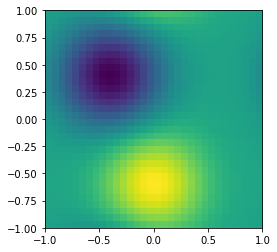

In [35]:
fig, ax = plt.subplots()

ii = -1
#im = ax.imshow(lnrho[0][16], vmin=1e-2, vmax=10, extent=[-L, L, -L, L])
im = ax.imshow(lnrho[0][31], extent=[-L, L, -L, L])

In [49]:
print(np.shape(lnrho))

(1, 32, 32, 32)


In [78]:
print(lnrho[0][:][16][16])

[3.50498533 3.50495887 3.50492787 3.50489378 3.50485826 3.50482488
 3.50479674 3.50477767 3.50477028 3.50477529 3.50479317 3.50482273
 3.50486159 3.5049057  3.50495076 3.50499368 3.50503087 3.50505948
 3.50507951 3.50508952 3.50509262 3.50509024 3.50508451 3.50507712
 3.50506902 3.50506186 3.50505519 3.50504923 3.50504184 3.50503254
 3.5050211  3.50500607]


-1


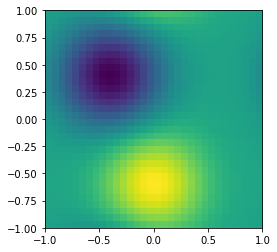

In [129]:
fig, ax = plt.subplots()

ii = -1
#im = ax.imshow(rhop[100], animated=True, vmin=1e-2, vmax=10, extent=[-L, L, -L, L])
im = ax.imshow(lnrho[0][:][16][:], extent=[-L, L, -L, L])
def updatefig(*args):
    global ii
    print(ii)
    ii += 1
    if ii >= Nvar: return im,
    im.set_array(lnrho[0][:][ii][:])
    return im,

ani = animation.FuncAnimation(fig, updatefig, interval=500, frames=31)

In [130]:
HTML(ani.to_html5_video())

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31


In [ ]:
# arrays3d_to_vtk.py
#
# Export 3d arrays into vtk format.
#
# Authors:
# A. Schreiber (aschreiber@mpia.de)
"""
Contains the exporting routine for 3d arrays into vtk.
"""


def arrays3d_to_vtk(folder, filename, arrays, names, gridx, gridy, gridz):
    """
    Convert 3-D array in a VTK file.
    call signature:
    arrays3d_to_vtk(folder, filename, arrays, names, gridx, gridy)
    Args:
        - folder:       where to put the vtk
        - fil_ename:    name of the vtk, '.vtk' will be added automatically
        - arrays:       list of 3d arrays to export
        - names:        list of names associated with arrays
        - gridx/y:      grid as array
    """

    import struct
    import os
    import sys
    import numpy as np

    print("## Producing vtk-file from arrays.")

    if not (isinstance(arrays, list) and isinstance(names, list)):
        print("ERROR: Arrays and names must be a list!")

    # Check if the output folder exists.
    if not os.path.exists(folder):
        os.makedirs(folder)

    dimx = len(gridx)
    dimy = len(gridy)
    dimz = len(gridz)
    dim = dimx * dimy * dimz
    dx = (np.max(gridx) - np.min(gridx)) / dimx
    dy = (np.max(gridy) - np.min(gridy)) / dimy
    dz = (np.max(gridz) - np.min(gridz)) / dimz

    # Rescale dimmension to get a square as output 'image'.
    #    dy = dx*dimx/dimy

    # Do the vtk output.
    fd = open(os.path.join(folder, filename + ".vtk"), "wb")
    fd.write("# vtk DataFile Version 2.0\n".encode("utf-8"))
    fd.write("PENCIL CODE data\n".encode("utf-8"))
    fd.write("BINARY\n".encode("utf-8"))
    fd.write("DATASET STRUCTURED_POINTS\n".encode("utf-8"))
    fd.write("DIMENSIONS {0:9} {1:9} {2:9}\n".format(dimx, dimy, dimz).encode("utf-8"))
    fd.write(
        "ORIGIN {0:8.12} {1:8.12} {2:8.12}\n".format(
            gridx[0], gridy[0], gridz[0]
        ).encode("utf-8")
    )
    fd.write("SPACING {0:8.12} {1:8.12} {2:8.12}\n".format(dx, dy, dz).encode("utf-8"))
    fd.write("POINT_DATA {0:9}\n".format(dim).encode("utf-8"))

    for name, array in zip(names, arrays):
        print("Writing {0}.".format(name))
        data = array
        if sys.byteorder == "little":
            data = data.astype(np.float32).byteswap()
        else:
            data = data.astype(np.float32)
        if data.ndim == 4:
            data = np.moveaxis(data, 0, 3)
            fd.write("VECTORS {0} float\n".format(name).encode("utf-8"))
        else:
            fd.write("SCALARS {0} float\n".format(name).encode("utf-8"))
            fd.write("LOOKUP_TABLE default\n".encode("utf-8"))
        fd.write(data.tobytes())

        # fd.write('SCALARS '+name+' float\n')
        # fd.write('LOOKUP_TABLE default\n')
        # for kk in range(dimz):
        #     for jj in range(dimy):
        #         for ll in range(dimx):
        #             fd.write(struct.pack(">f", array[kk, jj, ll]))

    #        fd.write(''.encode('utf-8'))

    fd.close()
    print("Done!")

In [122]:
# arrays3d_to_vtk.py
#
# Export 3d arrays into vtk format.
#
# Authors:
# A. Schreiber (aschreiber@mpia.de)
"""
Contains the exporting routine for 3d arrays into vtk.


text version by mkg
"""


def arrays3d_to_vtk_text(folder, filename, arrays, names, gridx, gridy, gridz):
    """
    Convert 3-D array in a VTK file.
    call signature:
    arrays3d_to_vtk(folder, filename, arrays, names, gridx, gridy)
    Args:
        - folder:       where to put the vtk
        - fil_ename:    name of the vtk, '.vtk' will be added automatically
        - arrays:       list of 3d arrays to export
        - names:        list of names associated with arrays
        - gridx/y:      grid as array
    """

    import struct
    import os
    import sys
    import numpy as np

    print("## Producing vtk-file from arrays.")

    if not (isinstance(arrays, list) and isinstance(names, list)):
        print("ERROR: Arrays and names must be a list!")

    # Check if the output folder exists.
    if not os.path.exists(folder):
        os.makedirs(folder)

        
    arrayshap=np.shape(arrays)
    print(arrayshap)
    nx=arrayshap[1]
    ny=arrayshap[2]
    nz=arrayshap[3]        
        
        
        
    dimx = len(gridx)
    dimy = len(gridy)
    dimz = len(gridz)
    #dim = dimx * dimy * dimz
    dim = nx * ny * nz
    #print(dimx,dimy,dimz)
    dx = (np.max(gridx) - np.min(gridx)) / nx
    dy = (np.max(gridy) - np.min(gridy)) / ny
    dz = (np.max(gridz) - np.min(gridz)) / nz
    


    # Rescale dimmension to get a square as output 'image'.
    #    dy = dx*dimx/dimy

    # Do the vtk output.
    #fd = open(os.path.join(folder, filename + ".vtk"), "wb")
    fd = open(os.path.join(folder, filename + ".vtk"), "w")
    fd.write(str("# vtk DataFile Version 2.0\n"))
    fd.write(str("PENCIL CODE data\n"))
    fd.write(str("ASCII\n"))
    fd.write(str("DATASET STRUCTURED_POINTS\n"))
    fd.write(str("DIMENSIONS {0:9} {1:9} {2:9}\n".format(nx, ny, nz)))
    fd.write(
        str("ORIGIN {0:8.12} {1:8.12} {2:8.12}\n".format(
            gridx[0], gridy[0], gridz[0]
        ))
    )
    fd.write(str("SPACING {0:8.12} {1:8.12} {2:8.12}\n".format(dx, dy, dz)))
    fd.write(str("POINT_DATA {0:9}\n".format(dim)))

    for name, array in zip(names, arrays):
        print("Writing {0}.".format(name))
        data = array
        if sys.byteorder == "little":
            data = data.astype(np.float32).byteswap()
        else:
            data = data.astype(np.float32)
        if data.ndim == 4:
            data = np.moveaxis(data, 0, 3)
            fd.write(str("VECTORS {0} float\n".format(name)))
        else:
            fd.write(str("SCALARS {0} float\n".format(name)))
            fd.write(str("LOOKUP_TABLE default\n"))
        #fd.write(data.tobytes())
        #fd.write(str(data))

        # fd.write('SCALARS '+name+' float\n')
        # fd.write('LOOKUP_TABLE default\n')
        #fd.write(str("["))
        for kk in range(nz):
            #fd.write(str("["))
            for jj in range(ny):
                #fd.write(str("["))
                for ii in range(nx):
                    fd.write(str( arrays[0][kk][jj][ii]))
                    fd.write(str(" "))
                fd.write(str("\n"))
            fd.write(str("\n"))
        fd.write(str("\n"))
                #fd.write(str("]\n"))
            #fd.write(str("]\n"))
        #fd.write(str("]\n"))

    #        fd.write(''.encode('utf-8'))

    fd.close()
    print("Done!")

In [123]:
#get the grid
grid = pc.read.grid("./data/")
print(grid.x)
print(grid.y)
print(grid.z)

reading grid data from processor 0 of 1 ...
[-0.578125 -0.546875 -0.515625 -0.484375 -0.453125 -0.421875 -0.390625
 -0.359375 -0.328125 -0.296875 -0.265625 -0.234375 -0.203125 -0.171875
 -0.140625 -0.109375 -0.078125 -0.046875 -0.015625  0.015625  0.046875
  0.078125  0.109375  0.140625  0.171875  0.203125  0.234375  0.265625
  0.296875  0.328125  0.359375  0.390625  0.421875  0.453125  0.484375
  0.515625  0.546875  0.578125]
[-0.578125 -0.546875 -0.515625 -0.484375 -0.453125 -0.421875 -0.390625
 -0.359375 -0.328125 -0.296875 -0.265625 -0.234375 -0.203125 -0.171875
 -0.140625 -0.109375 -0.078125 -0.046875 -0.015625  0.015625  0.046875
  0.078125  0.109375  0.140625  0.171875  0.203125  0.234375  0.265625
  0.296875  0.328125  0.359375  0.390625  0.421875  0.453125  0.484375
  0.515625  0.546875  0.578125]
[-0.8735484  -0.80903226 -0.74451613 -0.68       -0.6154839  -0.55096775
 -0.48645163 -0.4219355  -0.35741937 -0.29290324 -0.22838712 -0.16387093
 -0.09935486 -0.03483868  0.02967739

In [124]:

#arrays3d_to_vtk(folder, filename, arrays, names, gridx, gridy, gridz)
arrays3d_to_vtk_text('vtktest', 'vtkaout', lnrho, varlist, grid.x, grid.y, grid.z)

## Producing vtk-file from arrays.
ERROR: Arrays and names must be a list!
(1, 32, 32, 32)
Writing VAR0.
Done!
